# **🏠 House Prices Pridiction** - Advanced Regression Techniques

# **Steps To Follow for Model building**

1. **EDA (Univariate, Multivariate, KDE, Pearson Correlation)**
2. **Data Preprocessing (Imputation, create at least 2 new features)**
3. **Cross-validation**
4. **An inference pipeline consisting of Data Preprocessing and prediction**

**Note:** It is mandatory to plot each graph and write an observation about it.

# **Basic Steps**

## Importing Required Libraries

In [1]:
!pip install pandas

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.lines as mlines
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv

import warnings
warnings.filterwarnings('ignore')

from sklearn.kernel_ridge import KernelRidge
from sklearn.base import RegressorMixin

from sklearn.metrics import make_scorer, r2_score
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



In [3]:
!pip install sklearn-pandas==1.5.0

In [4]:
import sklearn_pandas

In [5]:
import sys
import scipy

print('Environment specification:\n')
print('python', '%s.%s.%s' % sys.version_info[:3])

for mod in np, scipy, sns, sklearn, pd:
    print(mod.__name__, mod.__version__)

Environment specification:

python 3.10.2
numpy 1.22.2
scipy 1.8.0
seaborn 0.11.2
sklearn 1.0.2
pandas 1.4.1


## Loading Dataset

In [6]:
train_path = r'train.csv'
test_path = r'test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [7]:
print("Shape of Train Dataset : ", train_df.shape)
print("Shape of Test Dataset : ", test_df.shape)

Shape of Train Dataset :  (1460, 81)
Shape of Test Dataset :  (1459, 80)


In [8]:
train_df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1123  1124          20       RL         50.0     9405   Pave   NaN      Reg   
1107  1108          60       RL        168.0    23257   Pave   NaN      IR3   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
298    299          60       RL         90.0    11700   Pave   NaN      Reg   
915    916         160       RM         21.0     2001   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1123         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1107         HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1458         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
298          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
915          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1123      6   2009        WD         Normal     118000  
1107      9   2006       New        Partial     274725  
1458      4   2010        WD         Normal     142125  
298       6   2007        WD         Normal     175000  
915       1   2007        WD         Normal      75000  

[5 rows x 81 columns]

In [9]:
test_df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1186  2647         160       RM         21.0     1680   Pave   NaN      Reg   
1069  2530          20       RL         60.0     7200   Pave   NaN      Reg   
499   1960          20       RL         68.0    10295   Pave   NaN      Reg   
1062  2523          20       RL         97.0    11800   Pave   NaN      IR1   
1227  2688          20       RL         85.0    10936   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
1186         Lvl    AllPub  ...           0        0    NaN  GdPrv   
1069         Lvl    AllPub  ...           0        0    NaN    NaN   
499          Lvl    AllPub  ...           0        0    NaN    NaN   
1062         Bnk    AllPub  ...           0        0    NaN    NaN   
1227         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1186         NaN       0     10    2006        WD         Normal  
1069         NaN       0     10    2007        WD         Normal  
499          NaN       0      9    2008       COD         Normal  
1062         NaN       0      8    2007        WD         Family  
1227         NaN       0      9    2006       New        Partial  

[5 rows x 80 columns]

In [10]:
train_id = train_df['Id']
test_id = test_df['Id']

train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)

### **Column information** of both Datasets

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

### **Counts of Data Type** of All category wise of Both Datasets

In [13]:
count_dtype = {
    'Train Columns' : train_df.dtypes.value_counts(),
    'Test Columns' : test_df.dtypes.value_counts()
}
pd.DataFrame(count_dtype)

Train Columns  Test Columns
object              43            43
int64               34            25
float64              3            11

#### **Observations** ✍ :
##### **Train Dataset** -
  1. We have **1460 rows** and **81 Columns**.
  2. **80 columns** are **Independent variables** and **One Dependent Variable**.
  3. In **Train** data :    
      1. **Object** Columns = **43**
      2. **Integer** Columns = **34**
      3. **Float** Columns = **3**

##### **Test Dataset** -
  1. We have **1459 rows** and **80 columns**.
  2. This is my **Test data** so **all columns** are **Independent variables**.
  3. In **Test** data :    
      1. **Object** Columns = **43**
      2. **Integer** Columns = **25**
      3. **Float** Columns = **11**

In [14]:
train_df.describe(include=[np.number], percentiles=[.5]).transpose()

count           mean           std      min       50%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      50.0   
LotFrontage    1201.0      70.049958     24.284752     21.0      69.0   
LotArea        1460.0   10516.828082   9981.264932   1300.0    9478.5   
OverallQual    1460.0       6.099315      1.382997      1.0       6.0   
OverallCond    1460.0       5.575342      1.112799      1.0       5.0   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1973.0   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1994.0   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.0   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0     383.5   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.0   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     477.5   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     991.5   
1stFlrSF       1460.0    1162.626712    386.587738    334.0    1087.0   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.0   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.0   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1464.0   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.0   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.0   
FullBath       1460.0       1.565068      0.550916      0.0       2.0   
HalfBath       1460.0       0.382877      0.502885      0.0       0.0   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       3.0   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.0   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       6.0   
Fireplaces     1460.0       0.613014      0.644666      0.0       1.0   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1980.0   
GarageCars     1460.0       1.767123      0.747315      0.0       2.0   
GarageArea     1460.0     472.980137    213.804841      0.0     480.0   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.0   
OpenPorchSF    1460.0      46.660274     66.256028      0.0      25.0   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.0   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.0   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.0   
PoolArea       1460.0       2.758904     40.177307      0.0       0.0   
MiscVal        1460.0      43.489041    496.123024      0.0       0.0   
MoSold         1460.0       6.321918      2.703626      1.0       6.0   
YrSold         1460.0    2007.815753      1.328095   2006.0    2008.0   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  163000.0   

                    max  
MSSubClass        190.0  
LotFrontage       313.0  
LotArea        215245.0  
OverallQual        10.0  
OverallCond         9.0  
YearBuilt        2010.0  
YearRemodAdd     2010.0  
MasVnrArea       1600.0  
BsmtFinSF1       5644.0  
BsmtFinSF2       1474.0  
BsmtUnfSF        2336.0  
TotalBsmtSF      6110.0  
1stFlrSF         4692.0  
2ndFlrSF         2065.0  
LowQualFinSF      572.0  
GrLivArea        5642.0  
BsmtFullBath        3.0  
BsmtHalfBath        2.0  
FullBath            3.0  
HalfBath            2.0  
BedroomAbvGr        8.0  
KitchenAbvGr        3.0  
TotRmsAbvGrd       14.0  
Fireplaces          3.0  
GarageYrBlt      2010.0  
GarageCars          4.0  
GarageArea       1418.0  
WoodDeckSF        857.0  
OpenPorchSF       547.0  
EnclosedPorch     552.0  
3SsnPorch         508.0  
ScreenPorch       480.0  
PoolArea          738.0  
MiscVal         15500.0  
MoSold             12.0  
YrSold           2010.0  
SalePrice      755000.0

# 1. **EDA** (Exploratory Data Analysis, Univariate, Multivariate, KDE, Pearson Correlation)

## **Missing Values**
**I will check the percentage of Nan Vales present in each feature**

In [15]:
# Getting the number of missing values in each column
num_missing = train_df.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / train_df.shape[0]
# Concatenating the number and perecentage of missing values
# into one dataframe and sorting it
feature_with_na = pd.concat([num_missing, percent_missing], axis=1,
keys=['Missing Values', 'Percentage']).\
sort_values(by="Missing Values", ascending=False)

feature_with_na

Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
MasVnrType                 8    0.547945
Electrical                 1    0.068493

### There are **many Missing Values**, so **I have to find the Relationship** between **Missing Values** and **SalePrice**

***Lets plot some Graph for this***

In [16]:
feature_with_na.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

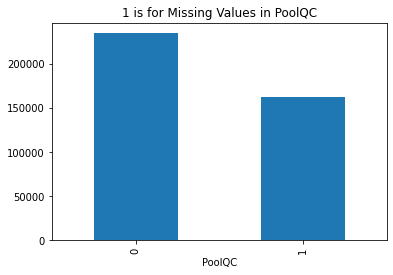

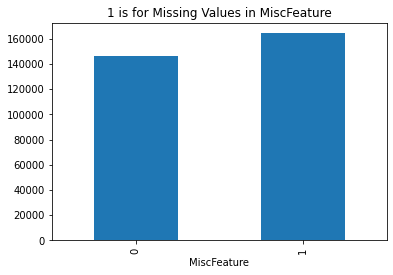

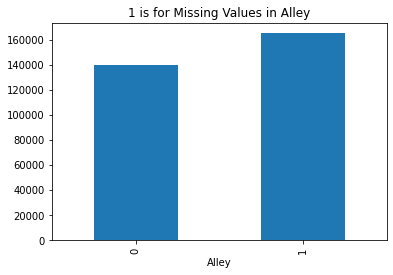

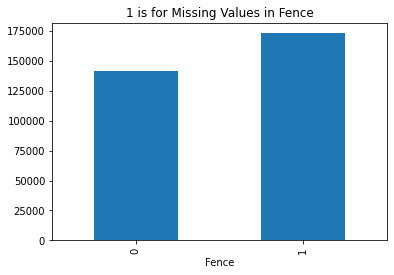

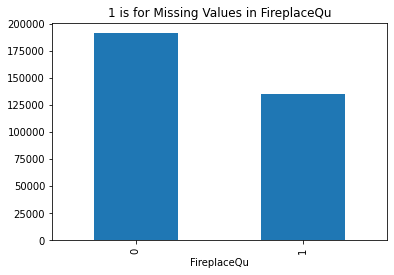

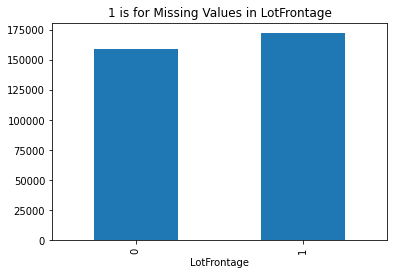

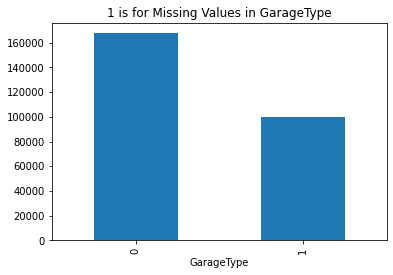

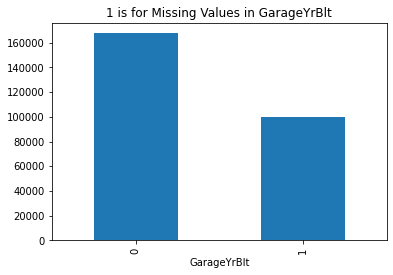

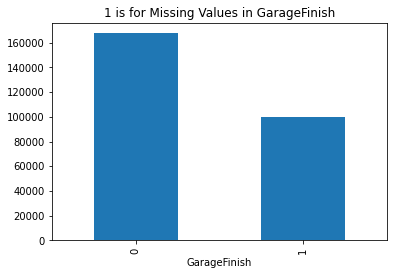

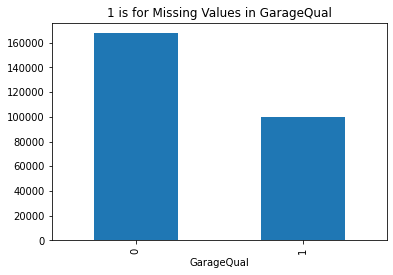

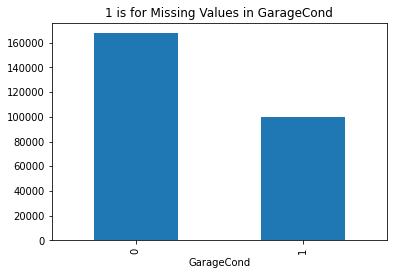

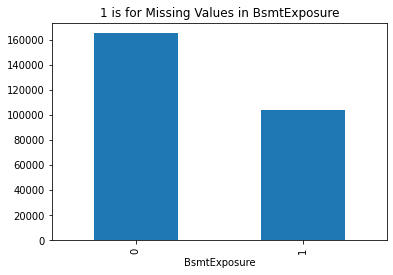

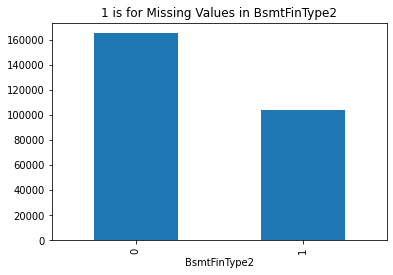

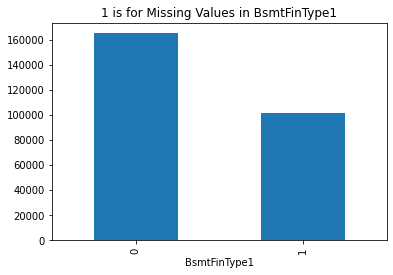

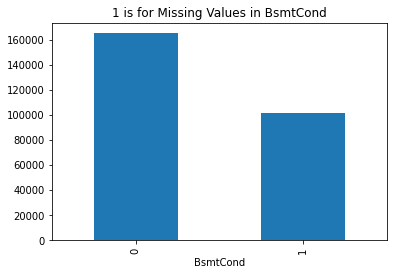

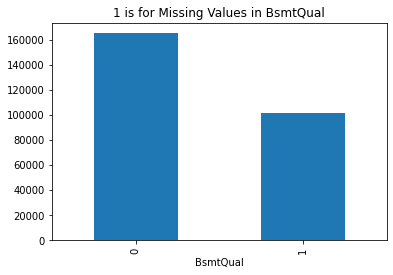

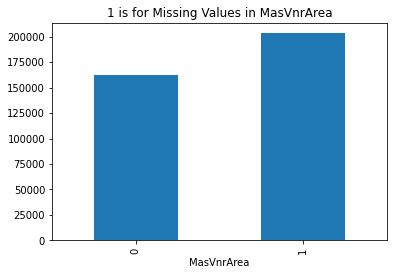

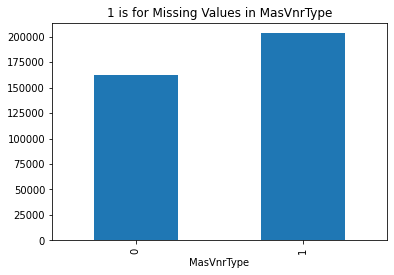

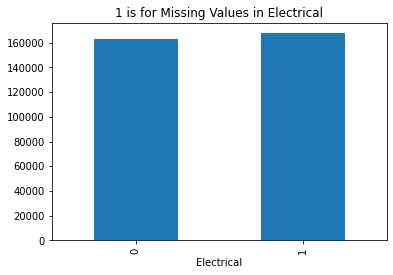

In [17]:
for feature in feature_with_na.index:
  data = train_df.copy()
  
  data[feature] = np.where(data[feature].isnull(), 1, 0)

  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(f'1 is for Missing Values in {feature}')
  plt.show()

#### Observations :    
- Here with the **relation** between the **missing values** and the **dependent variable is clearly visible**.
- So we **need to replace these Nan values with something meaningful** which we will do in the Data Preprocessing

### **Numerical Variables**

In [18]:
## List of Numerical Variables
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']

print('Number of Numerical Variables : ', len(numerical_features))
train_df[numerical_features].head()

Number of Numerical Variables :  37


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

### Lets see those **variables** which **contains Time Informations**

In [19]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### Observations :     
- Now we have **Four features** that contains **Year information**.

### Lets see the **content** in **Year Variables**

In [20]:
for feature in year_feature:
  print(feature,'\n\n', train_df[feature].unique(),'\n')

YearBuilt 

 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd 

 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt 

 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.

### Lets check **whether** the **relation** between **year the house is sold and the SalePrice**

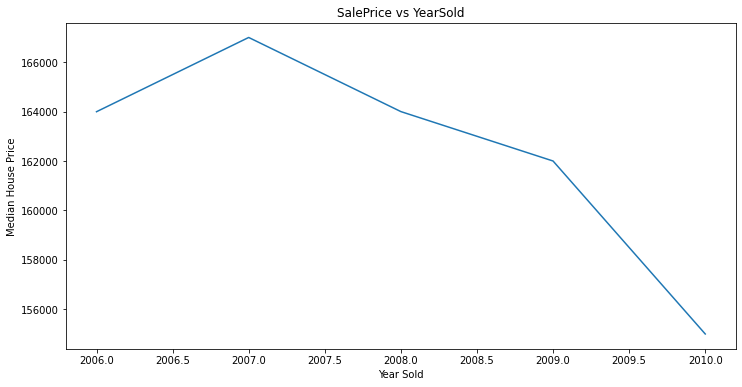

In [21]:
plt.figure(figsize=(12,6))
train_df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('SalePrice vs YearSold');

### Now I am **comparing** the **Difference between all years feature with SalePrice**

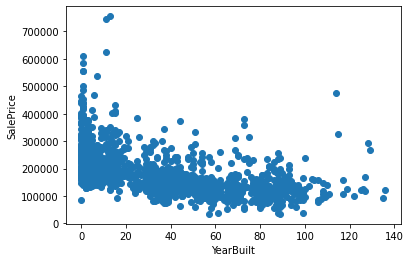

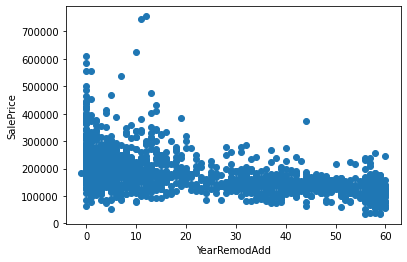

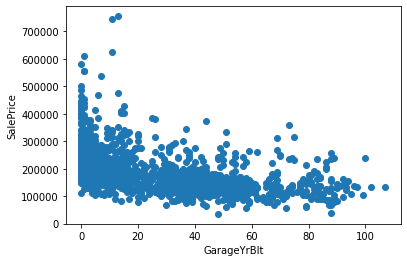

In [22]:
for feature in year_feature:
  if feature != 'YrSold':
    data = train_df.copy()
    # Comparing the year variable and the year house was sold
    data[feature] = data['YrSold'] - data[feature]

    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

#### Observations :  
- We can see if the **time is incresing** the **SalePrice decresing** regarding with **all the Year containing variables**

### Lets Discuss analyse Numerical Variables
**Numerical variables usual 2 types**
  - **Continuous Variables**
  - **Discrete Variables**

In [23]:
discrete_feature = [feature for feature in numerical_features if len(train_df[feature].unique())<25]
print(f'Discrete Variables Count : {len(discrete_feature)} \n')
discrete_feature = discrete_feature[:-1]
discrete_feature

Discrete Variables Count : 18 



['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [24]:
train_df[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

### Lets **find** the **relationship** between **Discrete** variables and **SalePrice**

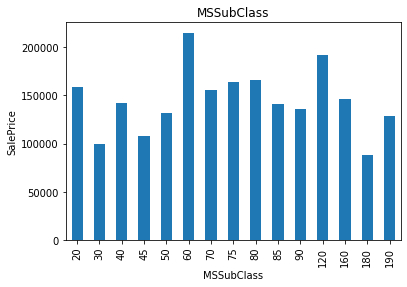

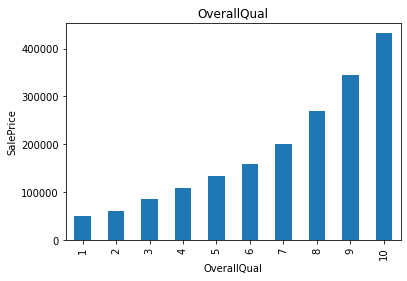

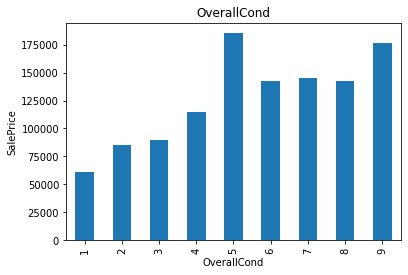

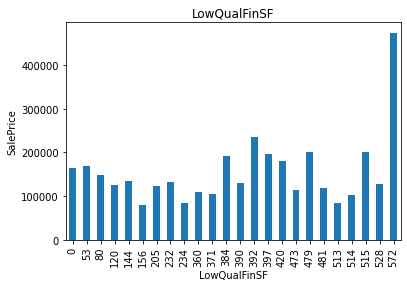

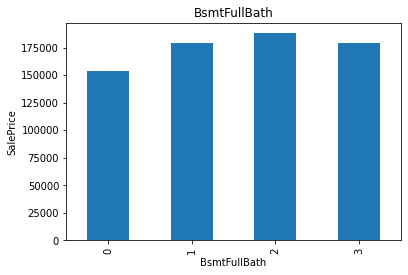

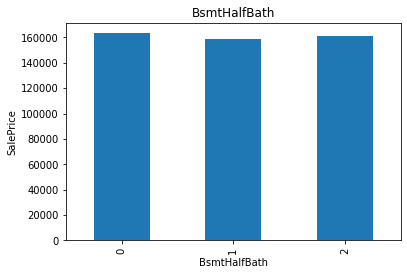

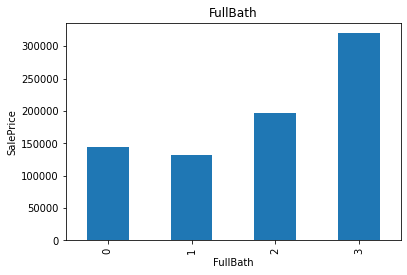

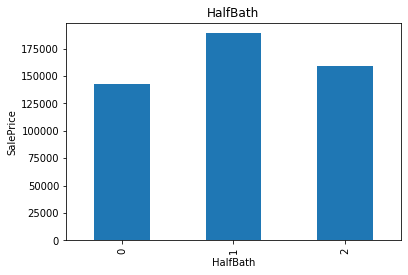

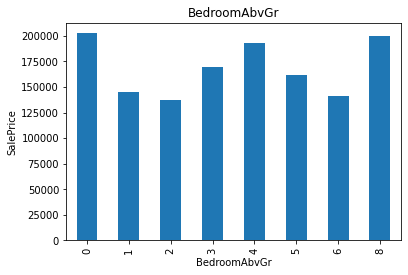

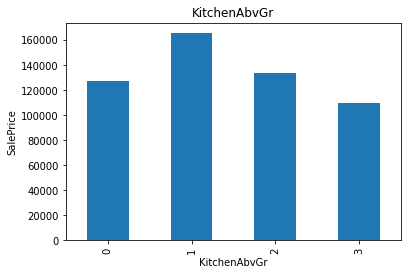

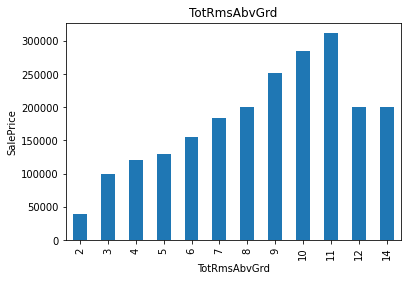

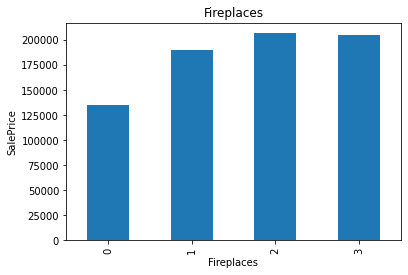

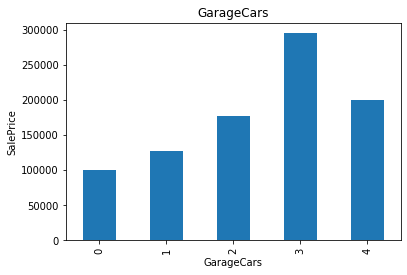

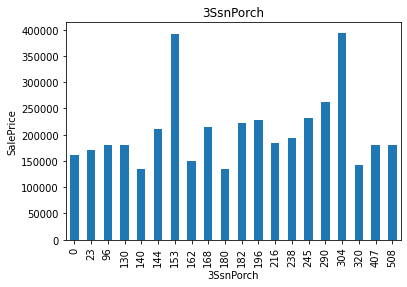

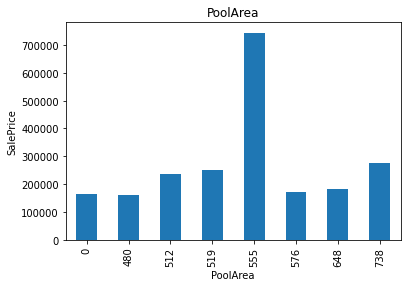

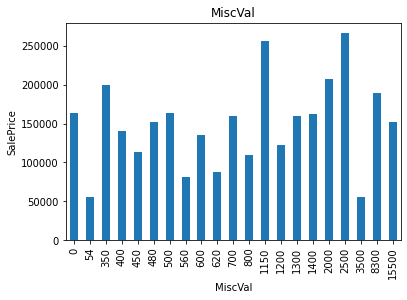

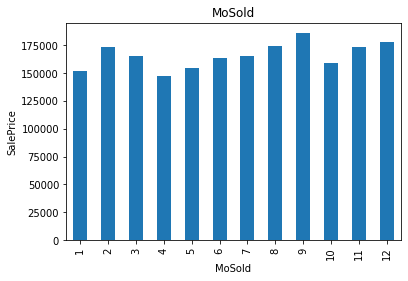

In [25]:
for feature in discrete_feature:
  data = train_df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

#### Observations :     
- There is a **relationship** between **Numbers** and **SalePrice**.

### **Continuous Variables**

In [26]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print(f'Count of Continuous features {len(continuous_feature)}')

Count of Continuous features 16


### Now Analyse them using Histogram 

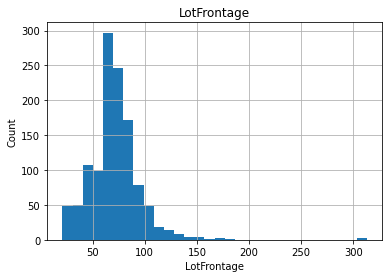

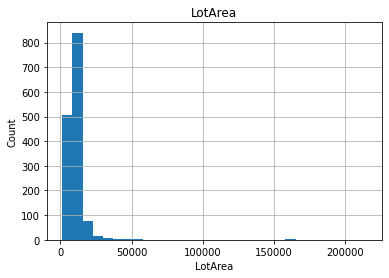

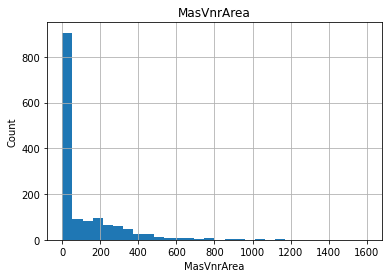

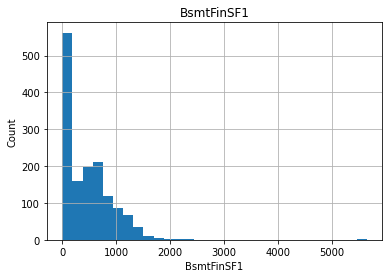

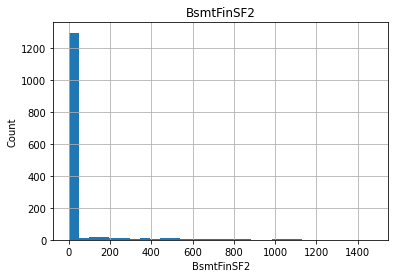

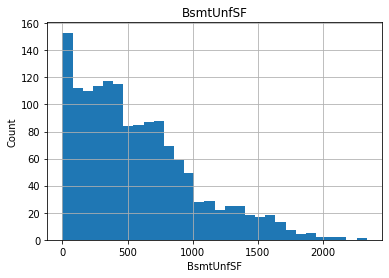

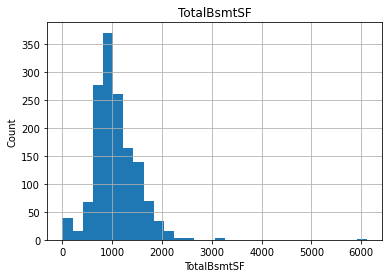

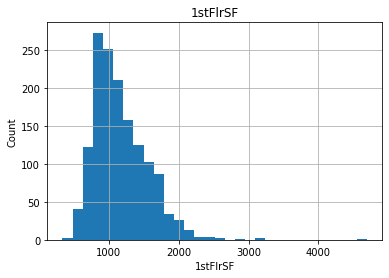

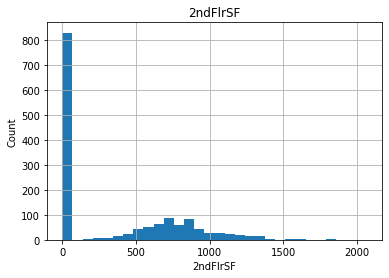

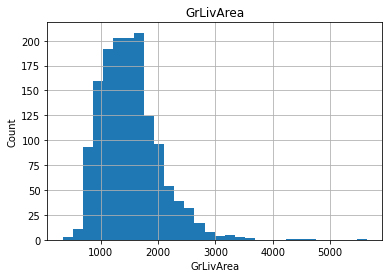

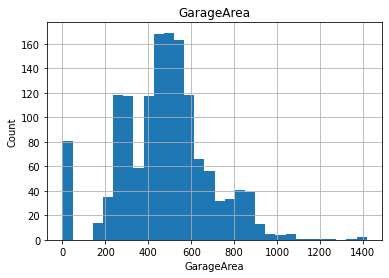

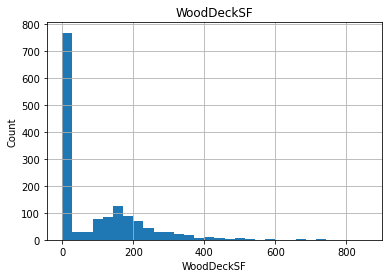

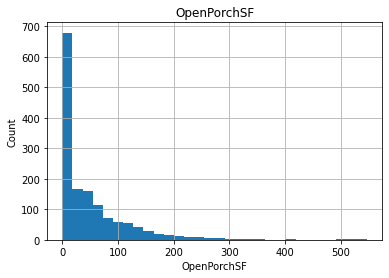

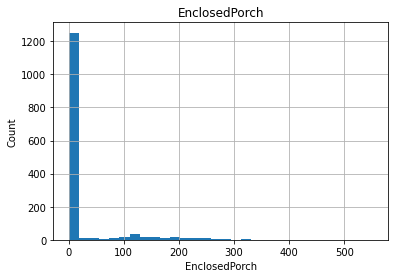

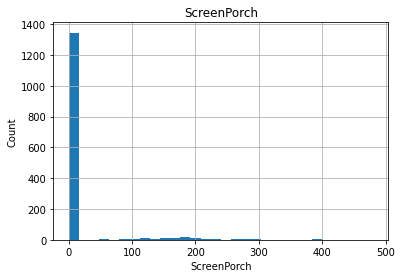

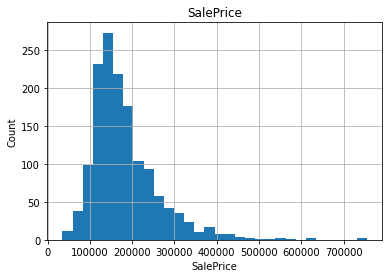

In [27]:
for feature in continuous_feature:
  data = train_df.copy()
  data[feature].hist(bins=30)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

#### Observations :      
- All continuous features are skewed.

### I am going to Use **Logrithmic Transformation**

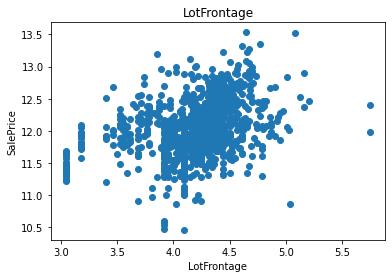

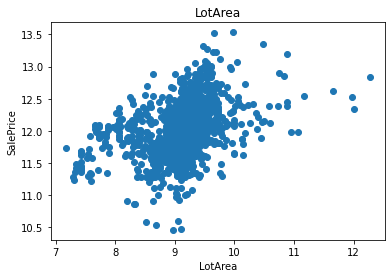

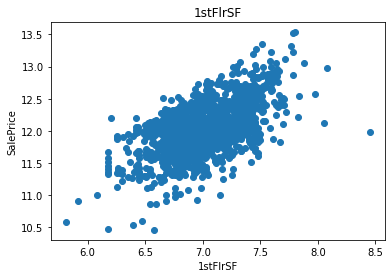

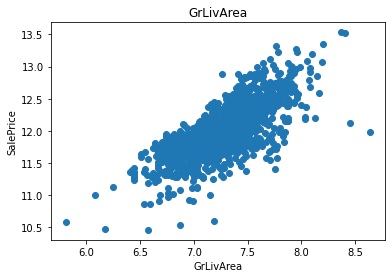

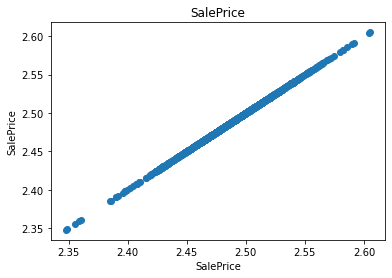

In [28]:
for feature in continuous_feature:
  data = train_df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### After applying Logrithmic Transformations

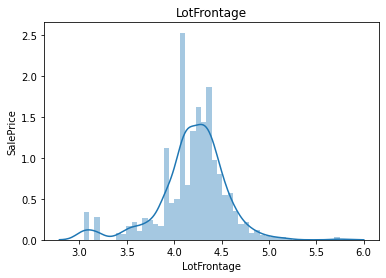

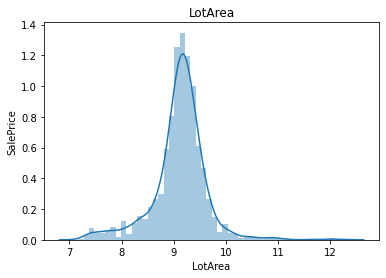

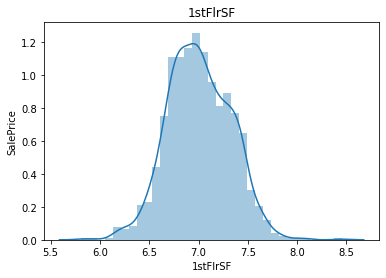

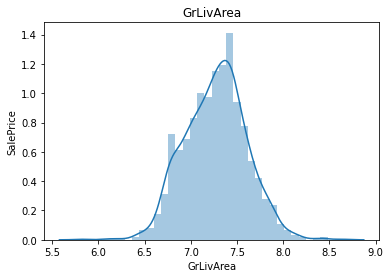

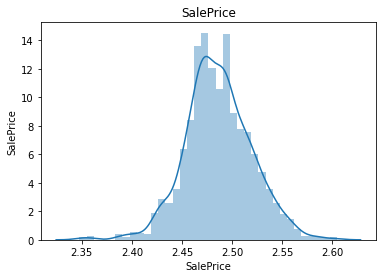

In [29]:
for feature in continuous_feature:
  data = train_df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Observations :      
  - After applying Log Transformation my data is look like normal distribution.

### **Outliers**

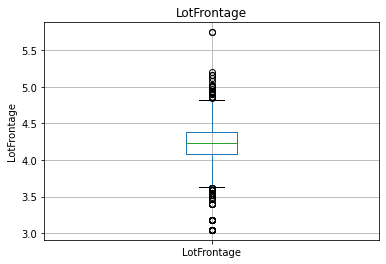

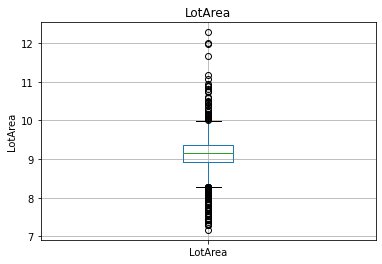

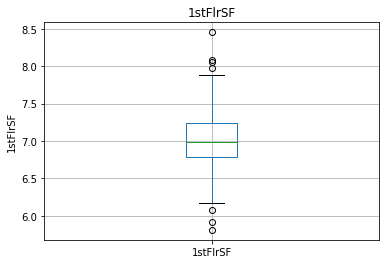

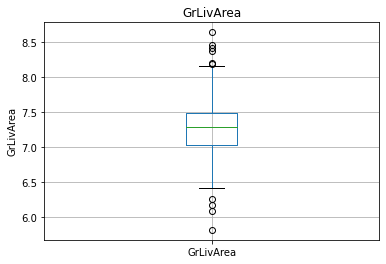

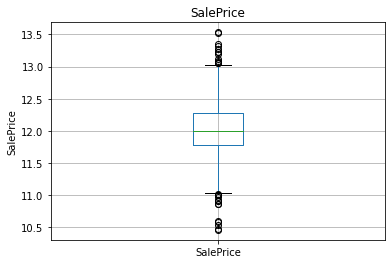

In [30]:
for feature in continuous_feature:
  data = train_df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Observations :        
- There are many outliers present.
- I will remove in Preprocessing.

### **Catagorical Variables**

In [31]:
categorical_features = [feature for feature in train_df.columns if data[feature].dtypes =='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [32]:
train_df[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [33]:
unique = []
Total_unique = []
for feature in categorical_features:
  uni_value = train_df[feature].unique()
  uni = len(train_df[feature].unique())
  unique.append(uni_value)
  Total_unique.append(uni)


unique_df = pd.DataFrame({
    'Features_name': categorical_features,
    'Unique_values': unique,
    'Total_Unique_values': Total_unique
}).set_index('Features_name')

unique_df

Unique_values  \
Features_name                                                      
MSZoning                               [RL, RM, C (all), FV, RH]   
Street                                              [Pave, Grvl]   
Alley                                          [nan, Grvl, Pave]   
LotShape                                    [Reg, IR1, IR2, IR3]   
LandContour                                 [Lvl, Bnk, Low, HLS]   
Utilities                                       [AllPub, NoSeWa]   
LotConfig                    [Inside, FR2, Corner, CulDSac, FR3]   
LandSlope                                        [Gtl, Mod, Sev]   
Neighborhood   [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...   
Condition1     [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...   
Condition2     [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...   
BldgType                   [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]   
HouseStyle     [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...   
RoofStyle             [Gable, Hip, Gambrel, Mansard, Flat, Shed]   
RoofMatl       [CompShg, WdShngl, Metal, WdShake, Membran, Ta...   
Exterior1st    [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...   
Exterior2nd    [VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...   
MasVnrType                   [BrkFace, None, Stone, BrkCmn, nan]   
ExterQual                                       [Gd, TA, Ex, Fa]   
ExterCond                                   [TA, Gd, Fa, Po, Ex]   
Foundation            [PConc, CBlock, BrkTil, Wood, Slab, Stone]   
BsmtQual                                   [Gd, TA, Ex, nan, Fa]   
BsmtCond                                   [TA, Gd, nan, Fa, Po]   
BsmtExposure                               [No, Gd, Mn, Av, nan]   
BsmtFinType1                 [GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]   
BsmtFinType2                 [Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]   
Heating                    [GasA, GasW, Grav, Wall, OthW, Floor]   
HeatingQC                                   [Ex, Gd, TA, Fa, Po]   
CentralAir                                                [Y, N]   
Electrical                [SBrkr, FuseF, FuseA, FuseP, Mix, nan]   
KitchenQual                                     [Gd, TA, Ex, Fa]   
Functional               [Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]   
FireplaceQu                            [nan, TA, Gd, Fa, Ex, Po]   
GarageType     [Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...   
GarageFinish                                [RFn, Unf, Fin, nan]   
GarageQual                             [TA, Fa, Gd, nan, Ex, Po]   
GarageCond                             [TA, Fa, nan, Gd, Po, Ex]   
PavedDrive                                             [Y, N, P]   
PoolQC                                         [nan, Ex, Fa, Gd]   
Fence                            [nan, MnPrv, GdWo, GdPrv, MnWw]   
MiscFeature                        [nan, Shed, Gar2, Othr, TenC]   
SaleType       [WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...   
SaleCondition  [Normal, Abnorml, Partial, AdjLand, Alloca, Fa...   

               Total_Unique_values  
Features_name                       
MSZoning                         5  
Street                           2  
Alley                            3  
LotShape                         4  
LandContour                      4  
Utilities                        2  
LotConfig                        5  
LandSlope                        3  
Neighborhood                    25  
Condition1                       9  
Condition2                       8  
BldgType                         5  
HouseStyle                       8  
RoofStyle                        6  
RoofMatl                         8  
Exterior1st                     15  
Exterior2nd                     16  
MasVnrType                       5  
ExterQual                        4  
ExterCond                        5  
Foundation                       6  
BsmtQual                         5  
BsmtCond                         5  
BsmtExposure                     5  
BsmtFinType1                

### Finding the **relationship** between **Categorical** variable and **Dependend** variable **SalePrice**

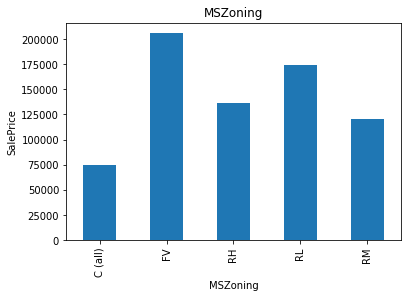

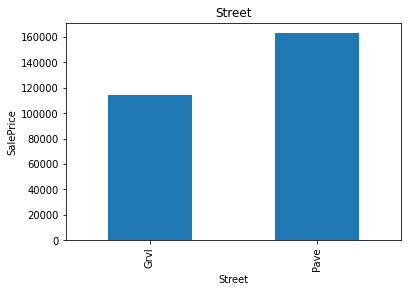

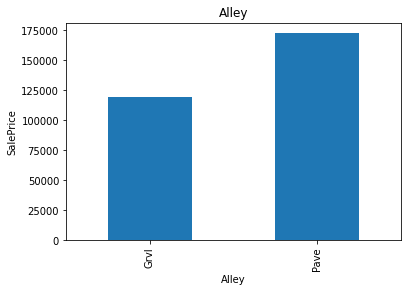

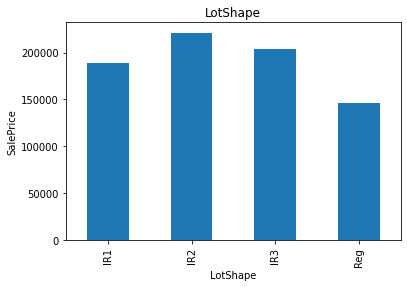

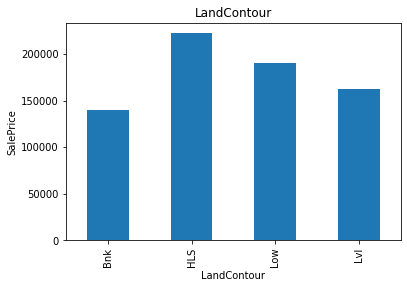

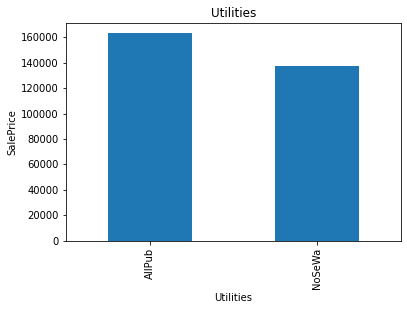

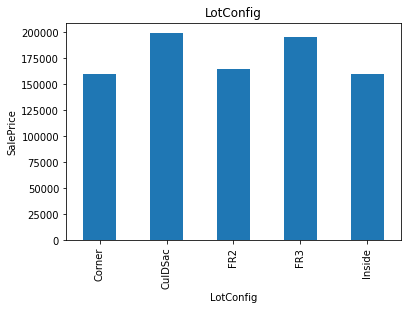

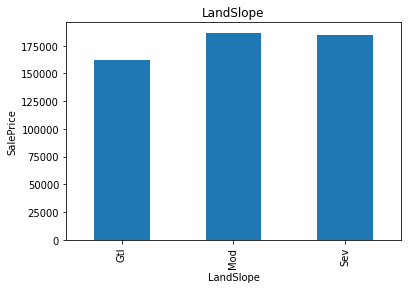

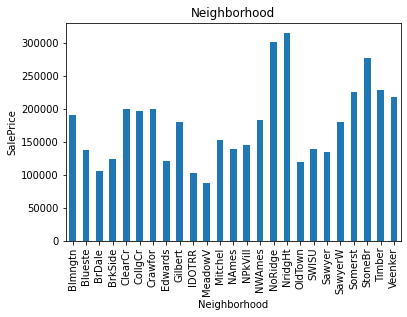

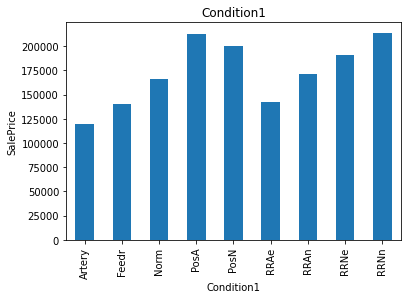

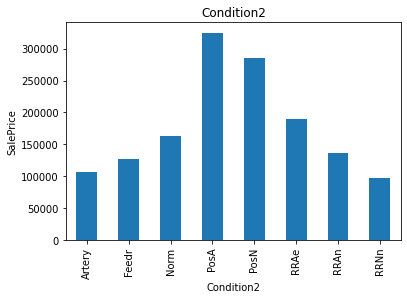

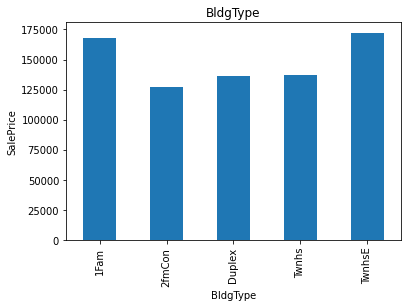

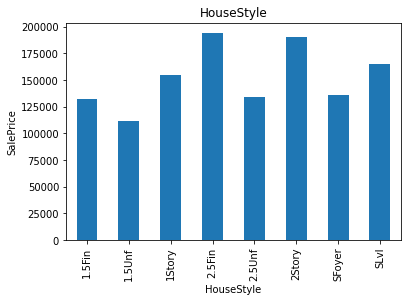

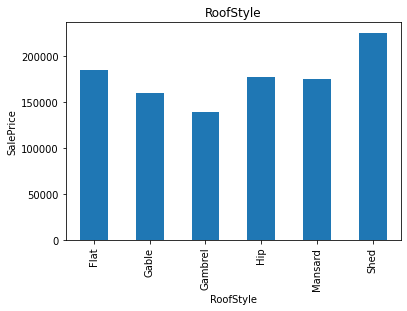

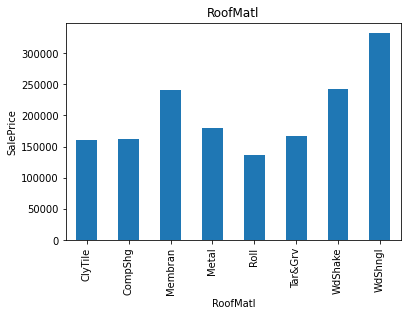

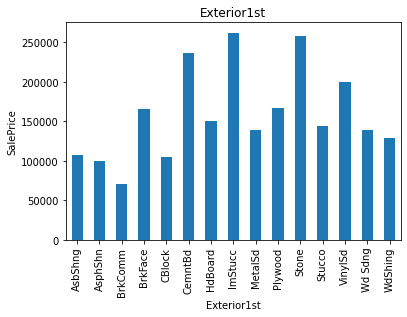

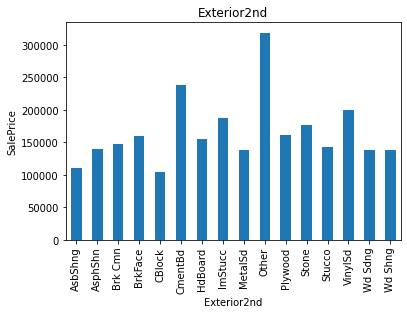

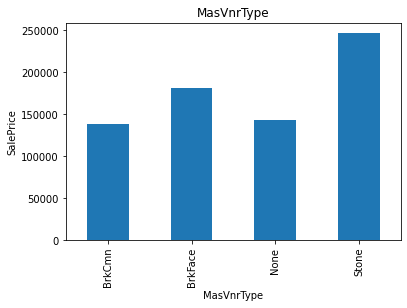

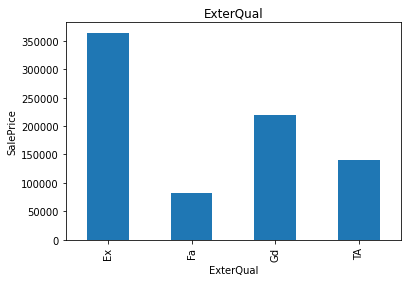

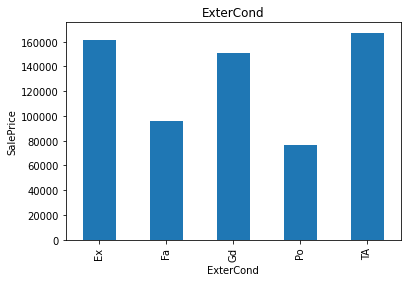

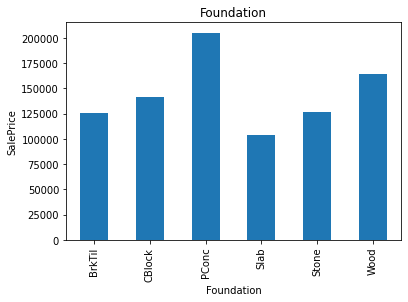

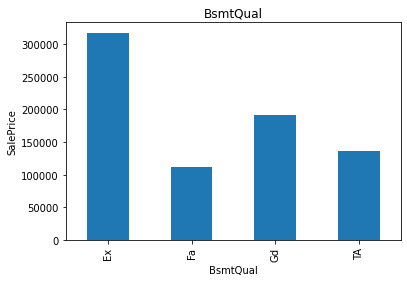

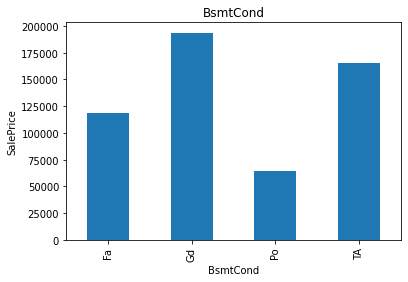

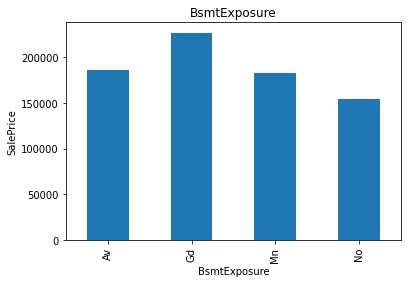

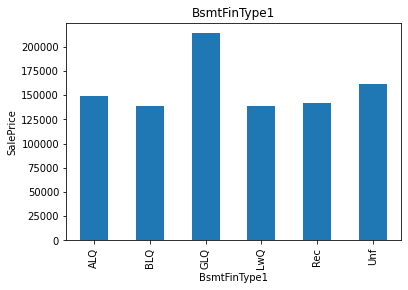

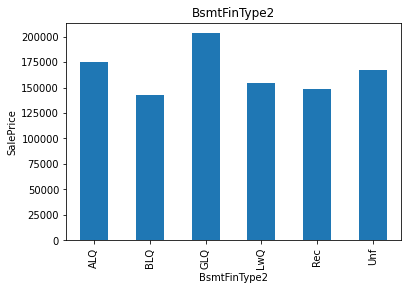

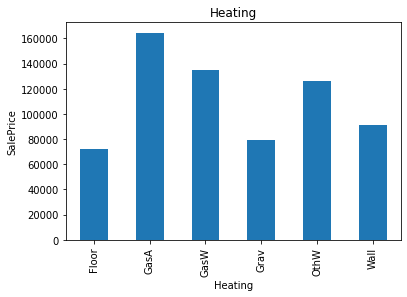

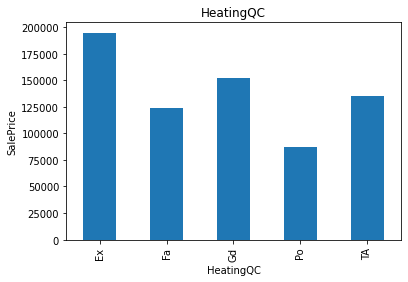

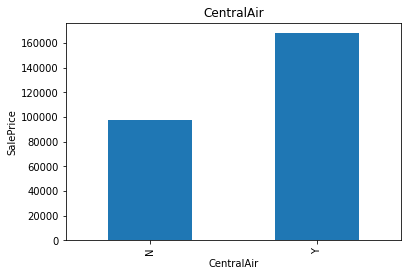

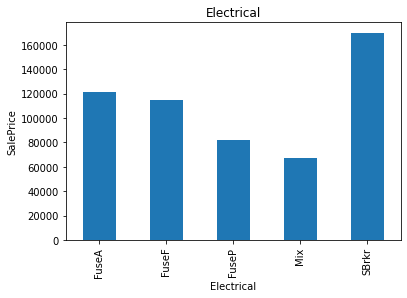

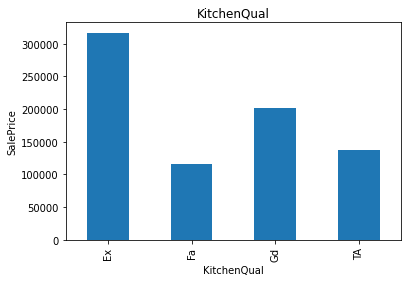

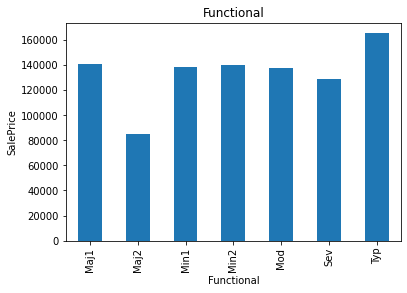

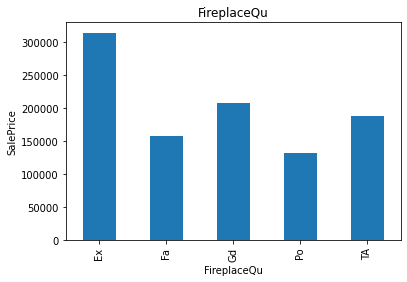

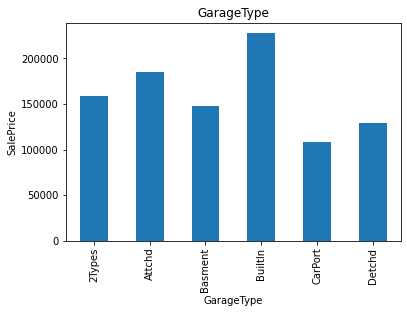

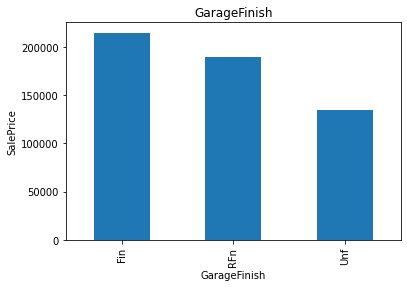

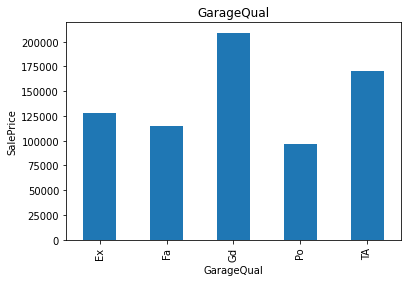

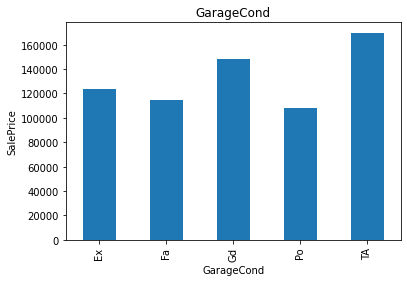

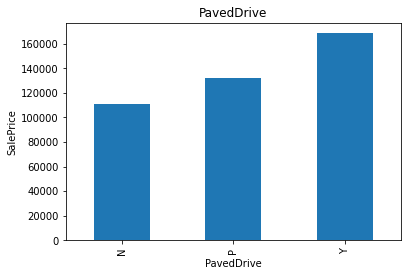

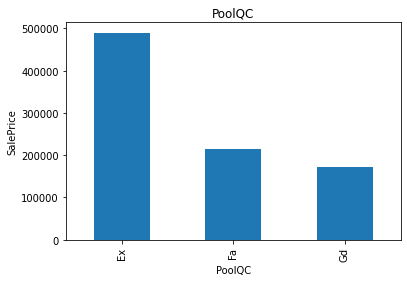

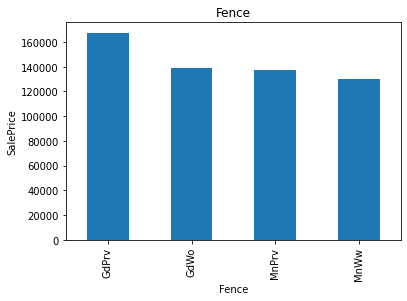

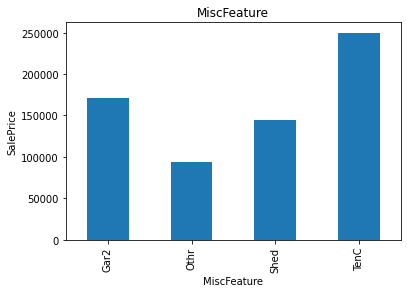

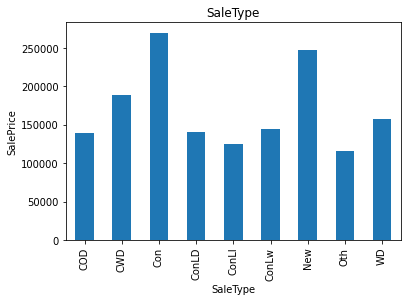

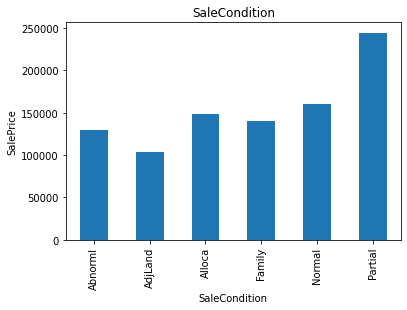

In [34]:
for feature in categorical_features:
  data = train_df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

## **Univariate Analysis**

In [35]:
def countplot(x):
  plt.figure(figsize=(9,6))
  ax = sns.countplot(x)
  for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  plt.show()

In [36]:
def countplotlable(x):
  plt.figure(figsize=(9,6))
  ax = sns.countplot(x)
  for p in ax.patches:
          ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  plt.xticks(rotation=90);

### **Countplot** of **MSZoning**

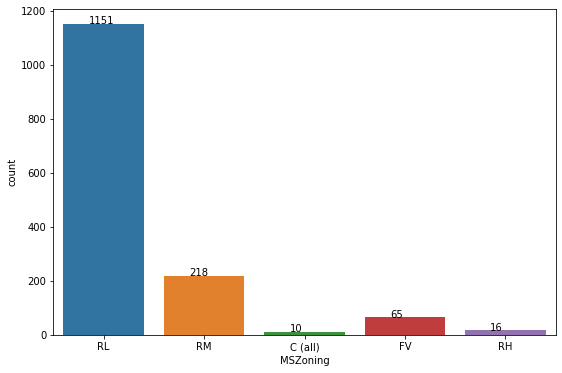

In [37]:
countplot(train_df['MSZoning'])

#### Observations : 

**MSZoning: Identifies the general zoning classification of the sale**
  
  - **C  ::** Commercial - 10
  - **FV ::** Floating Village Residential - 65
  - **RH ::** Residential High Density - 16
  - **RL ::** Residential Low Density - 1151
  - **RM ::** Residential Medium Density - 218

### **Countplot** of **Street**

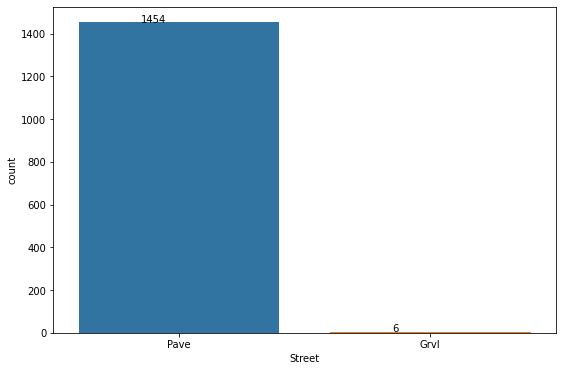

In [38]:
countplot(train_df['Street'])

#### Observations :        

**Street: Type of road access to property**

  - Grvl	Gravel  : 1454	
  - Pave	Paved   : 6

### **Countplot** of **Alley**

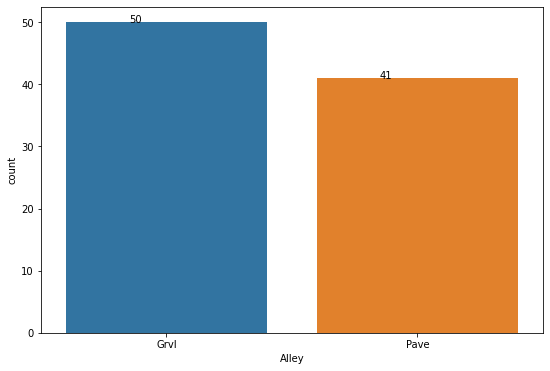

In [39]:
countplot(train_df['Alley'])

#### Observations :    

**Alley: Type of alley access to property**

  - **Grvl ::** Gravel - 50
  - **Pave ::**	Paved - 41

### **Countplot** of **LotShape**

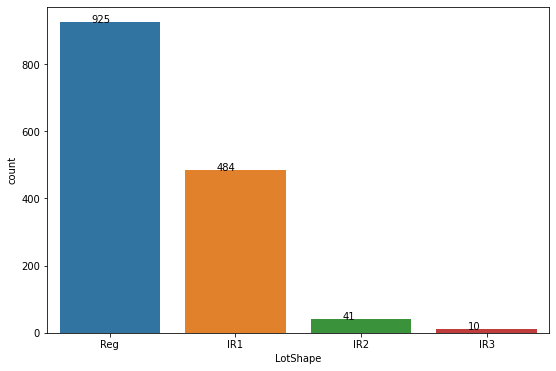

In [40]:
countplot(train_df['LotShape'])

#### Observations :    
**LotShape: General shape of property**

  - **Reg ::**	Regular	- 925
  - **IR1	::** Slightly irregular - 484
  - **IR2	::** Moderately Irregular - 41
  - **IR3	::** Irregular - 10

### **Countplot** of **LandContour**

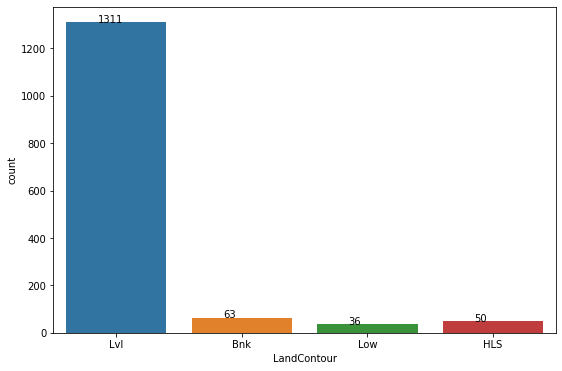

In [41]:
countplot(train_df['LandContour'])

#### Observations :    

**LandContour: Flatness of the property**

  - **Lvl ::**	Near Flat/Level	- 1311
  - **Bnk	::** Banked - Quick and significant rise from street grade to building - 63
  - **HLS	::** Hillside - Significant slope from side to side - 36
  - **Low	::** Depression - 50

### **Countplot** of **Utilities**

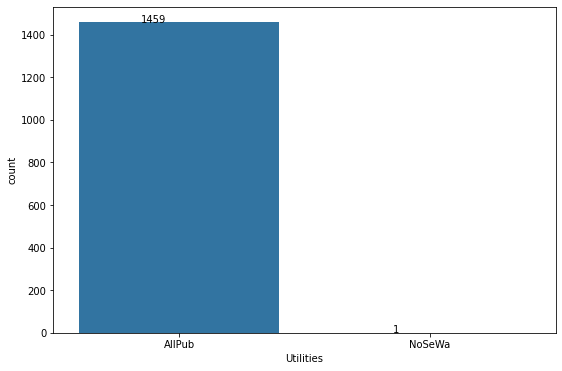

In [42]:
countplot(train_df['Utilities'])

#### Observations :     
**Utilities: Type of utilities available**
		
  - **AllPub ::** All public Utilities (Electricity, Gas, Water, & Septic Tank) - 1459	
  - **NoSeWa ::** Electricity and Gas Only - 1

### **Countplot** of **LotConfig**

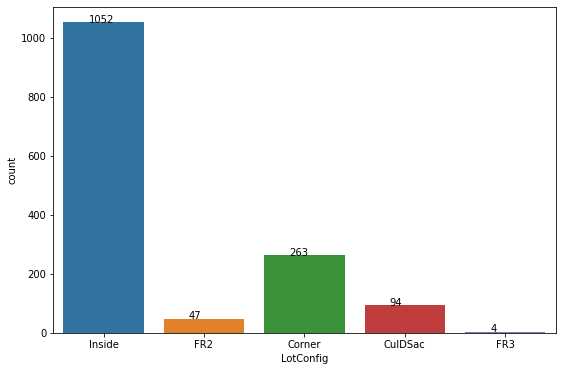

In [43]:
countplot(train_df['LotConfig'])

#### Observations :      
**LotConfig: Lot configuration**

  - **Inside ::**	Inside lot - 1052
  - **Corner ::**	Corner lot - 263
  - **CulDSac ::**	Cul-de-sac - 94
  - **FR2 ::**	Frontage on 2 sides of property - 47
  - **FR3 ::**	Frontage on 3 sides of property - 4

### **Countplot** of **LandSlope**

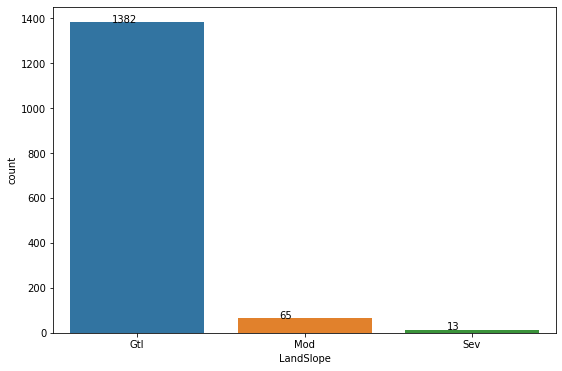

In [44]:
countplot(train_df['LandSlope'])

#### Observations ✍ :     
**LandSlope: Slope of property**
		
  - **Gtl ::**	Gentle slope - 1382
  - **Mod	::** Moderate Slope	- 65
  - **Sev	::** Severe Slope - 13


### **Countplot** of **Neighborhood**

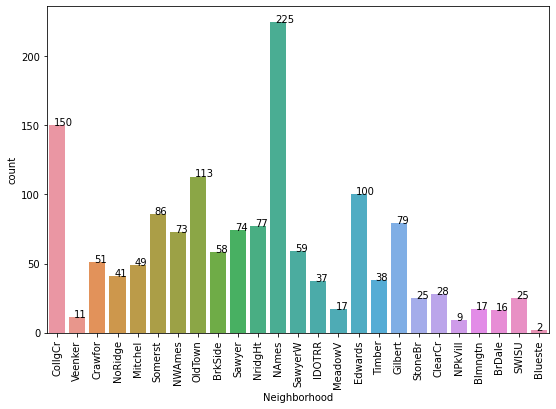

In [45]:
countplotlable(train_df['Neighborhood'])

#### Observations :     
**Neighborhood: Physical locations within Ames city limits**

  - **Names ::**	North Ames - 225
  - **CollgCr ::**	College Creek - 150
  - **OldTown ::**	Old Town - 113
  - **Edwards ::**	Edwards - 100
  - **Somerst ::**	Somerset - 86
  - **Gilbert ::**	Gilbert - 79
  - **NridgHt ::**	Northridge Heights - 77
  - **Sawyer ::**	Sawyer - 74
  - **NWAmes ::**	Northwest Ames - 73
  - **SawyerW	::** Sawyer West - 59
  - **BrkSide ::**	Brookside - 58
  - **Crawfor ::**	Crawford - 51
  - **Mitchel ::**	Mitchell - 49
  - **NoRidge ::**	Northridge - 41
  - **Timber ::**	Timberland - 38
  - **IDOTRR ::**	Iowa DOT and Rail Road - 37
  - **ClearCr ::**	Clear Creek - 28 
  - **StoneBr	::** Stone Brook - 25
  - **SWISU ::**	South & West of Iowa State University - 25
  - **Blmngtn ::**	Bloomington Heights 17
  - **MeadowV ::**	Meadow Village - 17
  - **BrDale ::**	Briardale - 16
  - **Veenker ::**	Veenker - 11
  - **NPkVill	::** Northpark Villa - 9
  - **Blueste ::**	Bluestem - 2 
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  

### Countplot of Condition1

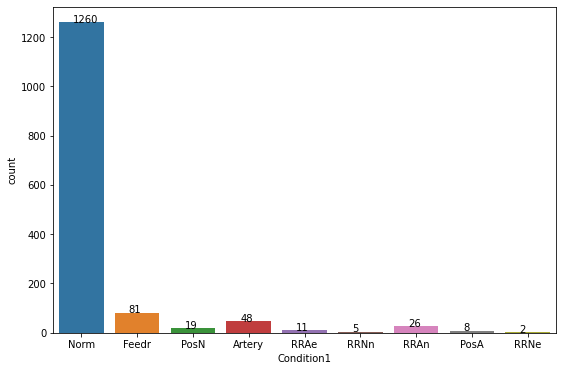

In [46]:
countplot(train_df['Condition1'])

#### Observations :      
**Condition1: Proximity to various conditions**
	
  - **Artery ::**	Adjacent to arterial street - 48
  - **Feedr ::**	Adjacent to feeder street	- 81
  - **Norm ::**	Normal - 1260
  - **RRNn ::**	Within 200' of North-South Railroad - 5
  - **RRAn ::**	Adjacent to North-South Railroad - 26
  - **PosN ::**	Near positive off-site feature--park, greenbelt, etc. - 19
  - **PosA ::**	Adjacent to postive off-site feature - 8
  - **RRNe ::**	Within 200' of East-West Railroad - 2
  - **RRAe ::**	Adjacent to East-West Railroad - 11

### Countplot of Condition2

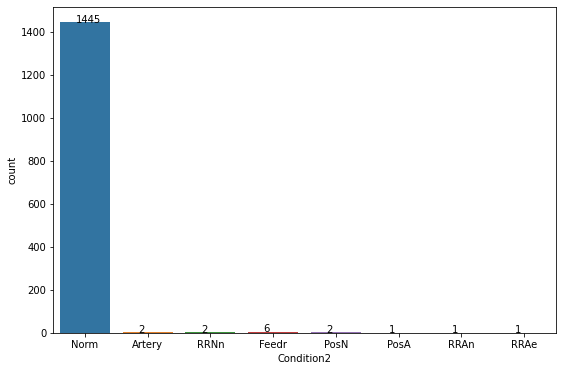

In [47]:
countplot(train_df['Condition2'])

#### Observations :      
**Condition2: Proximity to various conditions (if more than one is present)**
		
  - **Artery ::**	Adjacent to arterial street - 2
  - **Feedr ::**	Adjacent to feeder street	 - 6
  - **Norm ::**	Normal - 1445
  - **RRNn ::**	Within 200' of North-South Railroad - 2
  - **RRAn ::**	Adjacent to North-South Railroad - 1
  - **PosN ::**	Near positive off-site feature--park, greenbelt, etc. - 1
  - **PosA ::**	Adjacent to postive off-site feature - 1
  - **RRAe ::**	Adjacent to East-West Railroad - 1

### Countplot of BldgType

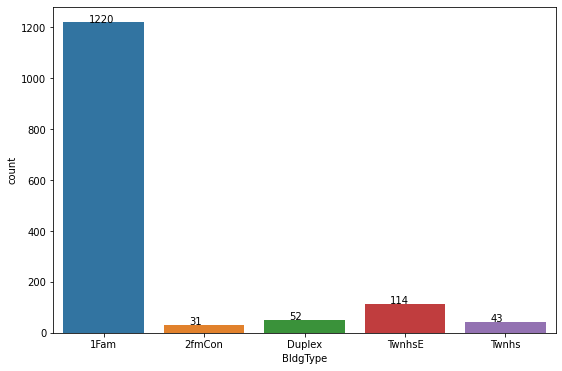

In [48]:
countplot(train_df['BldgType'])

#### Observations :    
**BldgType: Type of dwelling**
		
  - **1Fam ::**	Single-family Detached - 1220
  - **2FmCon ::**	Two-family Conversion; originally built as one-family dwelling - 31
  - **Duplx ::**	Duplex - 52
  - **TwnhsE ::**	Townhouse End Unit - 114
  - **Twnhs ::**	Townhouse Inside Unit - 43

### Countplot of HouseStyle

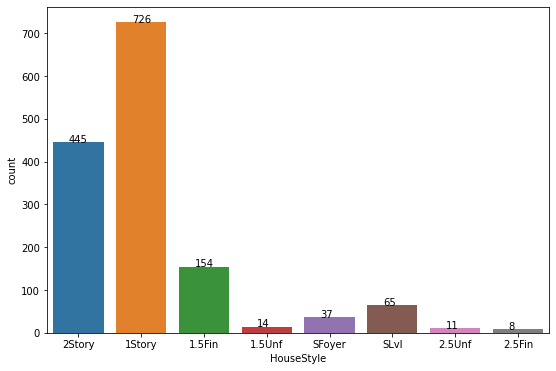

In [49]:
countplot(train_df['HouseStyle'])

#### Observations :    
**HouseStyle: Style of dwelling**
	
  - **1Story ::**	One story - 726
  - **1.5Fin ::**	One and one-half story: 2nd level finished - 154
  - **1.5Unf ::**	One and one-half story: 2nd level unfinished - 14
  - **2Story ::**	Two story - 445
  - **2.5Fin ::**	Two and one-half story: 2nd level finished - 8
  - **2.5Unf ::**	Two and one-half story: 2nd level unfinished - 11
  - **SFoyer ::**	Split Foyer - 37
  - **SLvl ::**	Split Level - 65

### **Countplot** of **RoofStyle**

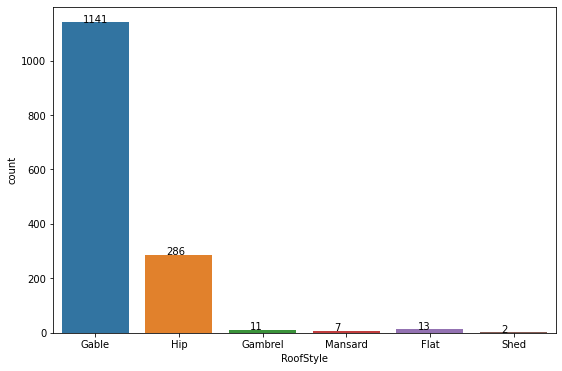

In [50]:
countplot(train_df['RoofStyle'])

#### Observations :     
**RoofStyle: Type of roof**

  - **Flat ::**	Flat - 13
  - **Gable ::**	Gable - 1141
  - **Gambrel ::**	Gabrel (Barn) - 11
  - **Hip ::**	Hip - 286
  - **Mansard	::** Mansard - 7
  - **Shed ::** Shed - 2

### **Countplot** of **RoofMatl**

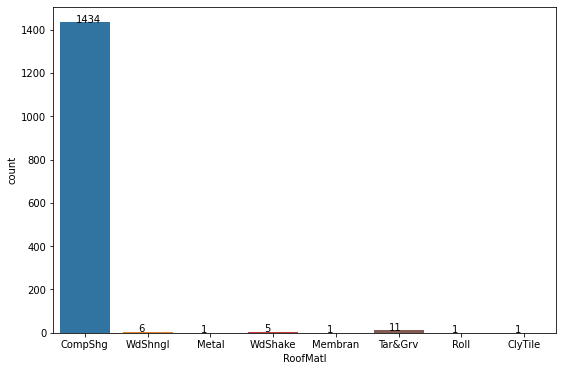

In [51]:
countplot(train_df['RoofMatl'])

#### Observations :      
**RoofMatl: Roof material**

  - **ClyTile ::**	Clay or Tile
  - **CompShg ::**	Standard (Composite) Shingle
  - **Membran	::** Membrane
  - **Metal ::**	Metal
  - **Roll ::** Roll
  - **Tar&Grv ::**	Gravel & Tar
  - **WdShake ::**	Wood Shakes
  - WdShngl ::	Wood Shingles

### **Countplot** of **Exterior1st**

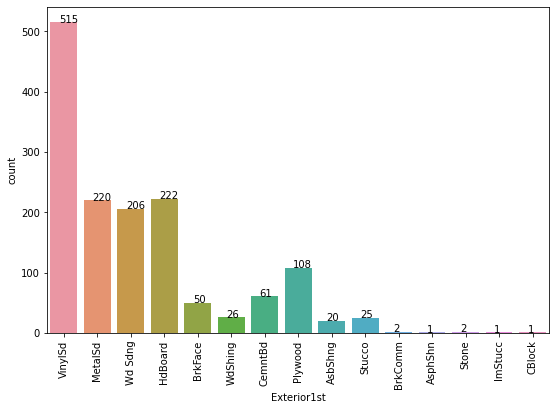

In [52]:
plt.figure(figsize=(9,6))
ax = sns.countplot(train_df['Exterior1st'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=90);

#### Observations :    
**Exterior1st: Exterior covering on house**

  - **AsbShng ::**	Asbestos Shingles - 20
  - **AsphShn ::**	Asphalt Shingles - 1
  - **BrkComm ::**	Brick Common - 2
  - **BrkFace ::**	Brick Face - 50
  - **CBlock	::** Cinder Block - 1
  - **CemntBd ::**	Cement Board - 61
  - **HdBoard ::**	Hard Board - 222
  - **ImStucc ::**	Imitation Stucco - 1
  - **MetalSd ::**	Metal Siding - 220
  - **Plywood ::**	Plywood - 108
  - **Stone	::** Stone - 2
  - **Stucco	::** Stucco - 25
  - **VinylSd	::** Vinyl Siding - 515
  - **Wd Sdng	::** Wood Siding - 206
  - **WdShing	::** Wood Shingles - 26

### **Countplot** of **Exterior2nd**

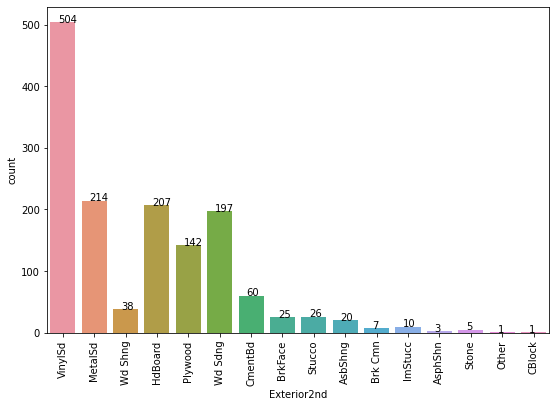

In [53]:
countplotlable(train_df['Exterior2nd'])

#### Observations :     
**Exterior2nd: Exterior covering on house (if more than one material)**

  - **AsbShng ::**	Asbestos Shingles - 20
  - **AsphShn	::** Asphalt Shingles - 3
  - **BrkCmn	::** Brick Common - 7
  - **BrkFace	::** Brick Face - 25
  - **CBlock	::** Cinder Block - 1
  - **CemntBd	::** Cement Board - 60
  - **HdBoard	::** Hard Board - 207
  - **ImStucc	::** Imitation Stucco - 10
  - **MetalSd	::** Metal Siding - 214
  - **Other	::** Other - 1
  - **Plywood	::** Plywood - 142
  - **PreCast	::** PreCast - 
  - **Stone	::** Stone - 5
  - **Stucco	::** Stucco - 26
  - **VinylSd	::** Vinyl Siding - 504
  - **Wd Sdng	::** Wood Siding - 197
  - **WdShing	::** Wood Shingles - 38

### **Countplot** of **MasVnrType**

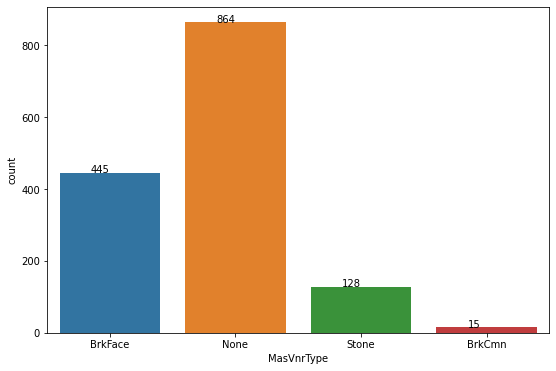

In [54]:
countplot(train_df['MasVnrType'])

#### Observations :    
**MasVnrType: Masonry veneer type**

  - **BrkCmn ::**	Brick Common - 15
  - **BrkFace ::**	Brick Face - 445
  - **None ::**	None - 864
  - **Stone ::**	Stone - 128

### **Countplot** of **ExterQual**

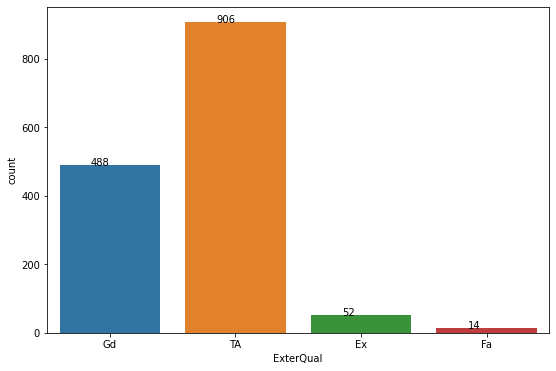

In [55]:
countplot(train_df['ExterQual'])

#### Observations :     
**ExterQual: Evaluates the quality of the material on the exterior**
		
  - **Ex ::**	Excellent - 52
  - **Gd ::**	Good - 488
  - **TA ::**	Average/Typical - 906
  - **Fa ::**	Fair - 14

### **Countplot** of **ExterCond**

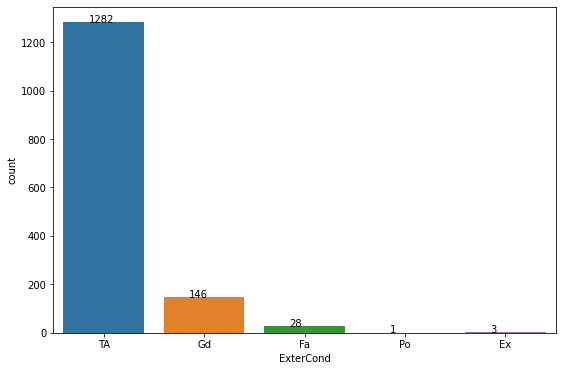

In [56]:
countplot(train_df['ExterCond'])

#### Observations :     
**ExterCond: Evaluates the present condition of the material on the exterior**
		
  - **Ex ::**	Excellent - 3
  - **Gd ::**	Good - 146
  - **TA ::**	Average/Typical - 1282
  - **Fa ::**	Fair - 28
  - **Po ::**	Poor - 1

### **Countplot** of **Foundation**

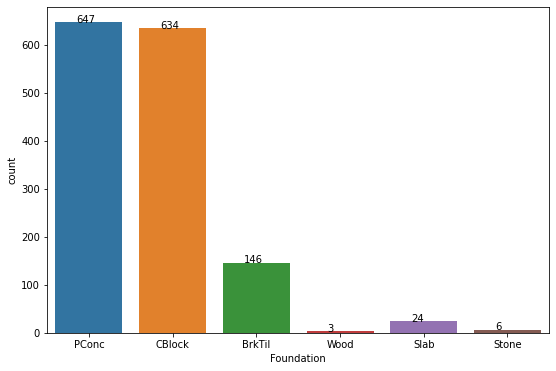

In [57]:
countplot(train_df['Foundation'])

#### Observations :     
**Foundation: Type of foundation**
		
  - **BrkTil ::**	Brick & Tile - 146
  - **CBlock ::**	Cinder Block - 634
  - **PConc	::** Poured Contrete	- 647
  - **Slab	::** Slab - 24
  - **Stone	::** Stone - 6
  - **Wood	::** Wood - 3

### **Countplot** of **BsmtQual**

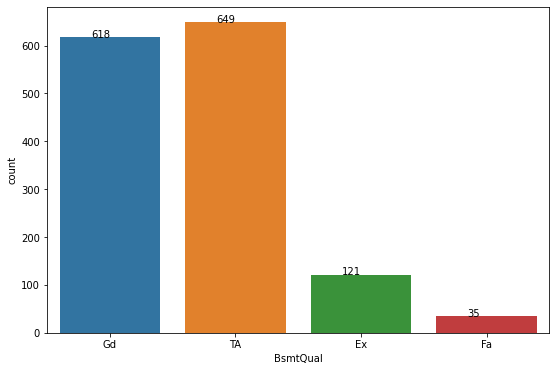

In [58]:
countplot(train_df['BsmtQual'])

#### Observations :      
**BsmtQual: Evaluates the height of the basement**

  - **Ex ::**	Excellent (100+ inches)	- 121
  - **Gd ::**	Good (90-99 inches) - 618
  - **TA ::**	Typical (80-89 inches) - 649
  - **Fa ::**	Fair (70-79 inches) - 35

### **Countplot** of **BsmtCond**

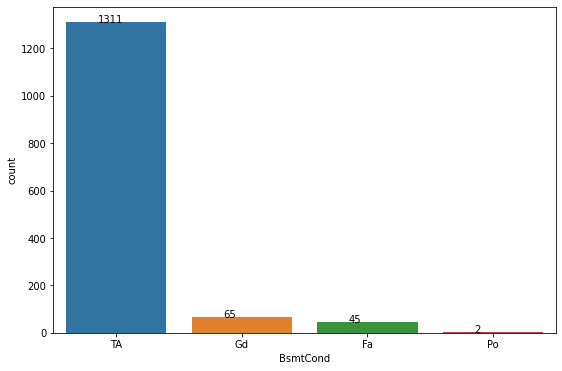

In [59]:
countplot(train_df['BsmtCond'])

#### Observations :     
**BsmtCond: Evaluates the general condition of the basement**

  - **Gd ::**	Good - 65
  - **TA ::**	Typical - slight dampness allowed - 1311
  - **Fa ::**	Fair - dampness or some cracking or settling - 45
  - **Po ::**	Poor - Severe cracking, settling, or wetness - 2

### **Countplot** of **BsmtExposure**   

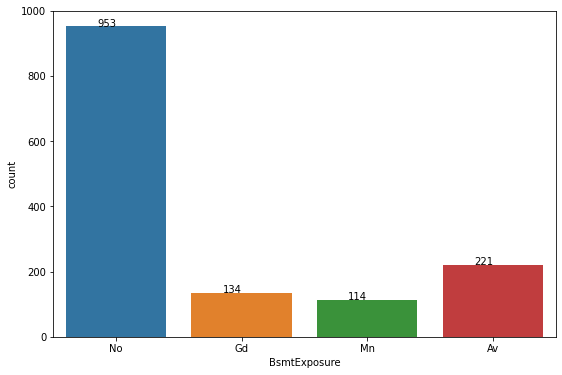

In [60]:
countplot(train_df['BsmtExposure'])

#### Observations :    
**BsmtExposure: Refers to walkout or garden level walls**

  - **Gd ::**	Good Exposure - 134
  - **Av ::**	Average Exposure (split levels or foyers typically score average or above) - 221
  - **Mn ::**	Mimimum Exposure - 114
  - **No ::**	No Exposure - 953

### **Countplot** of **BsmtFinType1**   

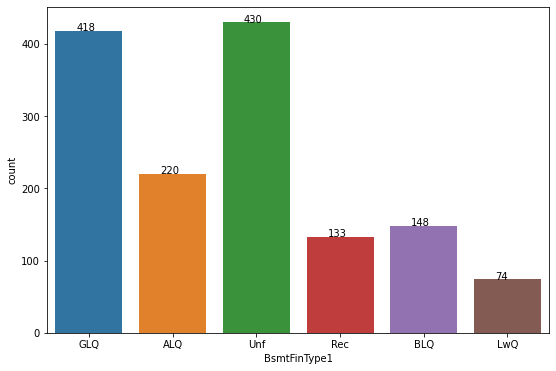

In [61]:
countplot(train_df['BsmtFinType1'])

#### Observations :     
BsmtFinType1: Rating of basement finished area

  - **GLQ ::**	Good Living Quarters - 418
  - **ALQ ::**	Average Living Quarters - 220
  - **BLQ ::**	Below Average Living Quarters - 148	
  - **Rec	::** Average Rec Room - 133
  - **LwQ	::** Low Quality - 74
  - **Unf	::** Unfinshed - 430

### **Countplot** of **BsmtFinType2**   

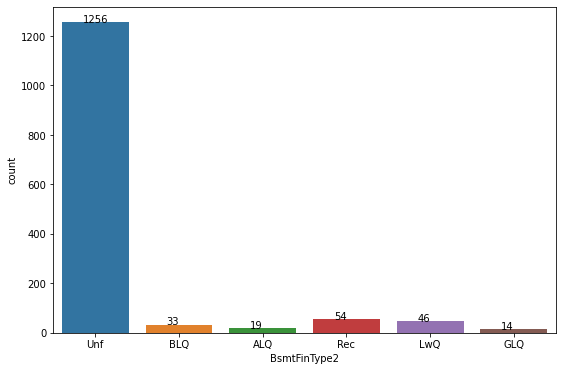

In [62]:
countplot(train_df['BsmtFinType2'])

#### Observations :    
**BsmtFinType2: Rating of basement finished area (if multiple types)**

  - **GLQ ::**	Good Living Quarters - 14
  - **ALQ ::**	Average Living Quarters - 19
  - **BLQ ::**	Below Average Living Quarters	- 33
  - **Rec ::**	Average Rec Room - 54
  - **LwQ ::**	Low Quality - 46
  - **Unf ::**	Unfinshed - 1256

### **Countplot** of **Heating**

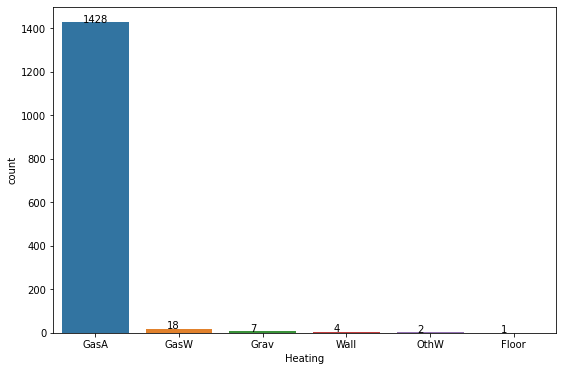

In [63]:
countplot(train_df['Heating'])

#### Observations :      
**Heating: Type of heating**
		
  - **Floor ::**	Floor Furnace - 1
  - **GasA ::**	Gas forced warm air furnace - 1428
  - **GasW ::**	Gas hot water or steam heat - 18
  - **Grav ::**	Gravity furnace	- 7
  - **OthW ::**	Hot water or steam heat other than gas - 2
  - **Wall ::**	Wall furnace - 4

### **Countplot** of **HeatingQC**

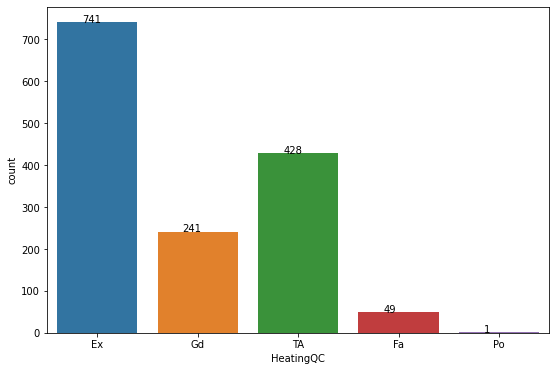

In [64]:
countplot(train_df['HeatingQC'])

#### Observations :      
**HeatingQC: Heating quality and condition**

  - **Ex ::**	Excellent - 741
  - **Gd ::**	Good - 241
  - **TA ::**	Average/Typical - 428
  - **Fa ::**	Fair - 49
  - **Po ::**	Poor - 1

### **Countplot** of **CentralAir**

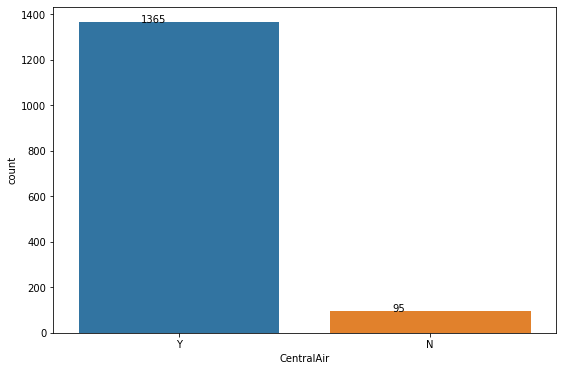

In [65]:
countplot(train_df['CentralAir'])

#### Observations :     
**CentralAir: Central air conditioning**

  - **N ::**	No - 95
  - **Y ::**	Yes - 1365

### **Countplot** of **Electrical**

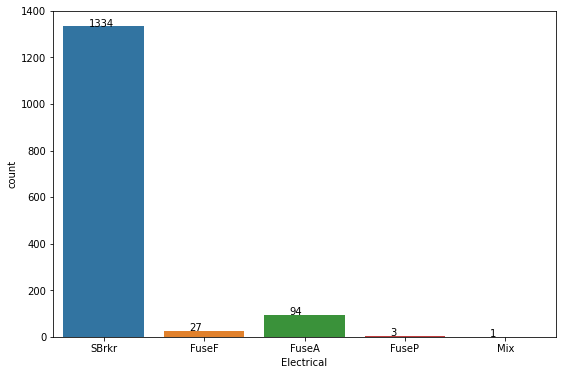

In [66]:
countplot(train_df['Electrical'])

#### Observations :     
**Electrical: Electrical system**

  - **SBrkr ::**	Standard Circuit Breakers & Romex - 1334
  - **FuseA ::**	Fuse Box over 60 AMP and all Romex wiring (Average)	- 94
  - **FuseF ::**	60 AMP Fuse Box and mostly Romex wiring (Fair) - 27
  - **FuseP ::**	60 AMP Fuse Box and mostly knob & tube wiring (poor) - 3
  - **Mix	::** Mixed - 1

### **Countplot** of **KitchenQual**

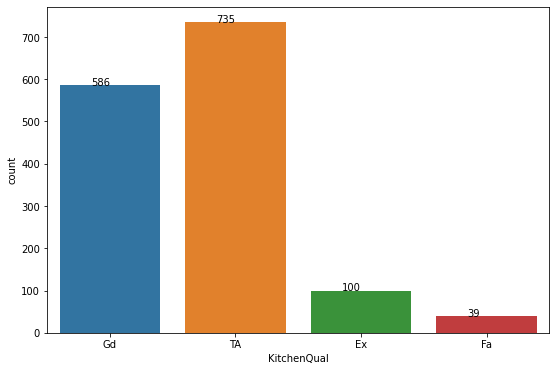

In [67]:
countplot(train_df['KitchenQual'])

#### Observations :       
**KitchenQual: Kitchen quality**

  - **Ex ::**	Excellent - 100
  - **Gd ::**	Good - 586
  - **TA ::**	Typical/Average - 735
  - **Fa ::**	Fair - 39

### **Countplot** of **Functional**

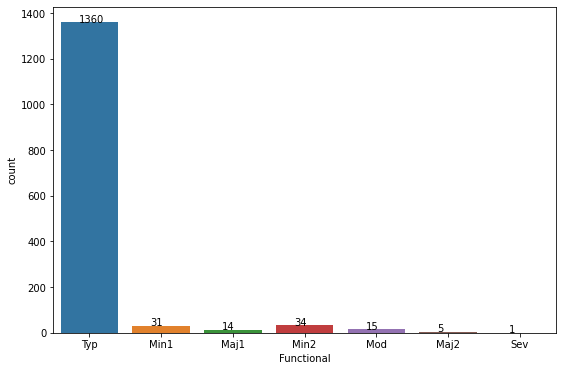

In [68]:
countplot(train_df['Functional'])

#### Observations :    
**Functional: Home functionality (Assume typical unless deductions are warranted)**

  - **Typ ::**	Typical Functionality - 1360
  - **Min1 ::**	Minor Deductions 1 - 31
  - **Min2 ::**	Minor Deductions 2 - 34
  - **Mod	::** Moderate Deductions - 15
  - **Maj1 ::**	Major Deductions 1 - 14
  - **Maj2 ::**	Major Deductions 2 - 5
  - **Sev ::**	Severely Damaged - 1

### **Countplot** of **FireplaceQu**

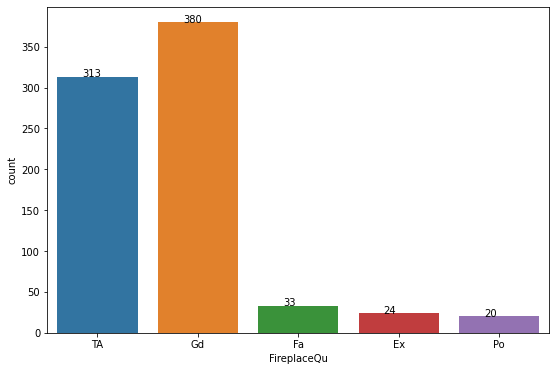

In [69]:
countplot(train_df['FireplaceQu'])

#### Observations :     
**FireplaceQu: Fireplace quality**

  - **Ex ::**	Excellent - Exceptional Masonry Fireplace - 24
  - **Gd ::**	Good - Masonry Fireplace in main level - 380
  - **TA ::**	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement - 313
  - **Fa ::**	Fair - Prefabricated Fireplace in basement - 33
  - **Po ::**	Poor - Ben Franklin Stove - 20

### **Countplot** of **GarageType**

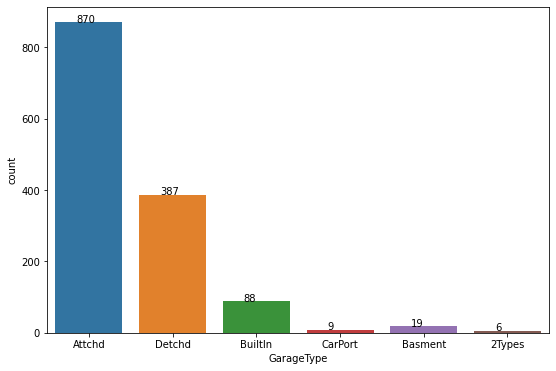

In [70]:
countplot(train_df['GarageType'])

#### Observations :    
**GarageType: Garage location**
		
  - **2Types ::**	More than one type of garage - 6
  - **Attchd ::**	Attached to home - 870
  - **Basment ::**	Basement Garage - 19
  - **BuiltIn ::**	Built-In (Garage part of house - typically has room above garage) - 88
  - **CarPort ::**	Car Port - 9
  - **Detchd ::**	Detached from home - 387

### **Countplot** of **GarageFinish**

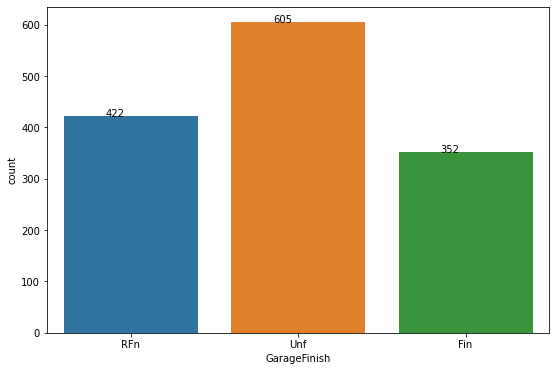

In [71]:
countplot(train_df['GarageFinish'])

#### Observations :    
**GarageFinish: Interior finish of the garage**

  - **Fin ::**	Finished - 352
  - **RFn ::**	Rough Finished - 422	
  - **Unf ::**	Unfinished - 605

### **Countplot** of **GarageQual**

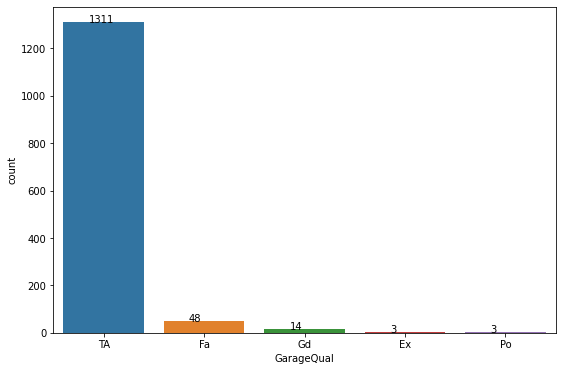

In [72]:
countplot(train_df['GarageQual'])

#### Observations :      
**GarageQual: Garage quality**

  - **Ex ::**	Excellent - 3
  - **Gd ::**	Good - 14
  - **TA ::**	Typical/Average - 1311
  - **Fa ::**	Fair - 48
  - **Po ::**	Poor - 3

### **Countplot** of **GarageCond**

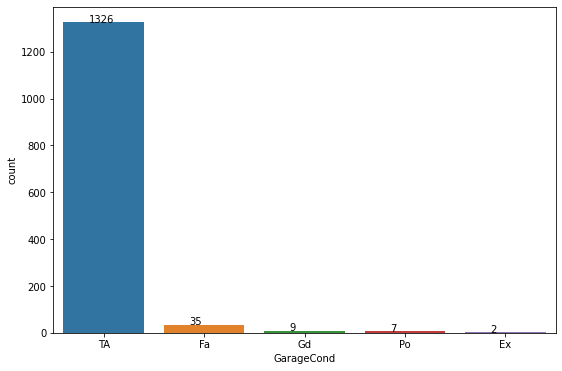

In [73]:
countplot(train_df['GarageCond'])

#### Observations :     
**GarageCond: Garage condition**

  - **Ex ::**	Excellent - 2
  - **Gd ::**	Good - 9 
  - **TA ::**	Typical/Average - 1326
  - **Fa ::**	Fair - 35
  - **Po ::**	Poor - 7

### **Countplot** of **PavedDrive**

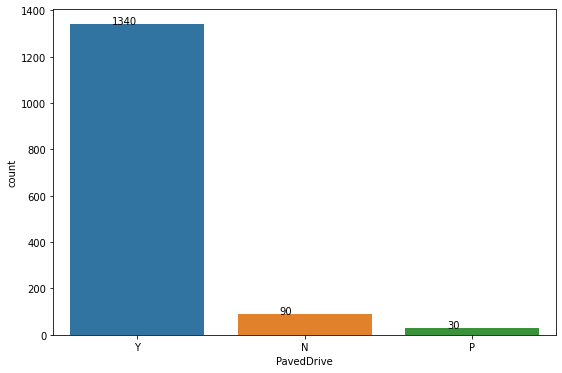

In [74]:
countplot(train_df['PavedDrive'])

#### Observations :      
**PavedDrive: Paved driveway**

  - **Y ::**	Paved - 1340
  - **P ::**	Partial Pavement - 30
  - **N	::** Dirt/Gravel - 90

### **Countplot** of **PoolQC**

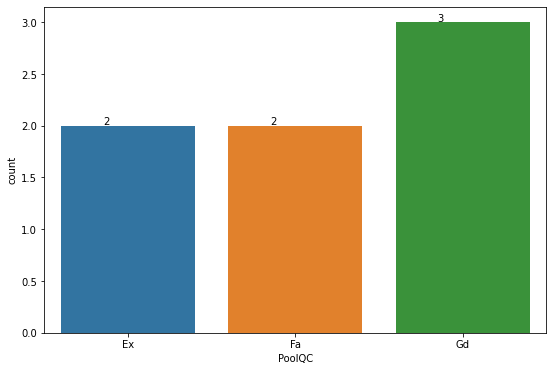

In [75]:
countplot(train_df['PoolQC'])

#### Observations :    
**PoolQC: Pool quality**
		
  - **Ex ::**	Excellent - 2
  - **Gd ::**	Good - 3
  - **Fa ::**	Fair - 2

### **Countplot** of **Fence**

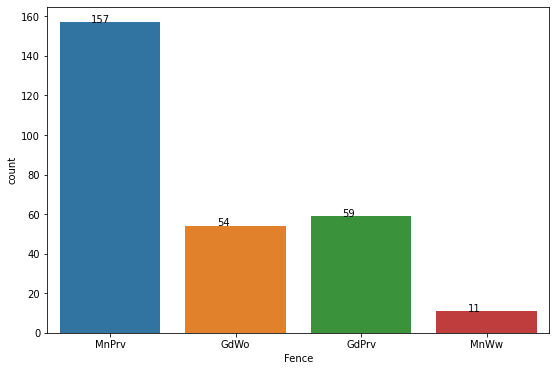

In [76]:
countplot(train_df['Fence'])

#### Observations :     
**Fence: Fence quality**
		
  - **GdPrv ::**	Good Privacy - 59
  - **MnPrv ::**	Minimum Privacy - 157
  - **GdWo ::**	Good Wood - 54
  - **MnWw ::**	Minimum Wood/Wire - 11

### **Countplot** of **MiscFeature**

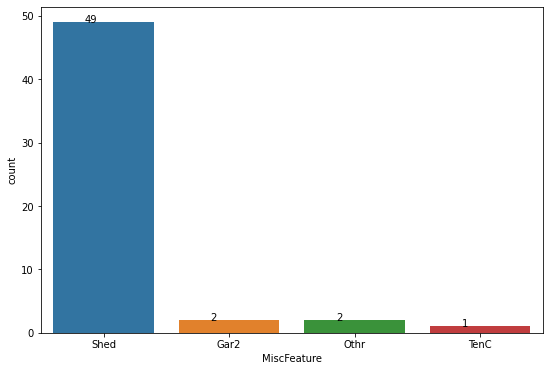

In [77]:
countplot(train_df['MiscFeature'])

#### Observations :    
**MiscFeature: Miscellaneous feature not covered in other categories**
		
  - **Gar2 ::**	2nd Garage (if not described in garage section) - 2
  - **Othr ::**	Other - 2 
  - **Shed ::**	Shed (over 100 SF) - 49
  - **TenC ::**	Tennis Court - 1

### **Countplot** of **SaleType**

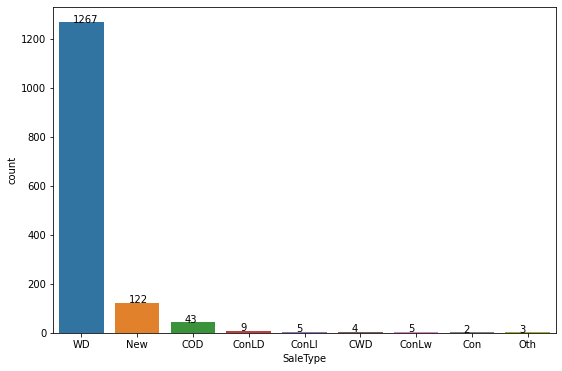

In [78]:
countplot(train_df['SaleType'])

#### Observations :      
**SaleType: Type of sale**
		
  - **WD ::** 	Warranty Deed - Conventional - 1267
  - **CWD ::**	Warranty Deed - Cash - 4
  - **New ::**	Home just constructed and sold - 122
  - **COD ::**	Court Officer Deed/Estate - 43
  - **Con ::**	Contract 15% Down payment regular terms - 2
  - **ConLw ::**	Contract Low Down payment and low interest - 5
  - **ConLI ::**	Contract Low Interest - 5
  - **ConLD ::**	Contract Low Down - 9
  - **Oth ::**	Other - 3

### **Countplot** of **SaleCondition**

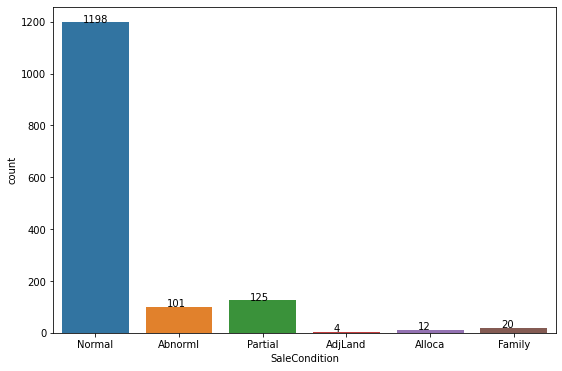

In [79]:
countplot(train_df['SaleCondition'])

#### Observations :     
**SaleCondition: Condition of sale**

  - **Normal ::**	Normal Sale - 1198
  - **Abnorml ::**	Abnormal Sale -  trade, foreclosure, short sale - 101
  - **AdjLand ::**	Adjoining Land Purchase - 4
  - **Alloca ::**	Allocation - two linked properties with separate deeds, typically condo with a garage unit - 12
  - **Family ::**	Sale between family members - 20
  - **Partial ::**	Home was not completed when last assessed (associated with New Homes) - 125

### **Distplot** of **SalePrice**

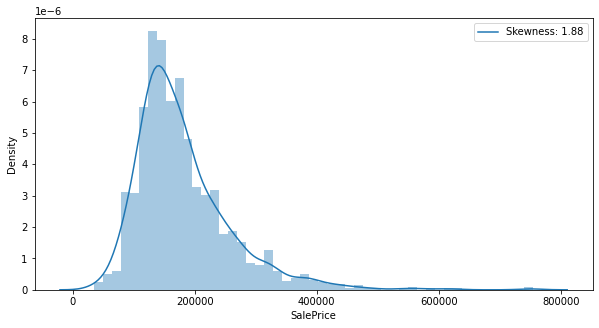

In [80]:
plt.figure(figsize=(10,5))
bar = sns.distplot(train_df["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(train_df['SalePrice'].skew())])

#### Observations :      
- **SalePrice** column is **not normaly distributed**. It is left skwed.
- To get normal distribution of SalePrice Column i will use **log**.

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## **Multivariate Analysis**

### Ploting **Countplot** of **Missing** Values 

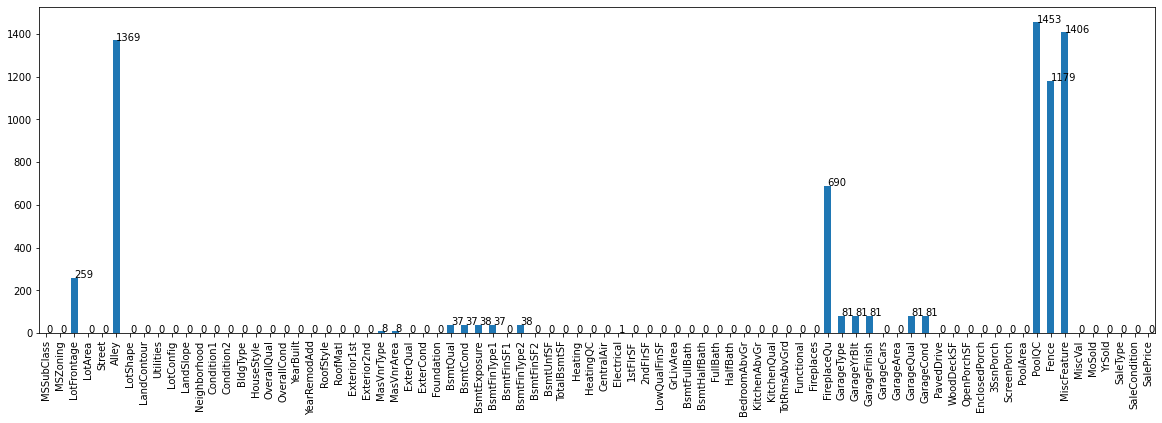

In [82]:
plt.figure(figsize=(20,6))
ax = train_df.isna().sum().plot(kind='bar')
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

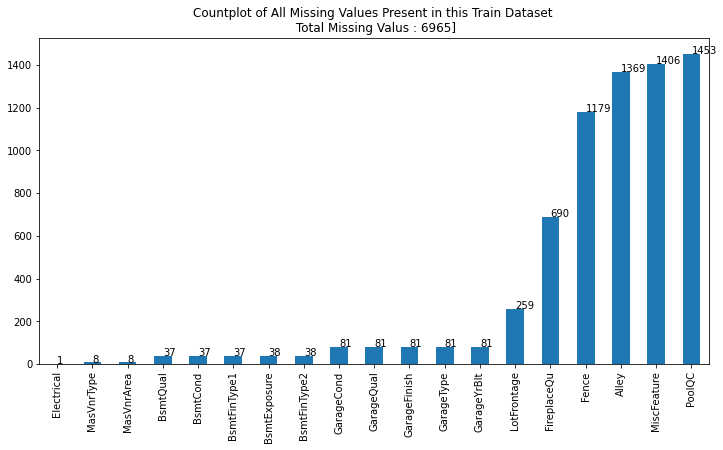

In [83]:
plt.figure(figsize=(12, 6))
miss = train_df.isnull().sum()
miss = miss[miss > 0]
miss = miss.sort_values()
ax = miss.plot.bar()
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title(f'Countplot of All Missing Values Present in this Train Dataset \n Total Missing Valus : {train_df.isna().sum().sum()}]');

#### Observations :     
**Missing Values : How much i have missing values**
  - **Total Missing Values** = 6965

###### **Columns** with **Maximum Missing Values** -
  - PoolQc = 1453
  - MiscFeature = 1406
  - Alley = 1369
  - Fence = 1179
  - FireplaceQu = 690

### **Function** for **Scatter** and **Violin** Plot

In [84]:
def scatter_line(x, y, a, b, S):
  X = x
  Y = y
  f, (ax1) = plt.subplots(sharey=False, figsize=(16,6))
  ax1.scatter(X, Y, s=S)
  line = mlines.Line2D([0, 5], [a, b], color='red',linewidth=3)
  transform = ax.transAxes
  line.set_transform(transform)
  ax1.add_line(line)
  #sns.violinplot(X, Y)
  #plt.show()

In [85]:
def scatter_cat_line(x, y, a, b, S):
  X = x
  Y = y
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,6))
  ax1.scatter(X, Y, s=S)
  line = mlines.Line2D([0, 2], [a, b], color='red',linewidth=3)
  transform = ax.transAxes
  line.set_transform(transform)
  ax1.add_line(line)
  sns.violinplot(X, Y)
  plt.show()

In [86]:
def scatter_line_cat(x, y, S):
  X = x
  Y = y
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,6))
  ax1.scatter(X, Y, s=S)
  # line = mlines.Line2D([0, 2], [a, b], color='red',linewidth=3)
  # transform = ax.transAxes
  # line.set_transform(transform)
  # ax1.add_line(line)
  sns.violinplot(X, Y)
  plt.show()

### **Scatterplot** Between **MSSubClass** and **SalePrice**

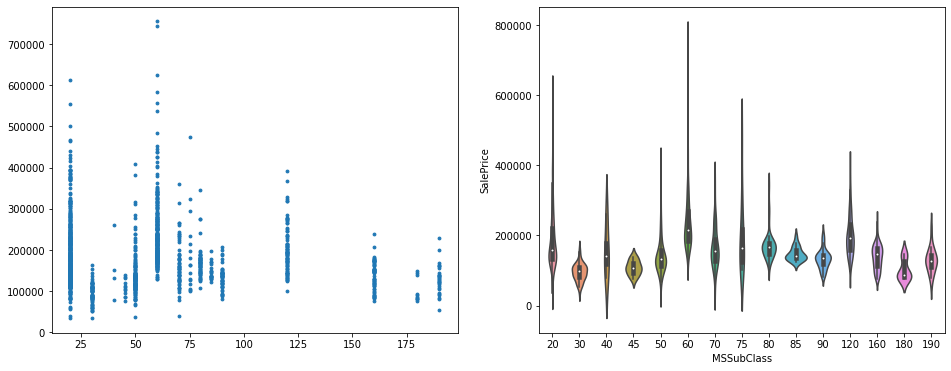

In [87]:
scatter_line_cat(train_df['MSSubClass'], train_df['SalePrice'], 8);

### **Scatterplot** between **LotFrontage** and **SalePrice**

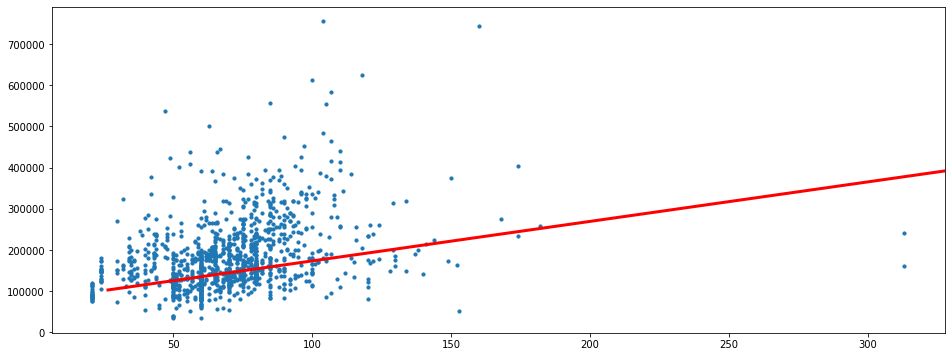

In [88]:
scatter_line(train_df['LotFrontage'], train_df['SalePrice'],0.04,1.5, 10)

#### Observations : 
**LotFrontage: Linear feet of street connected to property**
  - As well as the value of **LotFrontage** is **increased** the **Price of House slightly increased**.

### **Analysis** of **LotArea**

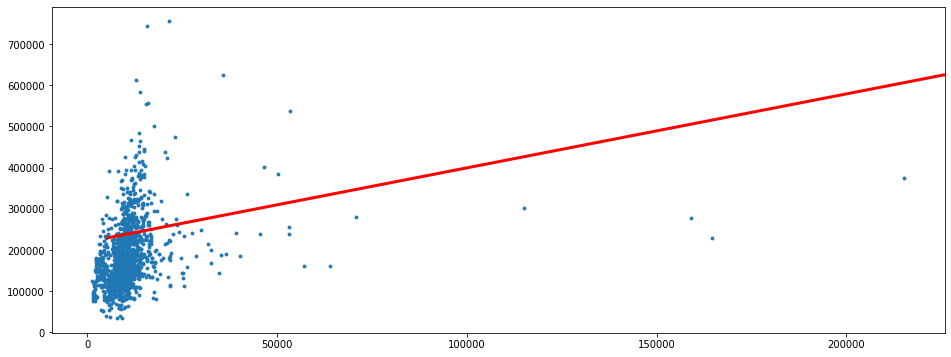

In [89]:
scatter_line(train_df['LotArea'], train_df['SalePrice'],0.2,2.2, 8)

#### Observations :     
**LotArea: Lot size in square feet**
  - **LotArea** is slightly **corrated** with **SalePrice**.
  - There are some **Outliers** present in **LotArea**.


### **Analysis** of **OverallQual**

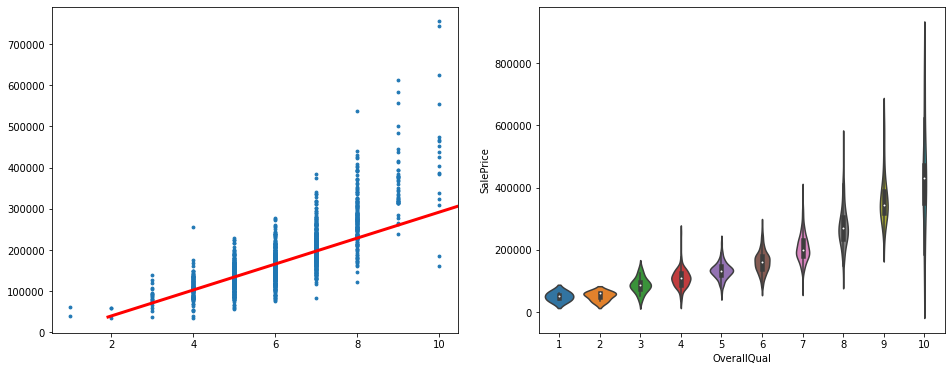

In [90]:
scatter_cat_line(train_df['OverallQual'], train_df['SalePrice'],0,1.3, 8)

#### Observations :    
**OverallQual: Rates the overall material and finish of the house**
  - **OverallQual** Column is **strongly positive correlated** with **SalePrice**.
  - It means this **column** is very **Important** for us.

### **Analysis** of **OverallCond** and **SalePrice**

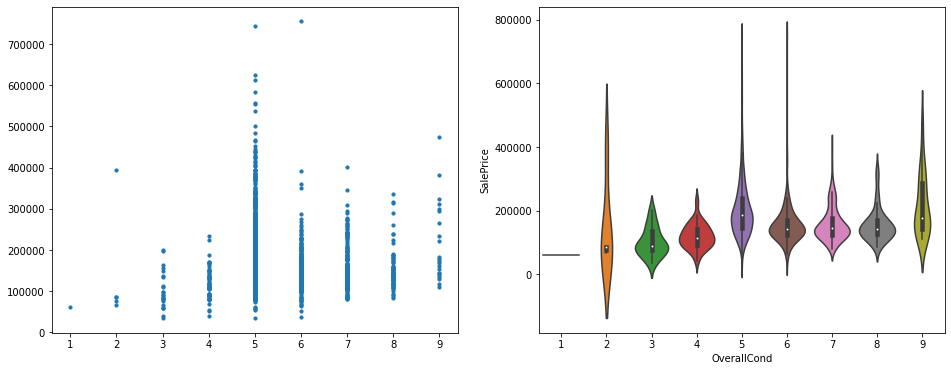

In [91]:
scatter_line_cat(train_df['OverallCond'], train_df['SalePrice'], 10)

#### Observations :   
**OverallCond: Rates the overall condition of the house**
  - This column is not very well correlated with SalePrice.
  - I will keep this for future use.

### **Analysis** of **YearBuilt** and **SalePrice**

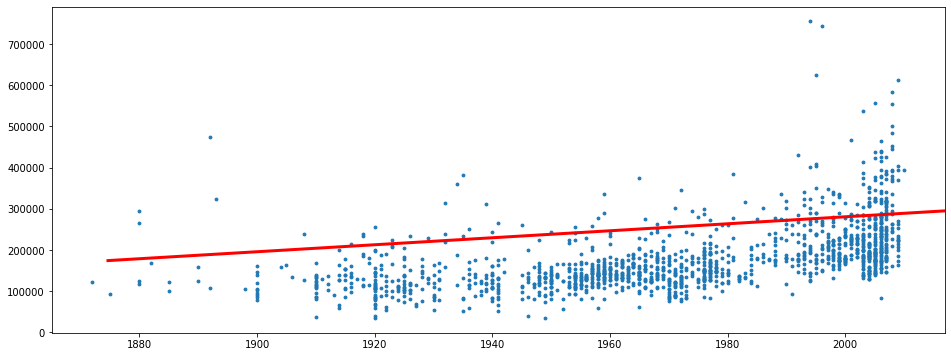

In [92]:
scatter_line(train_df['YearBuilt'], train_df['SalePrice'], 0.13, 0.74, 8)

#### Observations :      
**YearBuilt: Original construction date**
  - It is **positively correlated** with **SalePrice**.
  - We can see the **YearBuilt** Column is **strongly corrrlated** with the **SalePrice**.
  - As well as the **BuiltYear increasing Prices of the house also increasing**.

### **Analysis** of **YearRemodAdd** and **SalePrice**

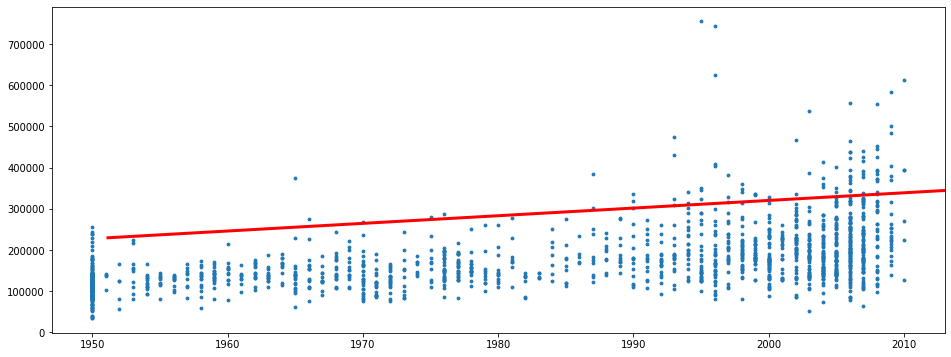

In [93]:
scatter_line(train_df['YearRemodAdd'], train_df['SalePrice'], 0.2, 0.78, 8)

#### Observations :     
**YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)**
  - There is a **positive** correlation.
  - **YearRemodAdd** is **slightly correlated** with **SalePrice**.
  - If the **Date** of **Remodel** is **increasing SalePrice** is also **icreasing**.


### **Analysis** of **MasVnrArea** and **SalePrice**

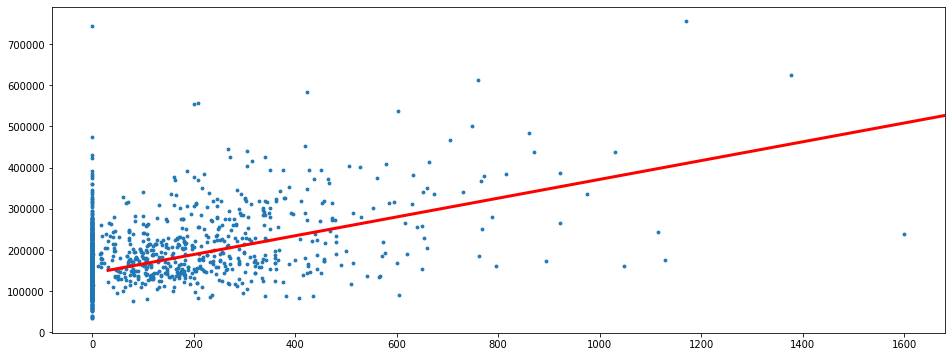

In [94]:
scatter_line(train_df['MasVnrArea'], train_df['SalePrice'], 0.1, 2, 8)

#### Observations :     
**MasVnrArea: Masonry veneer area in square feet**
  - It is **positively** correlated.
  - **SalePrices** slightly **depending** on **MasVnrArea**.

### **Analysis** of **BsmtFinSF1** and **SalePrice**

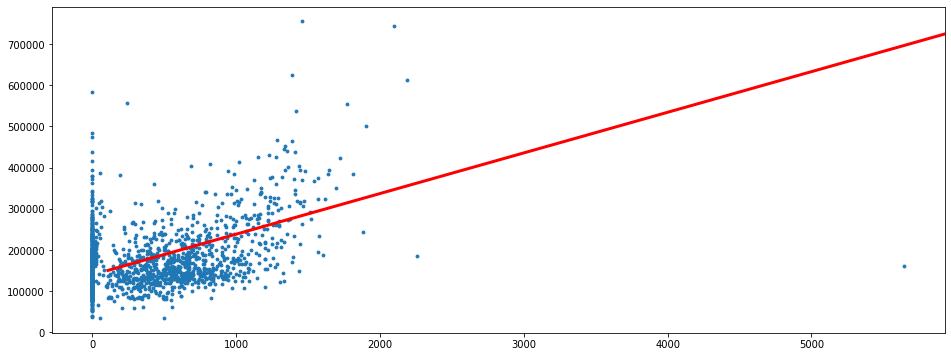

In [95]:
scatter_line(train_df['BsmtFinSF1'], train_df['SalePrice'], 0.1, 3, 8)

#### Observations :      
**BsmtFinSF1: Type 1 finished square feet**
  - This is **positively** correlated with **SalePrice**.
  - **SalePrices** can be **effected** due to this column's **values**.

### **Analysis** of **BsmtFinSF2** and **SalePrice**

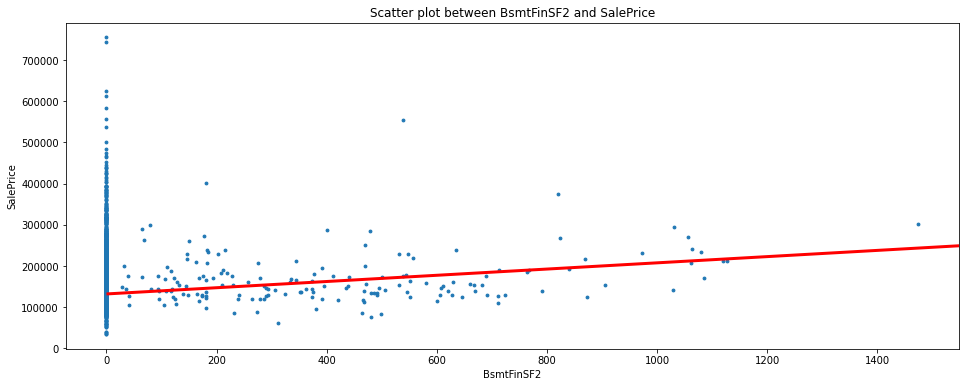

In [96]:
scatter_line(train_df['BsmtFinSF2'], train_df['SalePrice'],0.12,0.7,8)
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')
plt.title('Scatter plot between BsmtFinSF2 and SalePrice');

#### Observations :      
**BsmtFinSF2: Type 2 finished square feet**
  - After seeing **Scatter** plot, this column is **not providing good insights** for the **SalePrice**.


### **Analysis** of **BsmtUnfSF** and **SalePrice**

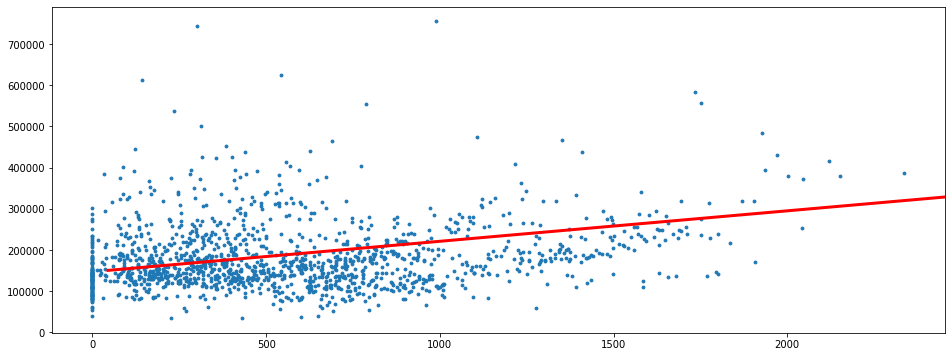

In [97]:
scatter_line(train_df['BsmtUnfSF'], train_df['SalePrice'],0.1,1, 8)

### Observations :       
**BsmtUnfSF: Unfinished square feet of basement area**
  - This is **slightly positively correlated** with **SalePrice**.
  - This column is providing me some **insight** for the **Output SalePrice**.

### **Analysis** of **TotalBsmtSF** and **SalePrice**

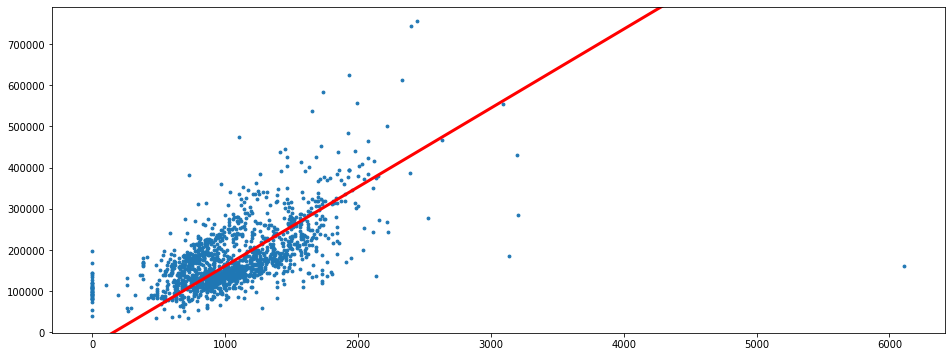

In [98]:
scatter_line(train_df['TotalBsmtSF'], train_df['SalePrice'],-0.1,6, 8)

#### Observations :     
**TotalBsmtSF: Total square feet of basement area**
  - This **feature** is **highly positively correlated** with **SalePrice**.
  - **Basement area generating impact** on output variable **SalePrice**.

### **Analysis** of **1stFlrSf** and **SalePrice**

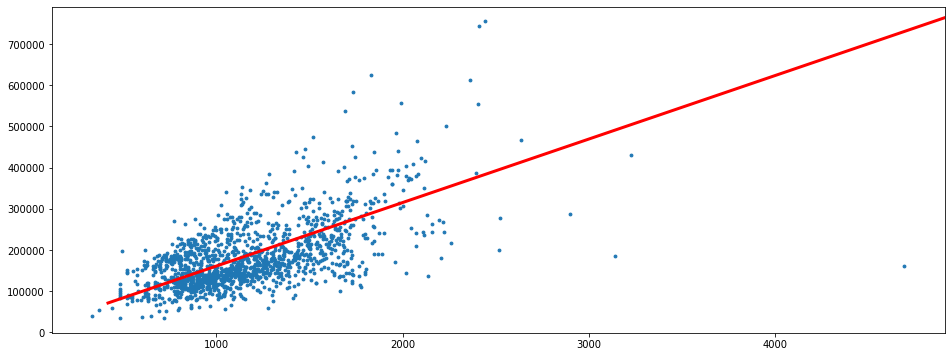

In [99]:
scatter_line(train_df['1stFlrSF'], train_df['SalePrice'],0, 3.5, 8)

#### Oservations :      
**1stFlrSF: First Floor square feet**
  - It seems that it is **highly positively correlated** with **SalePrice**.
  - This **feature** is giving me **good insights** of data.

### **Analysis** of **2ndFlrSF** and **SalePrice**

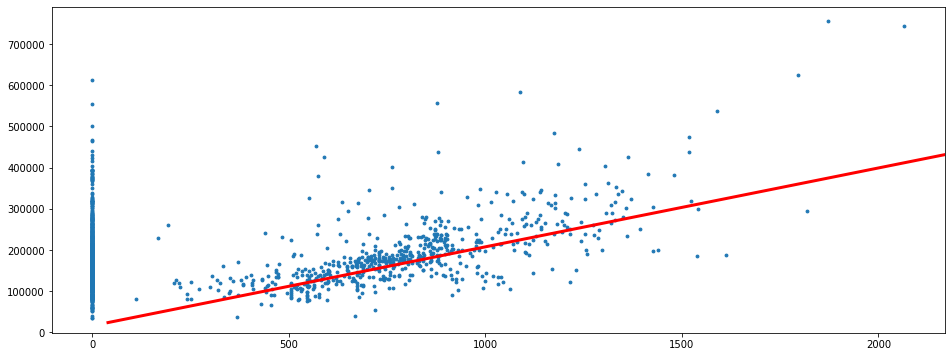

In [100]:
scatter_line(train_df['2ndFlrSF'], train_df['SalePrice'], -0.06,2,8)

#### Observations :    
**2ndFlrSF: Second floor square feet**
  - This is also **giving** us **some ammount of information**.
  - House **prices** can be **change** due to this **feature**.
  - So i am **keeping** this **feature** for future use.

### **Analysis** of **LowQualFinSF** and **SalePrice**

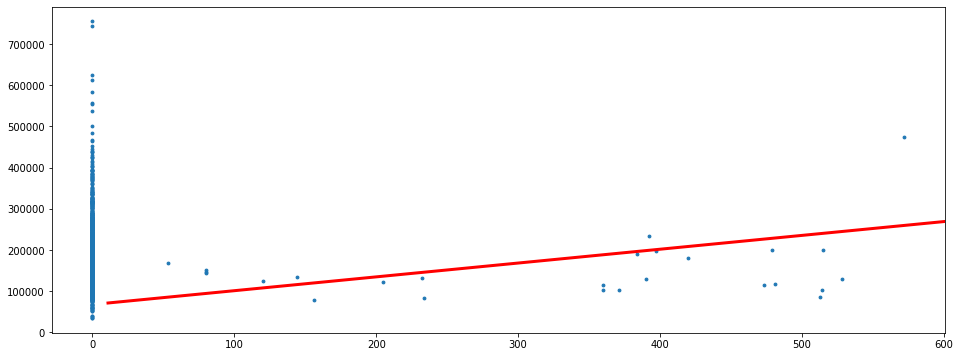

In [101]:
scatter_line(train_df['LowQualFinSF'], train_df['SalePrice'], 0, 1, 8)

#### Observations :     
**LowQualFinSF: Low quality finished square feet (all floors)**
  - This **feature** has **very less data points**.
  - So this **feature will not give any king of information** for my **SalePrice**.
  - So i **will drop this feature**.


### **Analysis** of **GrLivArea** and **SalePrice**

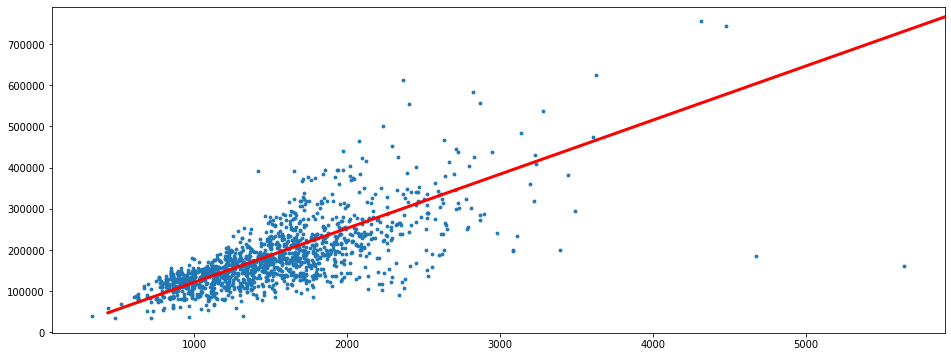

In [102]:
scatter_line(train_df['GrLivArea'], train_df['SalePrice'], -0.03, 3.6, 8)

#### Observations :      
**GrLivArea: Above grade (ground) living area square feet**
  - **GrLivArea** is **highly positively correlated** with the **SalePrice**.
  - This **feature** is **very important for my predictions**.

### **Analysis** of **BsmtFullBath** and **SalePrice**

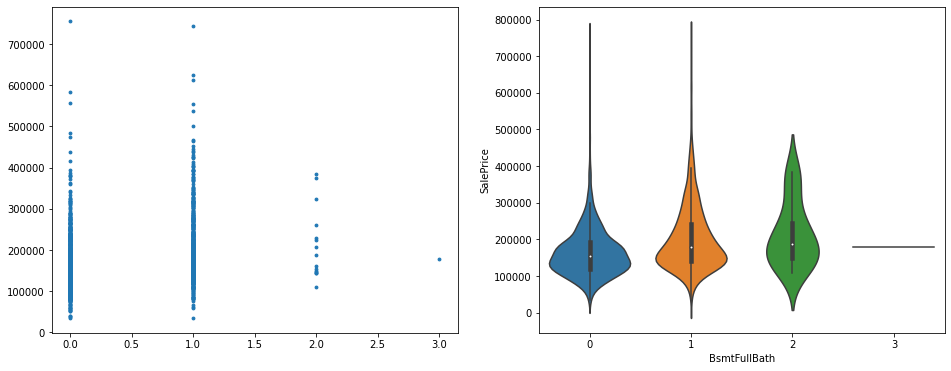

In [103]:
scatter_line_cat(train_df['BsmtFullBath'], train_df['SalePrice'],8)

#### Observations :     
**BsmtFullBath: Basement full bathrooms**
  - This is **giving** me some **information**.
  - It can be **effect** on **SalePrice**.

### **Analysis** of **BsmtHalfBath** and **SalePrice**

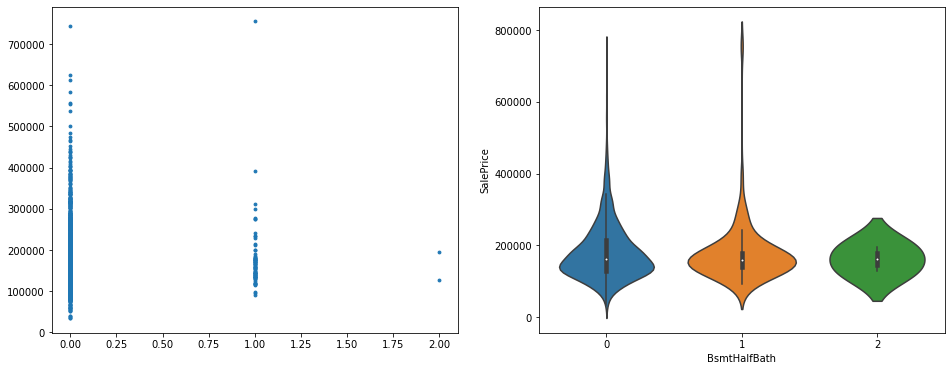

In [104]:
scatter_line_cat(train_df['BsmtHalfBath'], train_df['SalePrice'], 8)

#### Observations :     
**BsmtHalfBath: Basement half bathrooms**
  - **BsmtHalfBath** is **not giving** us any kind of **information**.
  - I will make a **new feature** with this **BsmtHalfBath** columns.

### **Analysis** of **FullBath** and **SalePrice**

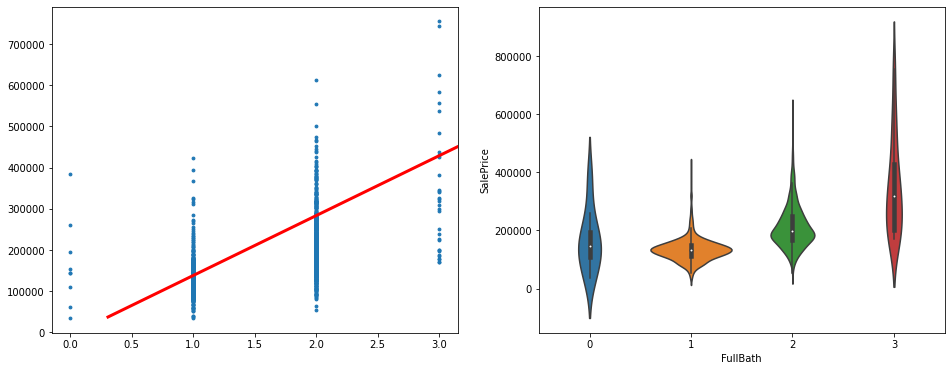

In [105]:
scatter_cat_line(train_df['FullBath'], train_df['SalePrice'],0,2,8)

#### Observations :     
**FullBath: Full bathrooms above grade**
  - This **feature** is **positively correlated** with the **SalePrice**.
  - **FullBath** is giving me some kind of **inforamtion** of the **SalePrice**.
  - We can see if the number of **Full Bathrooms increases** the **Prices** of the **House is also increasing**.

### **Analysis** of **HalfBath** and **SalePrice**

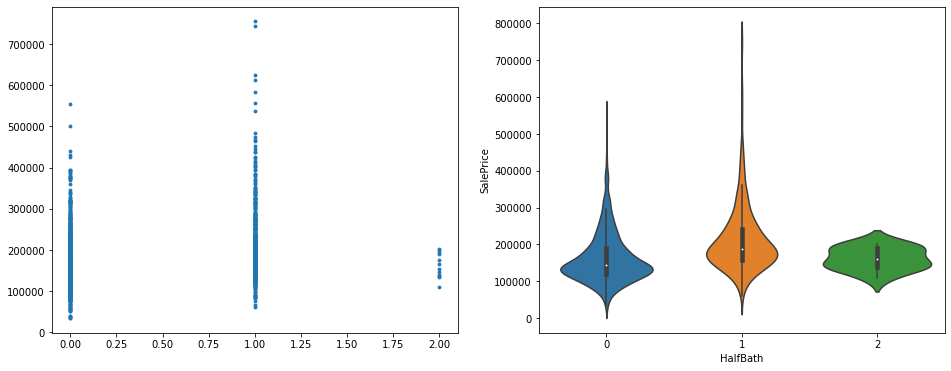

In [106]:
scatter_line_cat(train_df['HalfBath'], train_df['SalePrice'], 8)

#### Observations :    
**HalfBath: Half baths above grade**
  - We can see due to the graph the **prices** of **One half bathroom is slightly greater then Zero or Two**.

### **Analysis** of **BedroomAbvGr** and **SalePrice**

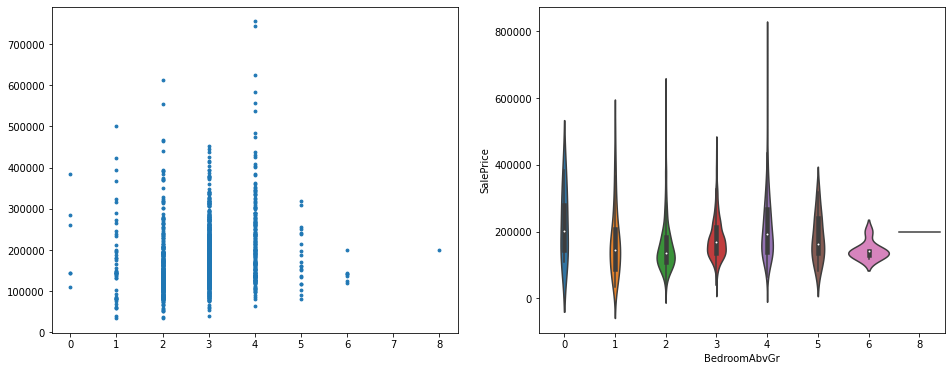

In [107]:
scatter_line_cat(train_df['BedroomAbvGr'], train_df['SalePrice'],8)

#### Observations :      
**Bedroom: Bedrooms above grade (does NOT include basement bedrooms)**
  - The **prices** of **1, 2, 3, and 4 Bedrooms** are **greater** then **others**.

### **Analysis** of **KitchenAbvGr** and **SalePrice**

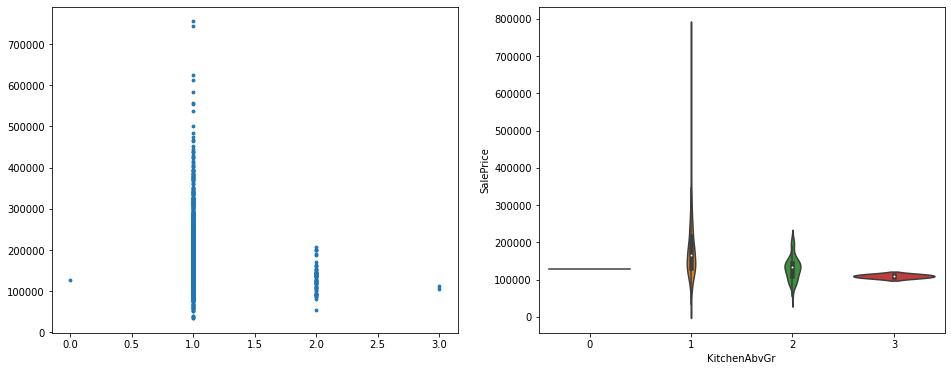

In [108]:
scatter_line_cat(train_df['KitchenAbvGr'], train_df['SalePrice'], 8)

#### Observations :      
**Kitchen: Kitchens above grade**
  - **Prices** of **Kitchen One** is **greater then all others**.
  - Prices of 2 and 3 kitchens are between 100000 and 200000.

### **Analysis** of **totRmsAbvGrd** and **SalePrice**

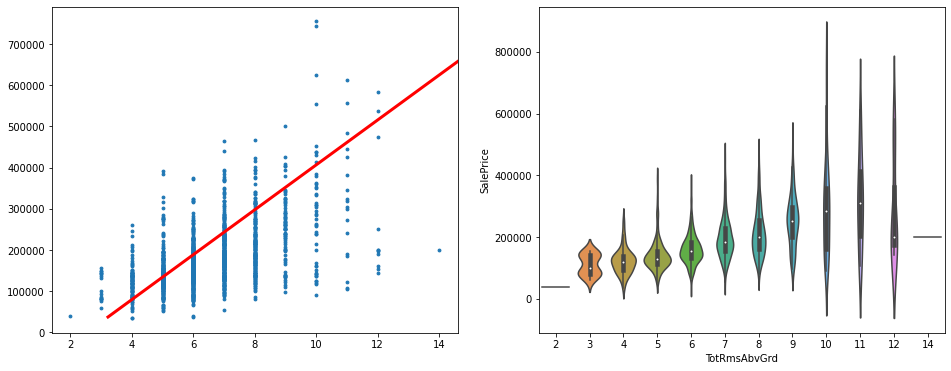

In [109]:
scatter_cat_line(train_df['TotRmsAbvGrd'], train_df['SalePrice'],0,3, 8)

#### Observations :       
**TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)**
  - **Total rooms** are **highly correlated** with **SalePrice**.
  - If the **number of total rooms are increasing the prices are also increasing**.

### **Analysis** of **Fireplaces** and **SalePrices**

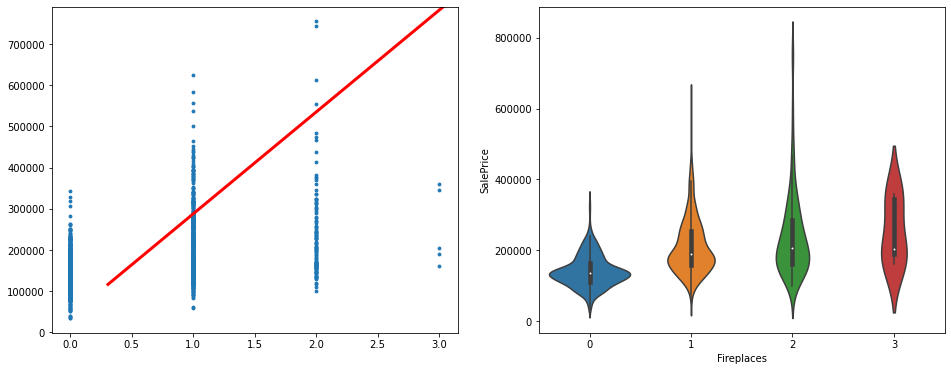

In [110]:
scatter_cat_line(train_df['Fireplaces'], train_df['SalePrice'], 0.1, 3.5, 8)

#### Observations :    
**Fireplaces: Number of fireplaces**
  - If the **number of Fireplaces increases** the **prices of house is also increases**.
  - So there is a **linear relationship between these**.

### **Analysis** of **GarageYrBlt** and **SalePrices**

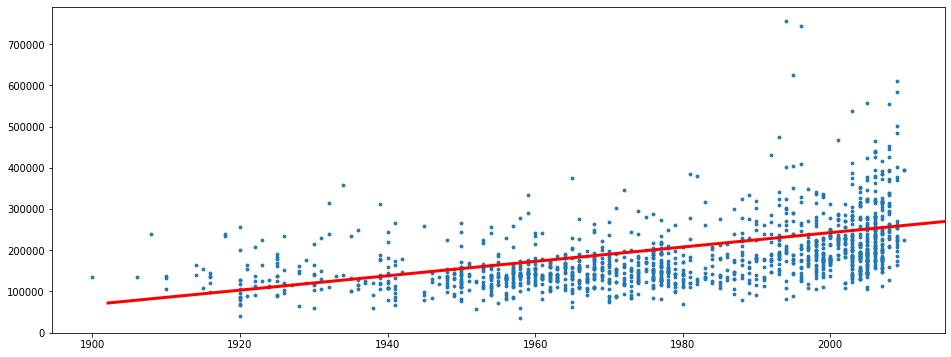

In [111]:
scatter_line(train_df['GarageYrBlt'], train_df['SalePrice'], 0, 1, 8)

#### Observations :     
**GarageYrBlt: Year garage was built**
  - It showing that if the year **built of Garage** is **resent** the **prices of House slightly increasing**.

### **Analysis** of **GarageCars** and **SalePrice**

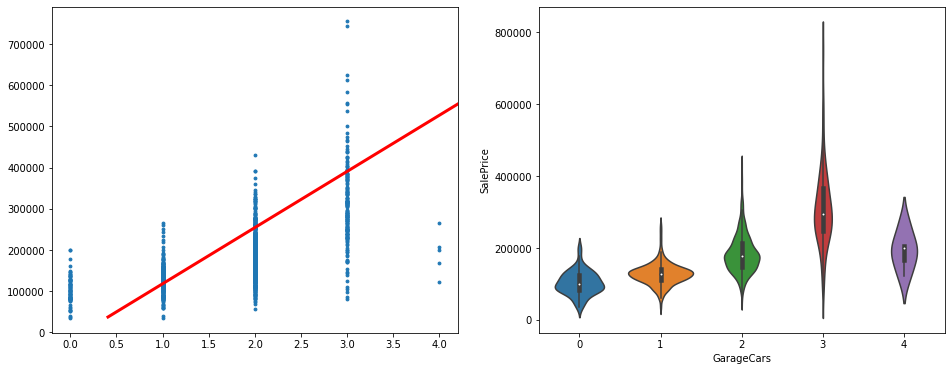

In [112]:
scatter_cat_line(train_df['GarageCars'], train_df['SalePrice'], 0, 2.5, 8)

#### Observations :      
**GarageCars: Size of garage in car capacity**
  - If the **size of Garage is Increasing** the **price is also increasing**.

### **Analysis** of **GarageArea** and **SalePrice**

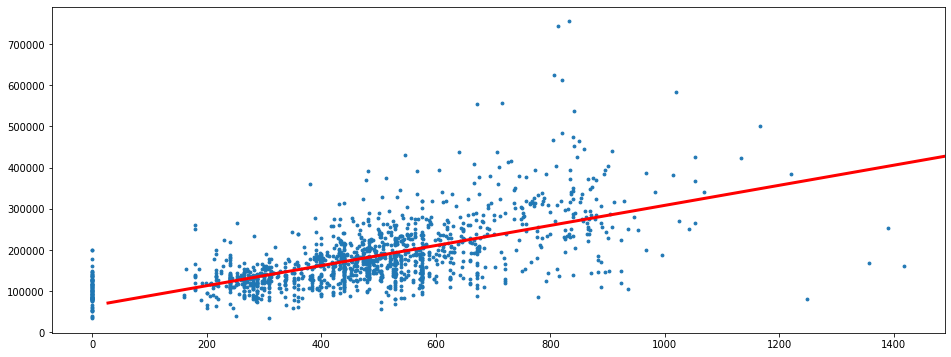

In [113]:
scatter_line(train_df['GarageArea'], train_df['SalePrice'], 0, 1.8, 8)

#### Observatins :     
**GarageArea: Size of garage in square feet**
  - **Garage Area** is **very importat feature** for the **price of House**.
  - It showing the **area of Garage** is **increasing** the **prices are also increasing**.

### **Analysis** of **WoodDeckSF** and **SalePrice**

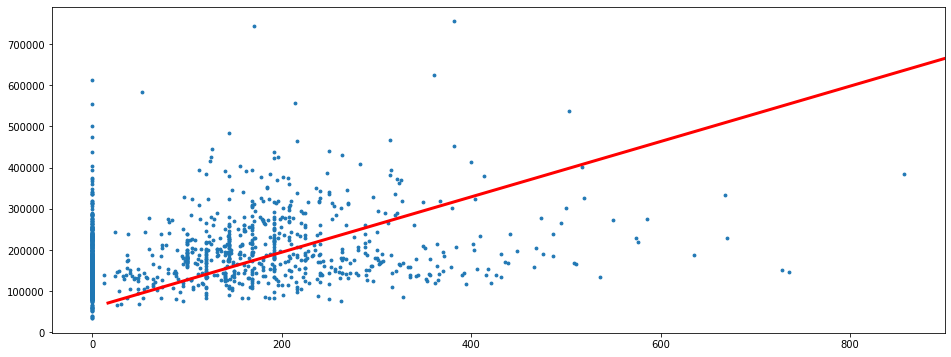

In [114]:
scatter_line(train_df['WoodDeckSF'], train_df['SalePrice'],0,3, 8)

#### Observations :     
**WoodDeckSF: Wood deck area in square feet**
  - **Wood deck area** is **increasing Prices are also increasing**.
  - It is **slightly positively correlated** with **SalePrice**.

### **Analysis** of **OpenPorchSF** and **SalePrice**

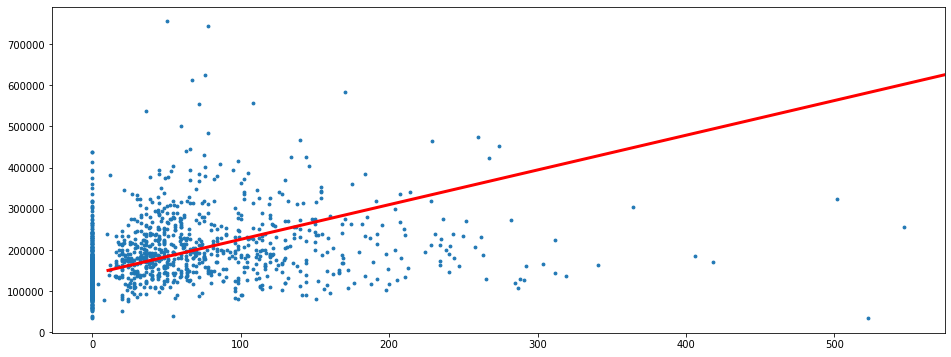

In [115]:
scatter_line(train_df['OpenPorchSF'], train_df['SalePrice'], 0.1, 2.5,8)

#### Observations :     
**OpenPorchSF: Open porch area in square feet**
  - If the **area of Open Porch increases** the **SalePrice also increases**.
  - It is **slightly correlated** with **SalePrice**.
  - **Prices** can be **change** due to **Open Porch Area**.

### **Analysis** of **EnclosedPorch** and **SalePrice**

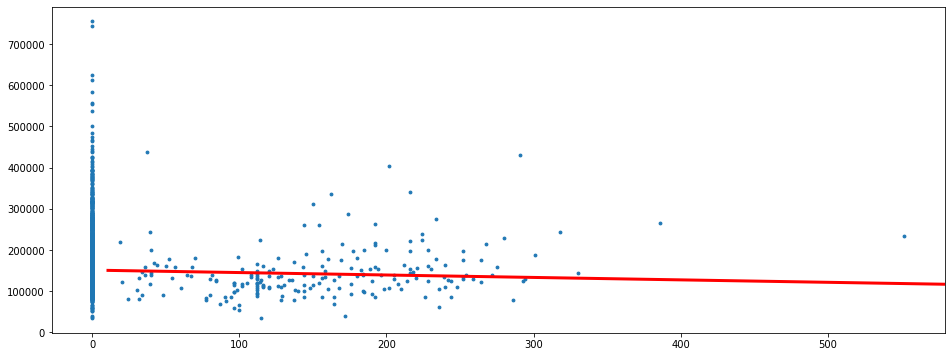

In [116]:
scatter_line(train_df['EnclosedPorch'], train_df['SalePrice'], 0.1, -0.07, 8)

#### Observations :       
**EnclosedPorch: Enclosed porch area in square feet**
  - It is **slightly negatively correlated** with the **SalePrice**.

### **Analysis** of **3SsnPorch** and **SalePrice**

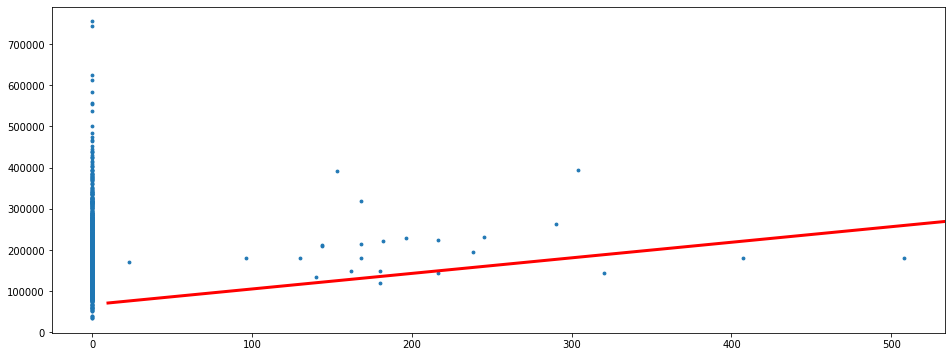

In [117]:
scatter_line(train_df['3SsnPorch'], train_df['SalePrice'], 0,1,8)

#### Observations :       
**3SsnPorch: Three season porch area in square feet**
  - This **feature** is **not giving any kind of information** for my **SalePrice**.
  - So i will **drop** this.

### **Analysis** of **ScreenPorch** and **SalePrice**

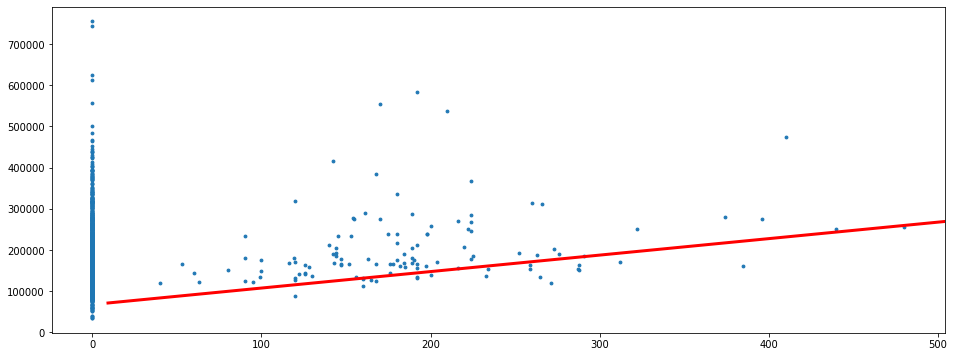

In [118]:
scatter_line(train_df['ScreenPorch'], train_df['SalePrice'], 0, 1, 8)

#### Observations :      
**ScreenPorch: Screen porch area in square feet**
  - Most of the **values are lies** on **Zero**.
  - So this is also **not creating much impact** on **SalePrice**.

### **Analysis** of **PoolArea** and **SalePrice**

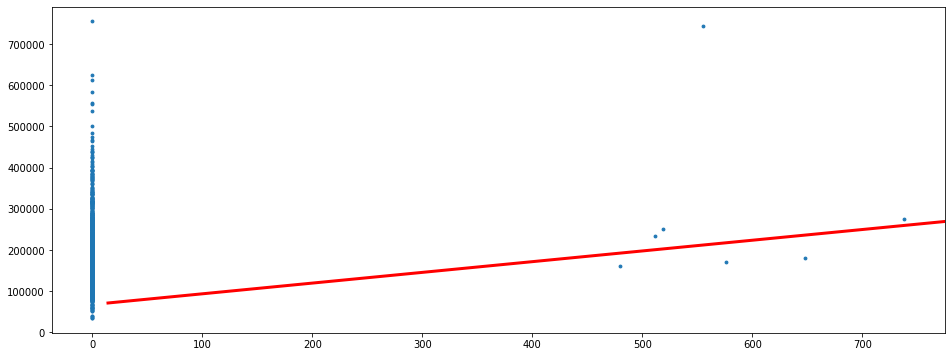

In [119]:
scatter_line(train_df['PoolArea'], train_df['SalePrice'], 0, 1, 8)

#### Observations :      
**PoolArea: Pool area in square feet**
  - Most of the **values** are **Zero**.
  - So this is also **not creating any impact on SalePrice**.
  - Due to this i can **drop** this **feature**.

### **Analysis** of **MiscVal** and **SalePrice**

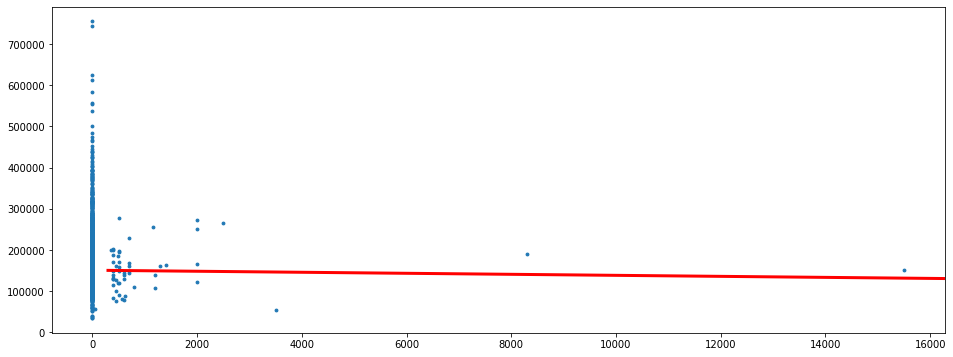

In [120]:
scatter_line(train_df['MiscVal'], train_df['SalePrice'], 0.1, 0, 8)

#### Observations :     
**MiscVal: $Value of miscellaneous feature**
  - It is also not **showing** any **kind** of **information** for my **SalePrice**.
  - I will **drop** this also.

### **Analysis** of **MoSold** and **SalePrice**

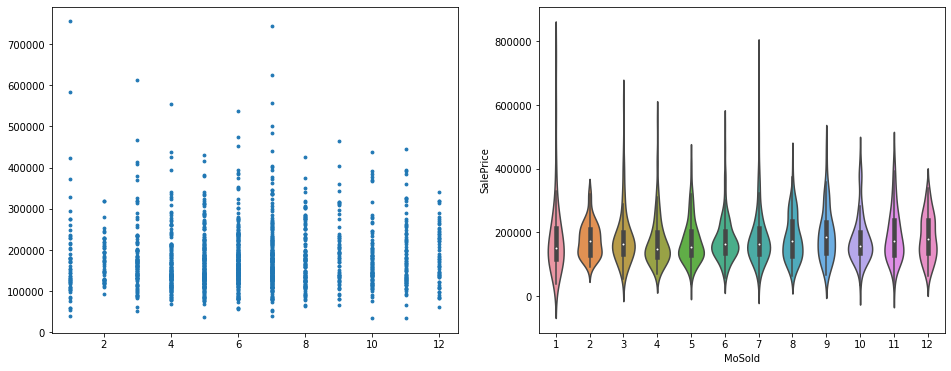

In [121]:
scatter_line_cat(train_df['MoSold'], train_df['SalePrice'], 8)

#### Observations :     
**MoSold: Month Sold (MM)**
  - This column has **no relationship between SalePrice**.
  - So it is **not giving** me **any kind of information for my house Prices**.
  - I will **drop** this **feature**.

### **Analysis** of **YrSold** and **SalePrice**

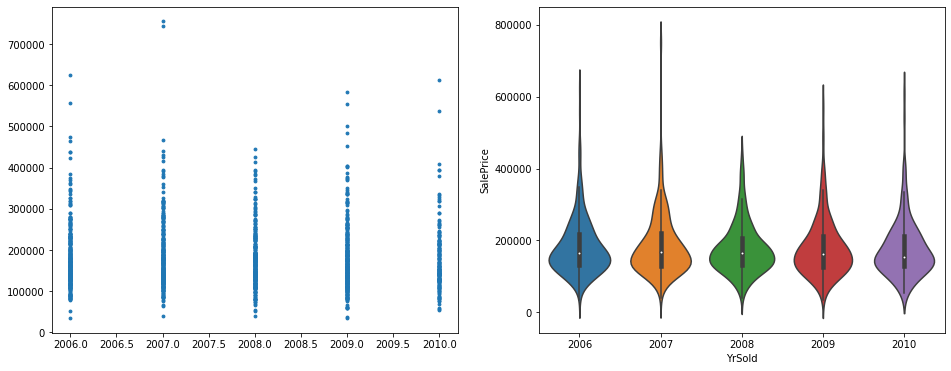

In [122]:
scatter_line_cat(train_df['YrSold'], train_df['SalePrice'], 8)

#### Observations :     
**YrSold: Year Sold (YYYY)**
  - This **feature** is **not showing any kind of relation for SalePrices**.
  - So this is not **creating** **any kind of impact on my SalePrice column**.
  - So i will **drop** this.

## **KDE**

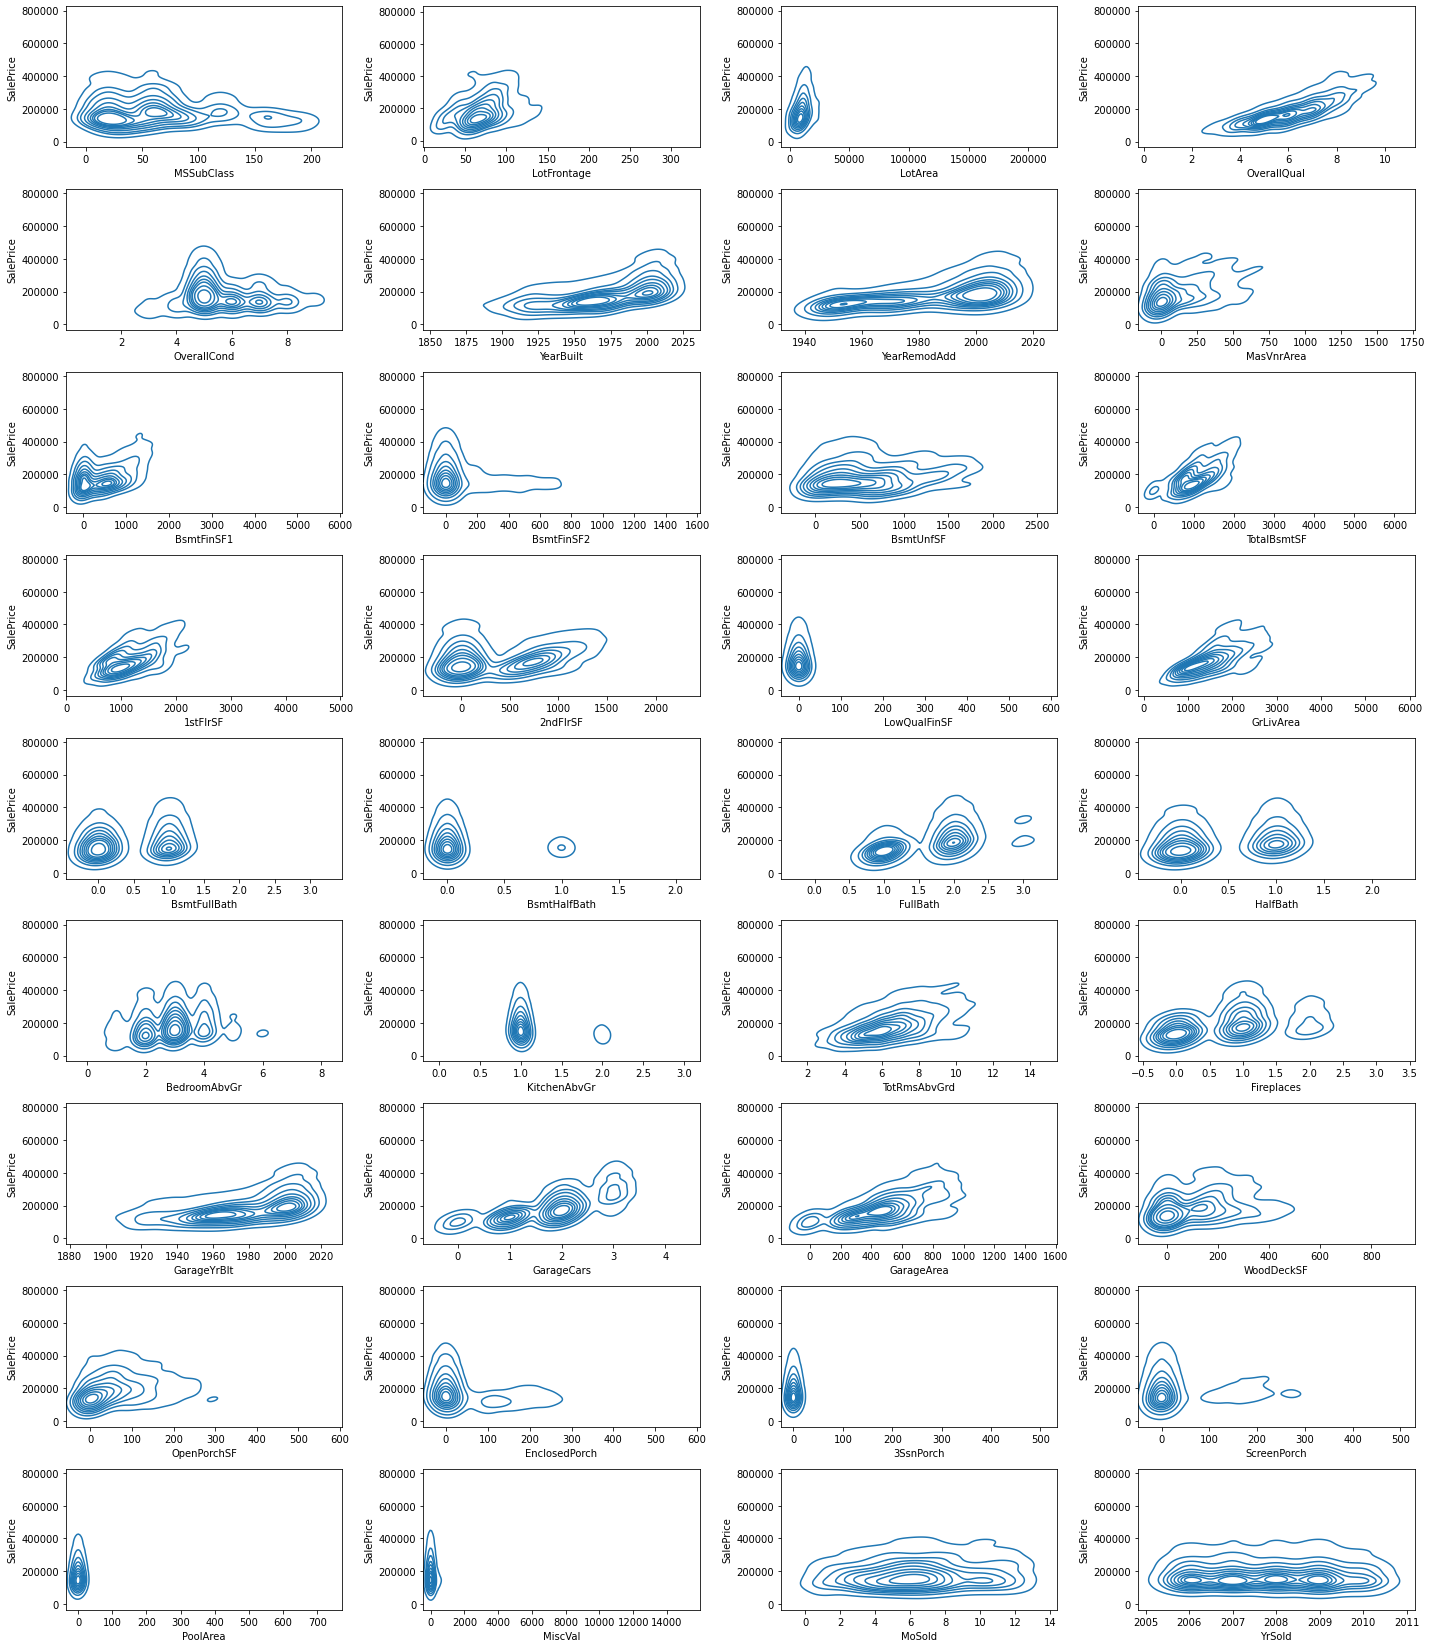

In [123]:
co = train_df.select_dtypes([int, float]).columns

plt.figure(figsize=(20,23))
for i in range(0, len(co)):
  try: 
    plt.subplot(9, 4, i+1)
    ax = sns.kdeplot(train_df[co[i]], train_df['SalePrice'])
    plt.tight_layout()
  except ValueError:
    break

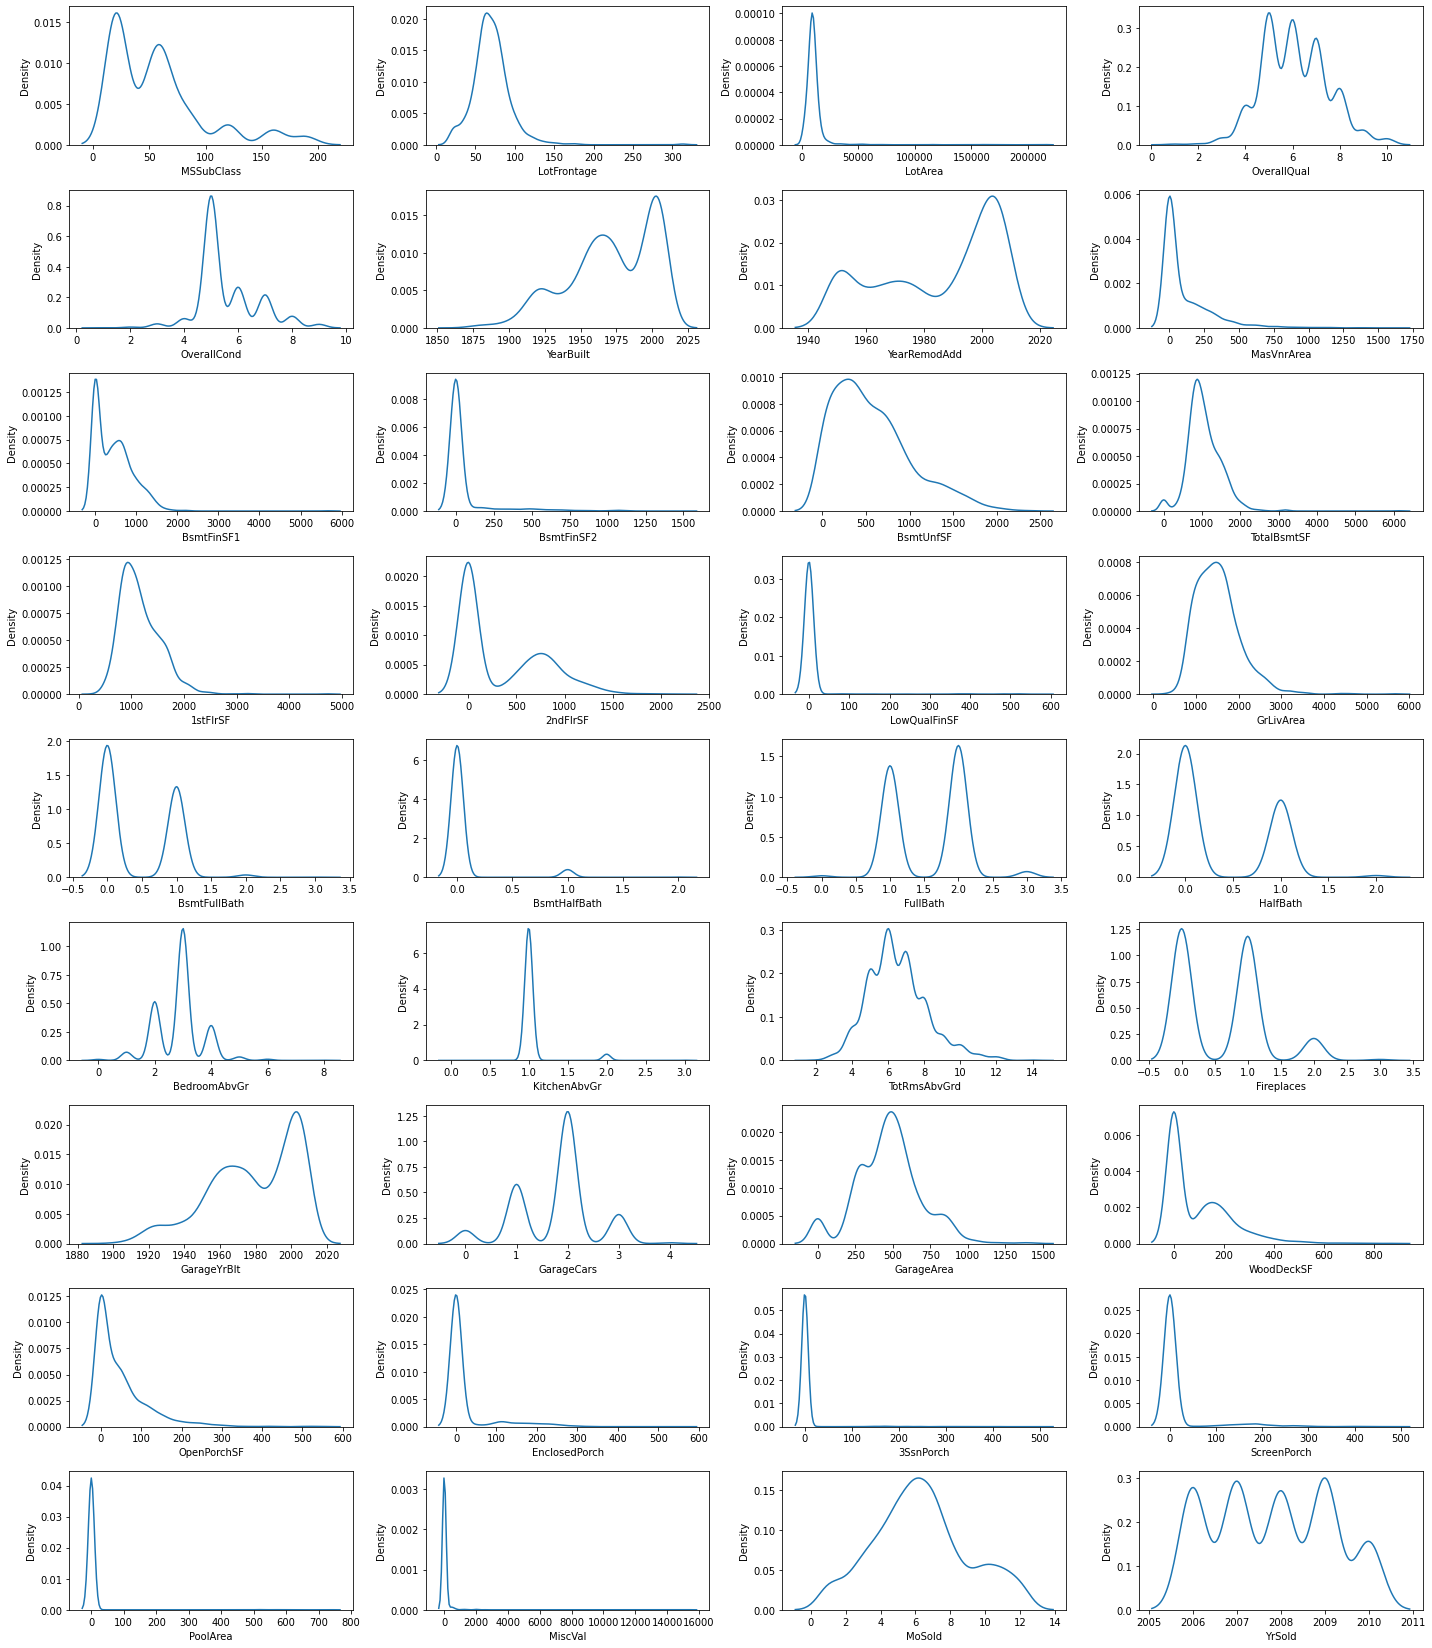

In [124]:
co = train_df.select_dtypes([int, float]).columns

plt.figure(figsize=(20,23))
for i in range(0, len(co)):
  try: 
    plt.subplot(9, 4, i+1)
    ax = sns.kdeplot(train_df[co[i]])
    plt.tight_layout()
  except ValueError:
    break

#### Observations :  

### **MSSubClass**
  1. High density of values in between 0 to 50 and 50 to 100.

### **LotFrontage**
  1. High Density of values is between 50 to 100.

### **LotArea**
  1. High Density of values is between 0 to 25000.

### **OverallQual** 
  1. High Density of values is between 4 to 8.

### **OverallCond**
  1. High Density of values is between 4 to 6.

### **YearBuilt**
  1. High Density of valeus is between 1950 to 2025.

### **YearRemodAdd**
  1. Most of the values are between 1990 to 2020.

### **MasVnrArea**
  1. Mostly values between 0 to 100.

### **BsmtFinSF1**
  1. Mostly Values stating from -100 and till 1000.

### **BsmtFinSF2**
  1. Values starting from -100 to 100.
  2. Most of the values are Zero.

### **BsmtUnfSF**
  1. Mostly values are between 0 to 1000.

### **TotalBsmtSF**
  1. Most of the values in between 200 to 2000.

### **1stFlrSF**
  1. High density of values between 500 to 2000.

### **2ndFlrSF**
  1. Most of values are Zero.
  2. Loser density of values between 500 to 1000.

### **LowQualFinSF**
  1. Mostly values are Zero.

### **GrLivArea**
  1. Mostly values between 500 to 2500.

### **BedAbvGr**
  1. Mostly we have 3.

## **Pearson Correlation**

In [125]:
train_df.corr(method='pearson')

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

<AxesSubplot:>

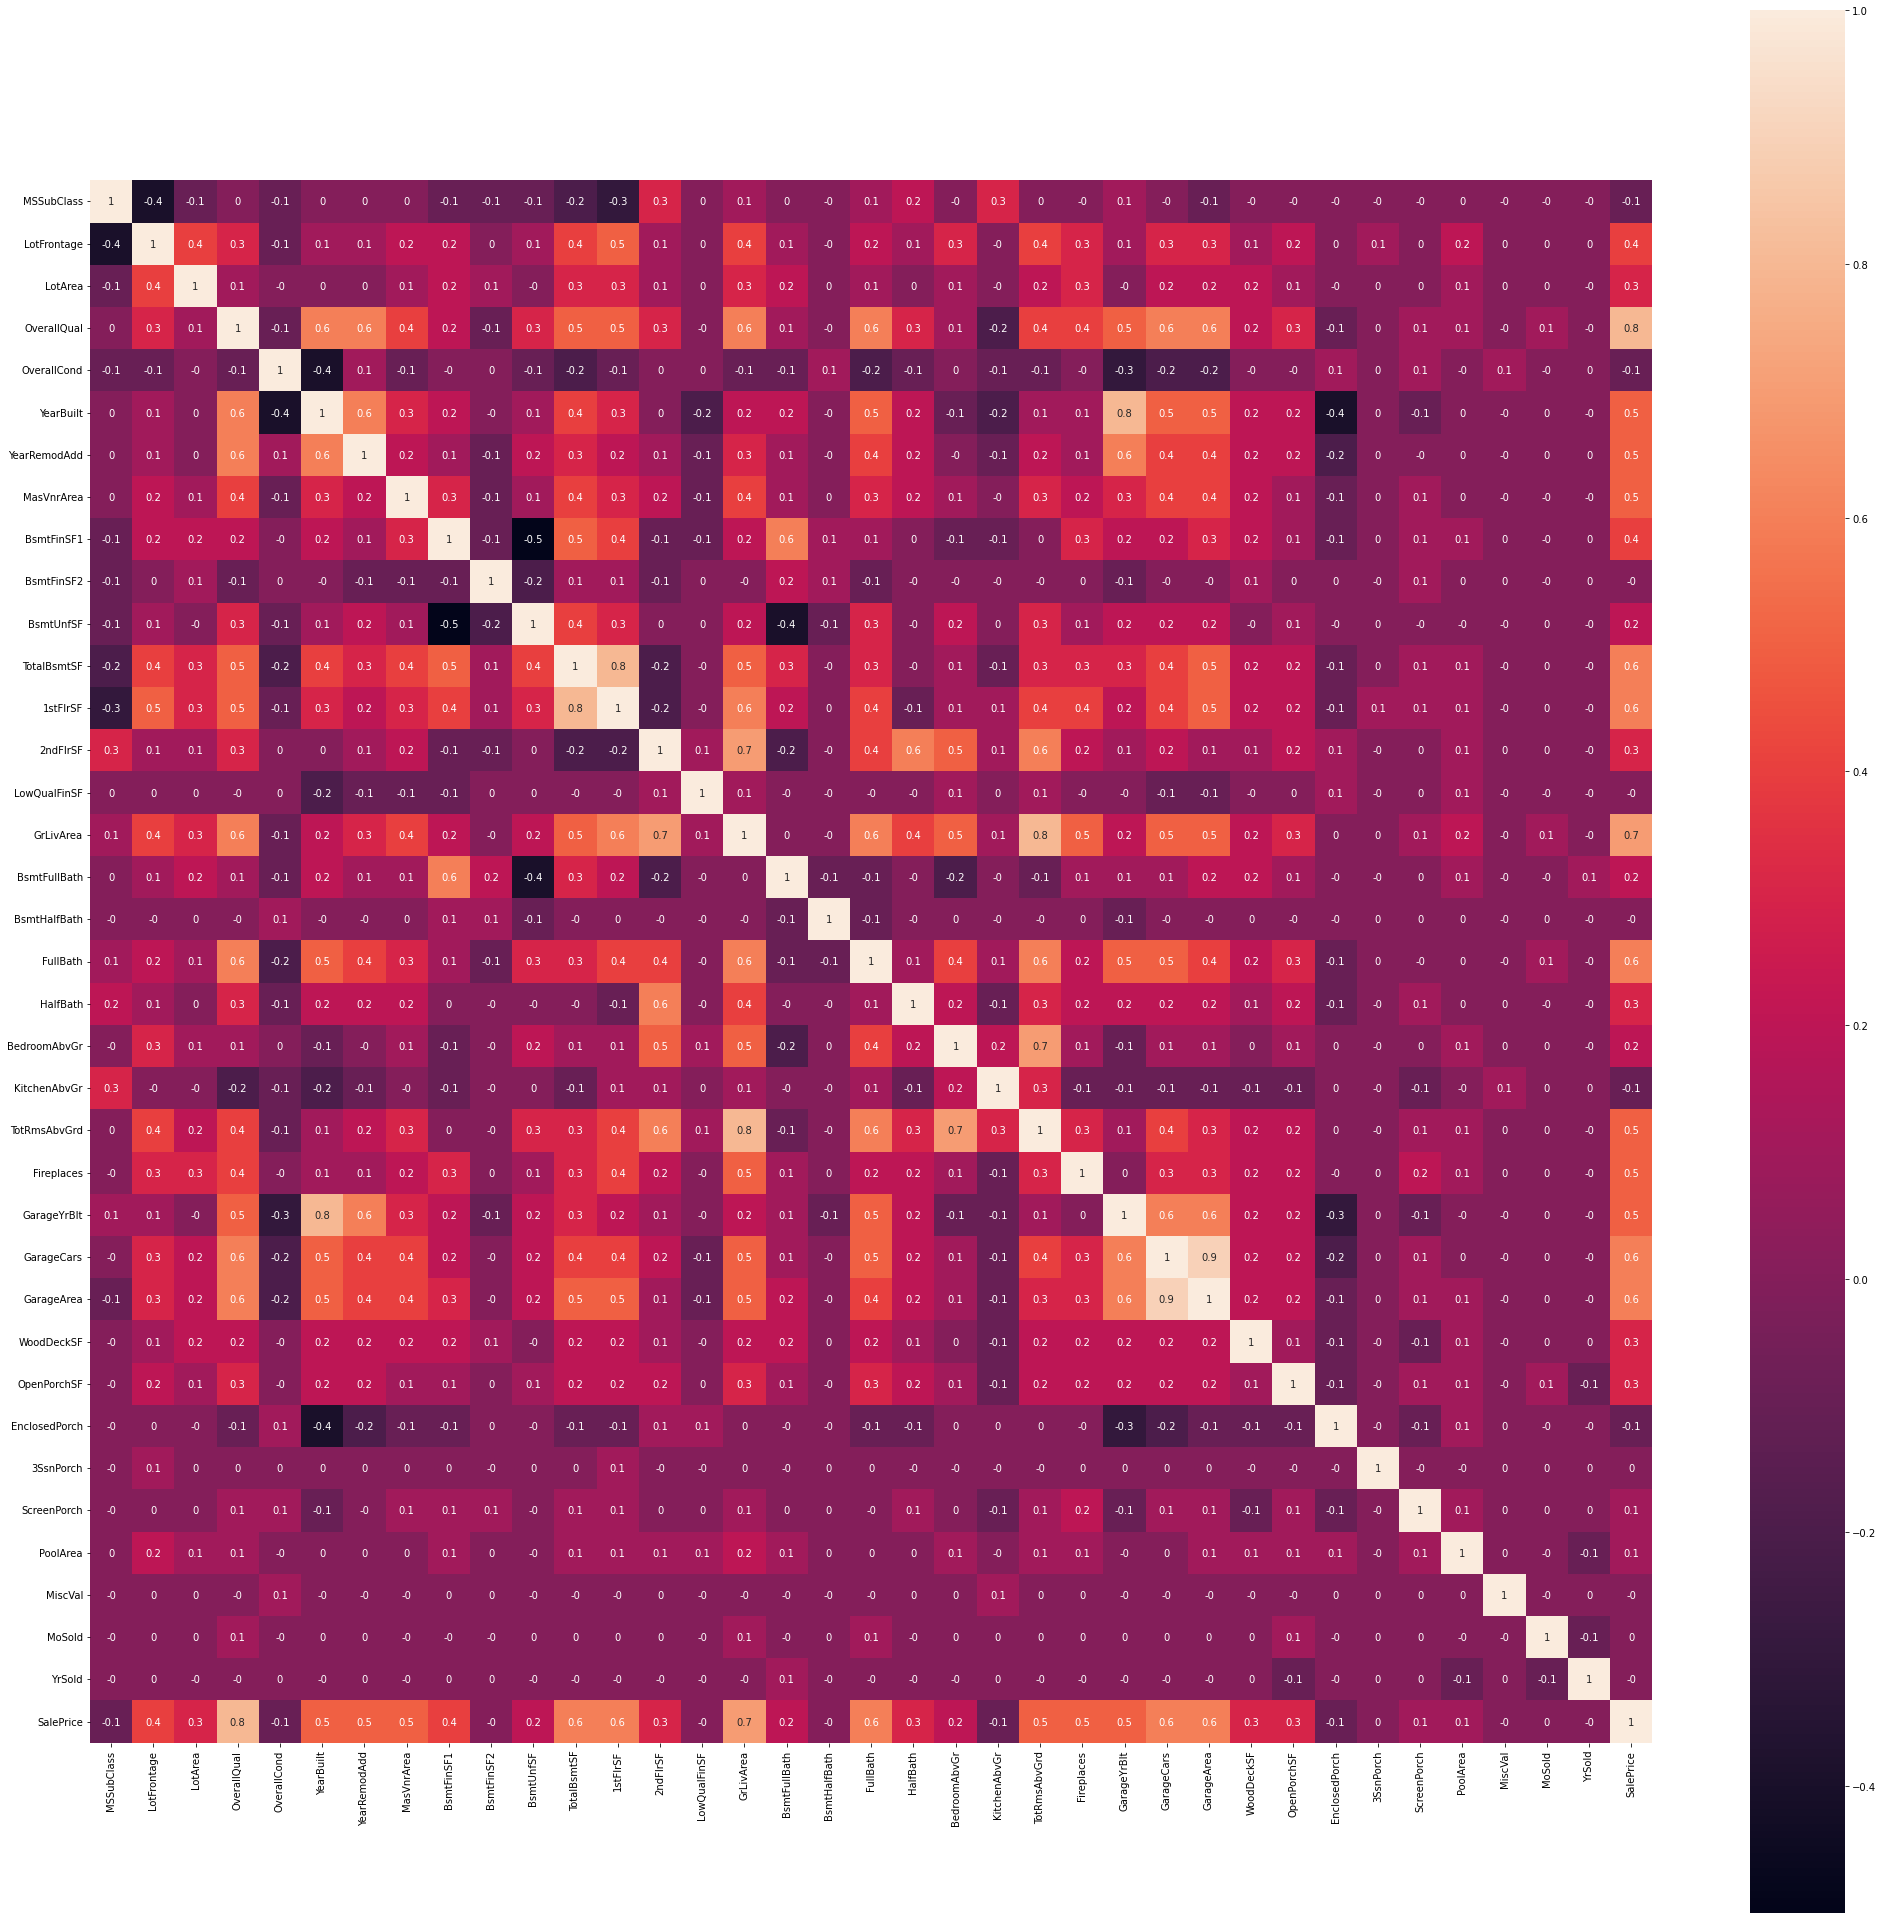

In [126]:
plt.figure(figsize=(35,35))
corr = round(train_df.corr(),1)
sns.heatmap(corr, square=True, annot=True)

#### Observations :      
**After seing Pearson Correlation heatmap, there are some columns which are not correlated with SalePrice, so i will drop these columns**

# **Data Preprocessing** ( Imputation, Creating New Features )

In [159]:
df = train_df.copy()
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [203]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

**Filling Categorical Missing values**

In [160]:
## Filling using constant value
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    df[column] = df[column].fillna('None')
    
## Impute using the column mode

for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    df[column] = df[column].fillna(df[column].mode()[0])

**Filling Numerical Missing values**

In [193]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    y_pred = df.loc[df[na_target].isna() == True, na_target]
    
    return df

In [196]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
]:
    df = knn_impute(df, column)

### Feature Engineering

In [200]:
df["SqFtPerRoom"] = df["GrLivArea"] / (df["TotRmsAbvGrd"] + df["FullBath"] + df["HalfBath"] +                                                        df["KitchenAbvGr"])

df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']

df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

df["HighQualSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

### Feature Transformations
**Log Transform for skewed features**

In [204]:
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature:scipy.stats.skew(df[feature]))

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)

skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x:True if x >= 0.5 else False)

skew_df

Feature       Skew  Absolute Skew  Skewed
0          LotFrontage   2.018966       2.018966    True
1              LotArea  12.195142      12.195142    True
2          OverallQual   0.216721       0.216721   False
3          OverallCond   0.692355       0.692355    True
4            YearBuilt  -0.612831       0.612831    True
5         YearRemodAdd  -0.503044       0.503044    True
6           MasVnrArea   2.663152       2.663152    True
7           BsmtFinSF1   1.683771       1.683771    True
8           BsmtFinSF2   4.250888       4.250888    True
9            BsmtUnfSF   0.919323       0.919323    True
10         TotalBsmtSF   1.522688       1.522688    True
11            1stFlrSF   1.375342       1.375342    True
12            2ndFlrSF   0.812194       0.812194    True
13        LowQualFinSF   9.002080       9.002080    True
14           GrLivArea   1.365156       1.365156    True
15        BsmtFullBath   0.595454       0.595454    True
16        BsmtHalfBath   4.099186       4.099186    True
17            FullBath   0.036524       0.036524   False
18            HalfBath   0.675203       0.675203    True
19        BedroomAbvGr   0.211572       0.211572   False
20        KitchenAbvGr   4.483784       4.483784    True
21        TotRmsAbvGrd   0.675646       0.675646    True
22          Fireplaces   0.648898       0.648898    True
23         GarageYrBlt        NaN            NaN   False
24          GarageCars  -0.342197       0.342197   False
25          GarageArea   0.179796       0.179796   False
26          WoodDeckSF   1.539792       1.539792    True
27         OpenPorchSF   2.361912       2.361912    True
28       EnclosedPorch   3.086696       3.086696    True
29           3SsnPorch  10.293752      10.293752    True
30         ScreenPorch   4.117977       4.117977    True
31            PoolArea  14.813135      14.813135    True
32             MiscVal  24.451640      24.451640    True
33              MoSold   0.211835       0.211835   False
34              YrSold   0.096170       0.096170   False
35           SalePrice   1.880941       1.880941    True
36         SqFtPerRoom   0.980817       0.980817    True
37  Total_Home_Quality  -0.424413       0.424413   False
38     Total_Bathrooms   0.264404       0.264404   False
39          HighQualSF   1.329103       1.329103    True

In [205]:
for column in skew_df.query('Skewed == True')['Feature'].values:
    df[column] = np.log1p(df[column])

In [284]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [255]:
columns_drop = ['OverallCond', 'BsmtFinSF1', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
df = df.drop(columns = ['OverallCond', 'BsmtFinSF1', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])

In [258]:
df = df.drop(columns=['MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [260]:
pd.set_option('display.max_columns', None)
df

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0            60       RL     4.189655  9.042040   Pave      Reg         Lvl   
1            20       RL     4.394449  9.169623   Pave      Reg         Lvl   
2            60       RL     4.234107  9.328212   Pave      IR1         Lvl   
3            70       RL     4.110874  9.164401   Pave      IR1         Lvl   
4            60       RL     4.442651  9.565284   Pave      IR1         Lvl   
...         ...      ...          ...       ...    ...      ...         ...   
1455         60       RL     4.143135  8.976894   Pave      Reg         Lvl   
1456         20       RL     4.454347  9.486152   Pave      Reg         Lvl   
1457         70       RL     4.204693  9.109746   Pave      Reg         Lvl   
1458         20       RL     4.234107  9.181735   Pave      Reg         Lvl   
1459         20       RL     4.330733  9.204121   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  YearBuilt  YearRemodAdd RoofStyle  \
0        1Fam     2Story            7   7.602900      7.602900     Gable   
1        1Fam     1Story            6   7.589336      7.589336     Gable   
2        1Fam     2Story            7   7.601902      7.602401     Gable   
3        1Fam     2Story            7   7.557995      7.586296     Gable   
4        1Fam     2Story            8   7.601402      7.601402     Gable   
...       ...        ...          ...        ...           ...       ...   
1455     1Fam     2Story            6   7.600902      7.601402     Gable   
1456     1Fam     1Story            6   7.590347      7.595387     Gable   
1457     1Fam     2Story            7   7.571474      7.604396     Gable   
1458     1Fam     1Story            5   7.576097      7.599401       Hip   
1459     1Fam     1Story            5   7.583756      7.583756     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace    5.283204        Gd   
1     CompShg     MetalSd     MetalSd       None    0.000000        TA   
2     CompShg     VinylSd     VinylSd    BrkFace    5.093750        Gd   
3     CompShg     Wd Sdng     Wd Shng       None    0.000000        TA   
4     CompShg     VinylSd     VinylSd    BrkFace    5.860786        Gd   
...       ...         ...         ...        ...         ...       ...   
1455  CompShg     VinylSd     VinylSd       None    0.000000        TA   
1456  CompShg     Plywood     Plywood      Stone    4.787492        TA   
1457  CompShg     CemntBd     CmentBd       None    0.000000        Ex   
1458  CompShg     MetalSd     MetalSd       None    0.000000        TA   
1459  CompShg     HdBoard     HdBoard       None    0.000000        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           

### Target  Transformation

Text(0.5, 1.0, 'With Log Transform')

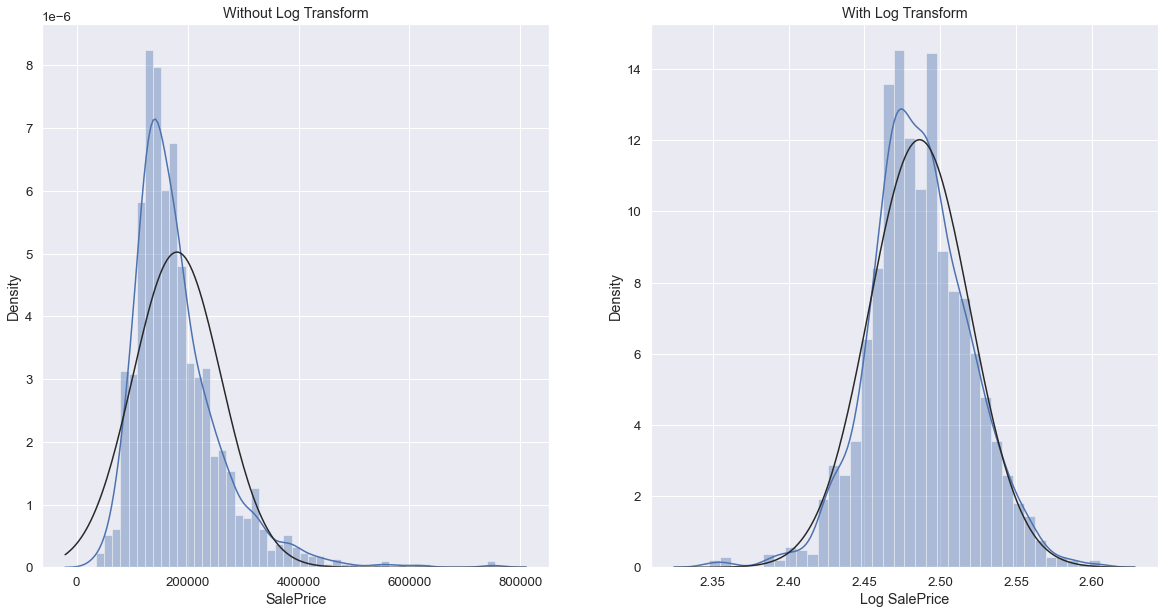

In [261]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(train_df['SalePrice'], kde=True, fit=scipy.stats.norm)
plt.title('Without Log Transform')

plt.subplot(1,2,2)
sns.distplot(np.log(df['SalePrice']), kde=True, fit=scipy.stats.norm)

plt.xlabel('Log SalePrice')
plt.title('With Log Transform')

### Encode Categoricals

In [339]:
df1 = pd.get_dummies(df)

In [340]:
df2 = df.copy()
df2

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0            60       RL     4.189655  9.042040   Pave      Reg         Lvl   
1            20       RL     4.394449  9.169623   Pave      Reg         Lvl   
2            60       RL     4.234107  9.328212   Pave      IR1         Lvl   
3            70       RL     4.110874  9.164401   Pave      IR1         Lvl   
4            60       RL     4.442651  9.565284   Pave      IR1         Lvl   
...         ...      ...          ...       ...    ...      ...         ...   
1455         60       RL     4.143135  8.976894   Pave      Reg         Lvl   
1456         20       RL     4.454347  9.486152   Pave      Reg         Lvl   
1457         70       RL     4.204693  9.109746   Pave      Reg         Lvl   
1458         20       RL     4.234107  9.181735   Pave      Reg         Lvl   
1459         20       RL     4.330733  9.204121   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  YearBuilt  YearRemodAdd RoofStyle  \
0        1Fam     2Story            7   7.602900      7.602900     Gable   
1        1Fam     1Story            6   7.589336      7.589336     Gable   
2        1Fam     2Story            7   7.601902      7.602401     Gable   
3        1Fam     2Story            7   7.557995      7.586296     Gable   
4        1Fam     2Story            8   7.601402      7.601402     Gable   
...       ...        ...          ...        ...           ...       ...   
1455     1Fam     2Story            6   7.600902      7.601402     Gable   
1456     1Fam     1Story            6   7.590347      7.595387     Gable   
1457     1Fam     2Story            7   7.571474      7.604396     Gable   
1458     1Fam     1Story            5   7.576097      7.599401       Hip   
1459     1Fam     1Story            5   7.583756      7.583756     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace    5.283204        Gd   
1     CompShg     MetalSd     MetalSd       None    0.000000        TA   
2     CompShg     VinylSd     VinylSd    BrkFace    5.093750        Gd   
3     CompShg     Wd Sdng     Wd Shng       None    0.000000        TA   
4     CompShg     VinylSd     VinylSd    BrkFace    5.860786        Gd   
...       ...         ...         ...        ...         ...       ...   
1455  CompShg     VinylSd     VinylSd       None    0.000000        TA   
1456  CompShg     Plywood     Plywood      Stone    4.787492        TA   
1457  CompShg     CemntBd     CmentBd       None    0.000000        Ex   
1458  CompShg     MetalSd     MetalSd       None    0.000000        TA   
1459  CompShg     HdBoard     HdBoard       None    0.000000        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           

### Scaling

In [303]:
scaler = StandardScaler()
scaler.fit(df1)

df1 = pd.DataFrame(scaler.transform(df1), index=df1.index, columns=df1.columns)

In [304]:
df1

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0       -0.094233 -0.133270     0.651479   1.045180      0.877541    1.192472   
1        0.520868  0.113413    -0.071836   0.163445     -0.424186   -0.815835   
2        0.039278  0.420049     0.651479   0.980275      0.829642    1.120455   
3       -0.330852  0.103317     0.651479  -1.873790     -0.715872   -0.815835   
4        0.665644  0.878431     1.374795   0.947798      0.733773    1.412029   
...           ...       ...          ...        ...           ...         ...   
1455    -0.233956 -0.259231    -0.071836   0.915305      0.733773   -0.815835   
1456     0.700773  0.725429    -0.071836   0.229170      0.156540    1.004037   
1457    -0.049067 -0.002359     0.651479  -0.997641      1.021093   -0.815835   
1458     0.039278  0.136833    -0.795151  -0.697090      0.541748   -0.815835   
1459     0.329498  0.180116    -0.795151  -0.199238     -0.959623   -0.815835   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0      -0.355342  -0.340511     0.002513 -0.803645  1.180528   0.529194   
1      -0.355342   0.002218     0.341114  0.418479 -0.870117  -0.381965   
2      -0.355342   0.230372     0.065397 -0.576677  1.184762   0.659631   
3      -0.355342   0.348034    -0.105819 -0.439421  1.143550   0.541448   
4      -0.355342   0.295711     0.256237  0.112127  1.244087   1.282295   
...          ...        ...          ...       ...       ...        ...   
1455   -0.355342   0.654093     0.096134 -0.465737  1.117594   0.416598   
1456    2.409693   0.394815     0.515947  1.981524 -0.870117   1.106648   
1457   -0.355342   0.609301     0.261554  0.228208  1.271356   1.470102   
1458    3.405917  -3.047600     0.203637 -0.077721 -0.870117  -0.854536   
1459    2.720609  -0.393009     0.336957  0.403472 -0.870117  -0.396257   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0         1.148788  0.789741  1.258580      0.163779     -0.207607   
1        -0.833225  0.789741 -0.769639      0.163779     -0.207607   
2         1.148788  0.789741  1.258580      0.163779     -0.207607   
3         1.148788 -1.026041 -0.769639      0.163779     -0.207607   
4         1.148788  0.789741  1.258580      1.390023     -0.207607   
...            ...       ...       ...           ...           ...   
1455     -0.833225  0.789741  1.258580      0.163779     -0.207607   
1456      1.148788  0.789741 -0.769639      0.163779     -0.207607   
1457     -0.833225  0.789741 -0.769639      1.390023     -0.207607   
1458      1.148788 -1.026041 -0.769639     -1.062465     -0.207607   
1459      1.148788 -1.026041  1.258580      0.163779     -0.207607   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         0.946985   -1.013562     0.992426    0.311725    0.351000   
1        -0.226437    0.743356    -0.101543    0.311725   -0.060731   
2        -0.226437    0.743356     0.911391    0.311725    0.631726   
3         0.397039    0.743356     0.789839    1.650307    0.790804   
4         1.438928    0.743356     0.870874    1.650307    1.698485   
...            ...         ...          ...         ...         ...   
1455      0.397039    0.743356     0.830356    0.311725   -0.060731   
1456      0.397039    1.771086    -0.020508    0.311725    0.126420   
1457      1.438928    1.771086    -1.519651   -1.026858   -1.033914   
1458     -0.946189   -1.013562    -1.154995   -1.026858   -1.090059   
1459     -0.226437   -1.013562    -0.547234   -1.026858   -0.921624   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  \
0      -0.946701     0.845209      -0.404244    -0.292769   0.560067   
1       1.249540    -1.072916      -0.404244    -0.292769   0.212763   
2      -0.946701     0.675137      -0.404244    -0.292769   0.734046   
3      -0.946701     0.592558       2.844374    -0.292769  -0.437383   
4       1.080884     0.991848      -0.404244    -0.292769   1.014651   
...   

In [305]:
df1 = df1.drop_duplicates()

In [306]:
df1

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0       -0.094233 -0.133270     0.651479   1.045180      0.877541    1.192472   
1        0.520868  0.113413    -0.071836   0.163445     -0.424186   -0.815835   
2        0.039278  0.420049     0.651479   0.980275      0.829642    1.120455   
3       -0.330852  0.103317     0.651479  -1.873790     -0.715872   -0.815835   
4        0.665644  0.878431     1.374795   0.947798      0.733773    1.412029   
...           ...       ...          ...        ...           ...         ...   
1455    -0.233956 -0.259231    -0.071836   0.915305      0.733773   -0.815835   
1456     0.700773  0.725429    -0.071836   0.229170      0.156540    1.004037   
1457    -0.049067 -0.002359     0.651479  -0.997641      1.021093   -0.815835   
1458     0.039278  0.136833    -0.795151  -0.697090      0.541748   -0.815835   
1459     0.329498  0.180116    -0.795151  -0.199238     -0.959623   -0.815835   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0      -0.355342  -0.340511     0.002513 -0.803645  1.180528   0.529194   
1      -0.355342   0.002218     0.341114  0.418479 -0.870117  -0.381965   
2      -0.355342   0.230372     0.065397 -0.576677  1.184762   0.659631   
3      -0.355342   0.348034    -0.105819 -0.439421  1.143550   0.541448   
4      -0.355342   0.295711     0.256237  0.112127  1.244087   1.282295   
...          ...        ...          ...       ...       ...        ...   
1455   -0.355342   0.654093     0.096134 -0.465737  1.117594   0.416598   
1456    2.409693   0.394815     0.515947  1.981524 -0.870117   1.106648   
1457   -0.355342   0.609301     0.261554  0.228208  1.271356   1.470102   
1458    3.405917  -3.047600     0.203637 -0.077721 -0.870117  -0.854536   
1459    2.720609  -0.393009     0.336957  0.403472 -0.870117  -0.396257   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0         1.148788  0.789741  1.258580      0.163779     -0.207607   
1        -0.833225  0.789741 -0.769639      0.163779     -0.207607   
2         1.148788  0.789741  1.258580      0.163779     -0.207607   
3         1.148788 -1.026041 -0.769639      0.163779     -0.207607   
4         1.148788  0.789741  1.258580      1.390023     -0.207607   
...            ...       ...       ...           ...           ...   
1455     -0.833225  0.789741  1.258580      0.163779     -0.207607   
1456      1.148788  0.789741 -0.769639      0.163779     -0.207607   
1457     -0.833225  0.789741 -0.769639      1.390023     -0.207607   
1458      1.148788 -1.026041 -0.769639     -1.062465     -0.207607   
1459      1.148788 -1.026041  1.258580      0.163779     -0.207607   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         0.946985   -1.013562     0.992426    0.311725    0.351000   
1        -0.226437    0.743356    -0.101543    0.311725   -0.060731   
2        -0.226437    0.743356     0.911391    0.311725    0.631726   
3         0.397039    0.743356     0.789839    1.650307    0.790804   
4         1.438928    0.743356     0.870874    1.650307    1.698485   
...            ...         ...          ...         ...         ...   
1455      0.397039    0.743356     0.830356    0.311725   -0.060731   
1456      0.397039    1.771086    -0.020508    0.311725    0.126420   
1457      1.438928    1.771086    -1.519651   -1.026858   -1.033914   
1458     -0.946189   -1.013562    -1.154995   -1.026858   -1.090059   
1459     -0.226437   -1.013562    -0.547234   -1.026858   -0.921624   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  \
0      -0.946701     0.845209      -0.404244    -0.292769   0.560067   
1       1.249540    -1.072916      -0.404244    -0.292769   0.212763   
2      -0.946701     0.675137      -0.404244    -0.292769   0.734046   
3      -0.946701     0.592558       2.844374    -0.292769  -0.437383   
4       1.080884     0.991848      -0.404244    -0.292769   1.014651   
...   

### Train/Test Split

In [307]:
X = df1.drop('SalePrice', axis=1)
y = df['SalePrice']

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [313]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [318]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [319]:
X_test.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [314]:
X_train.fillna(0, inplace=True)

In [315]:
model = GradientBoostingRegressor(n_estimators=1000)
lr = LinearRegression()

In [316]:
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [320]:
y_pred = model.predict(X_test)

In [321]:
print("r2 score", r2_score(y_pred, y_test))

r2 score 0.8800450230223575


In [354]:
np.exp(y_pred)[:10]

array([144316.66565287, 336186.26302395, 107384.83787238, 154641.55354968,
       380253.97711097,  86005.34660052, 227405.42306877, 145535.41910372,
        83168.99521397, 136268.60955273])

## Predictions

In [382]:
X[0:1]

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0    -0.094233 -0.13327     0.651479    1.04518      0.877541    1.192472   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0   -0.355342  -0.340511     0.002513 -0.803645  1.180528   0.529194   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0      1.148788  0.789741   1.25858      0.163779     -0.207607      0.946985   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0   -1.013562     0.992426    0.311725       0.351   -0.946701     0.845209   

   EnclosedPorch  ScreenPorch  SqFtPerRoom  Total_Home_Quality  \
0      -0.404244    -0.292769    -0.483658            0.192175   

   Total_Bathrooms  HighQualSF  MSSubClass_120  MSSubClass_160  \
0         1.642256    0.540045       -0.251724        -0.21236   

   MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  \
0       -0.083045       -0.144841      -0.761634      -0.222721   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0      -0.052414      -0.091035      -0.330791       1.970518       -0.20702   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0      -0.105263      -0.203395      -0.117851      -0.192177   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         -0.083045    -0.215859    -0.105263     0.518133    -0.418955   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0    -0.064238     0.064238     -0.704203     -0.169981     -0.083045   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0      0.760512         -0.21236        -0.188311           -0.159   

   LandContour_Lvl  Utilities_AllPub  Utilities_NoSeWa  LotConfig_Corner  \
0         0.337126           0.02618          -0.02618         -0.468739   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0          -0.262324       -0.18238      -0.052414          0.622762   

   LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0       0.237571      -0.215859      -0.094785              -0.10854   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0             -0.037037            -0.105263             -0.203395   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0             -0.139832              2.955221             -0.190252   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0             -0.271163             -0.239176             -0.16125   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0              -0.10854             -0.186352           -0.426833   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0             -0.078757            -0.229416             -0.169981   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0             -0.235958             -0.289638           -0.131991   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0            -0.231065             -0.205214             -0.250182   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0             -0.131991            -0.163471             -0.087129   

   Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0          -0.184376          -0.24236          0.39841        -0.074227   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0        -0.114827        -0.087129        -0.134652        -0.037037   

   Condition1_RRNn  Condition2_Artery  Condition2_Feedr  Condition2_Norm  \
0        -0.058621          -0.037037         -0.064238         0.101885   

   Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
0         -0.02618        -0.037037         -0.02618         -0.02618   

   Condition2_RRNn  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0        

In [387]:
np.exp(y[0])

208500.99999999983

In [385]:
np.exp(model.predict(X[0:1]))

array([210129.47718391])

# My model is reaching the nearest value